# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def p(*obj):
    for o in obj:
        print(o)

def d(*obj):
    for o in obj:
        display(o)

def r(x, unit=3):
    return round(x, unit)

def timestamp2str(x):
    return str(x).split(' ')[0]

# 0, Data reading

Config

In [4]:
# Config

start_year = 2000

In [5]:
# Read the data
df_outstanding = pd.read_csv('Data (Clean)/CSV/RML Outstanding Loans.csv').drop(columns='IDX')
df_outstanding = df_outstanding.loc[df_outstanding['Year']>=start_year]

df_neg = pd.read_csv('Data (Clean)/CSV/RML Negative Equity.csv')
df_neg = df_neg.replace('*', 0.5/2)
df_neg[['Percentage of Total RML Number', 'Percentage of Total RML Value']] = df_neg[['Percentage of Total RML Number', 'Percentage of Total RML Value']].astype(float)


In [6]:
# Add the datetime datatype
ds_date = pd.to_datetime(df_outstanding[['Year', 'Month']].assign(day=1)) + pd.offsets.MonthEnd()
df_outstanding.insert(0, 'Date', ds_date)

# Add the datetime datatype
ds_date = df_neg['Year'].astype(str) + '_Q' + df_neg['Quarter'].astype(str)
df_neg.insert(0, 'year_quarter', ds_date)

In [42]:
d(df_outstanding.tail(30), df_outstanding.dtypes)
p('')

d(df_neg.tail(), df_neg.dtypes)
p('')

Date  Year  Month  Quarter  Outstanding Loans Value  \
300 2021-06-30  2021      6        2                  1648588   
301 2021-07-31  2021      7        3                  1663765   
302 2021-08-31  2021      8        3                  1679784   
303 2021-09-30  2021      9        3                  1696982   
304 2021-10-31  2021     10        4                  1707621   
305 2021-11-30  2021     11        4                  1719948   
306 2021-12-31  2021     12        4                  1736412   
307 2022-01-31  2022      1        1                  1746841   
308 2022-02-28  2022      2        1                  1754332   
309 2022-03-31  2022      3        1                  1760236   
310 2022-04-30  2022      4        2                  1762496   
311 2022-05-31  2022      5        2                  1766614   
312 2022-06-30  2022      6        2                  1774413   
313 2022-07-31  2022      7        3                  1783359   
314 2022-08-31  2022      8        3                  1791537   
315 2022-09-30  2022      9        3                  1796525   
316 2022-10-31  2022     10        4                  1798906   
317 2022-11-30  2022     11        4                  1803359   
318 2022-12-31  2022     12        4                  1809906   
319 2023-01-31  2023      1        1                  1813979   
320 2023-02-28  2023      2        1                  1817765   
321 2023-03-31  2023      3        1                  1819837   
322 2023-04-30  2023      4        2                  1822820   
323 2023-05-31  2023      5        2                  1828924   
324 2023-06-30  2023      6        2                  1841259   
325 2023-07-31  2023      7        3                  1851500   
326 2023-08-31  2023      8        3                  1854441   
327 2023-09-30  2023      9        3                  1856750   
328 2023-10-31  2023     10        4                  1858174   
329 2023-11-30  2023     11        4                  1857469   

     Delinquency Ratio  Rescheduled Loans Ratio year_quarter  
300               0.04                      0.0      2021_Q2  
301               0.03                      0.0      2021_Q3  
302               0.03                      0.0      2021_Q3  
303               0.03                      0.0      2021_Q3  
304               0.03                      0.0      2021_Q4  
305               0.03                      0.0      2021_Q4  
306               0.04                      0.0      2021_Q4  
307               0.03                      0.0      2022_Q1  
308               0.04                      0.0      2022_Q1  
309               0.04                      0.0      2022_Q1  
310               0.04                      0.0      2022_Q2  
311               0.04                      0.0      2022_Q2  
312               0.05                      0.0      2022_Q2  
313               0.05                      0.0      2022_Q3  
314               0.05                      0.0      2022_Q3  
315               0.04                      0.0      2022_Q3  
316               0.04                      0.0      2022_Q4  
317               0.05                      0.0      2022_Q4  
318               0.06                      0.0      2022_Q4  
319               0.06                      0.0      2023_Q1  
320               0.06                      0.0      2023_Q1  
321               0.06                      0.0      2023_Q1  
322               0.06                      0.0      2023_Q2  
323               0.07                      0.0      2023_Q2  
324               0.07                      0.0      2023_Q2  
325               0.07                      0.0      2023_Q3  
326               0.07                      0.0      2023_Q3  
327               0.07                      0.0      2023_Q3  
328               0.07                      0.0      2023_Q4  
329               0.08                      0.0      2023_Q4

Date                       datetime64[ns]
Year                                int64
Month                               int64
Quarter                             int64
Outstanding Loans Value             int64
Delinquency Ratio                 float64
Rescheduled Loans Ratio           float64
year_quarter                       object
dtype: object

year_quarter  Year  Quarter  Number  Percentage of Total RML Number  Value  \
23      2022_Q3  2022        3     533                            0.09   3006   
24      2022_Q4  2022        4   12164                            2.10  66252   
25      2023_Q1  2023        1    6379                            1.10  34362   
26      2023_Q2  2023        2    3341                            0.57  17351   
27      2023_Q3  2023        3   11123                            1.90  59263   

    Percentage of Total RML Value  Average LTV  
23                           0.17         1.02  
24                           3.66         1.04  
25                           1.89         1.02  
26                           0.94         1.02  
27                           3.19         1.03

year_quarter                       object
Year                                int64
Quarter                             int64
Number                              int64
Percentage of Total RML Number    float64
Value                               int64
Percentage of Total RML Value     float64
Average LTV                       float64
dtype: object

# 1, Descriptive analysis

In [8]:
d(df_outstanding.tail())

cols_outstanding = ['Outstanding Loans Value', 'Delinquency Ratio', 'Rescheduled Loans Ratio']
describe_df = df_outstanding[cols_outstanding].describe()
describe_df.map(lambda x: format(x, ',')[:11])

Date  Year  Month  Quarter  Outstanding Loans Value  \
325 2023-07-31  2023      7        3                  1851500   
326 2023-08-31  2023      8        3                  1854441   
327 2023-09-30  2023      9        3                  1856750   
328 2023-10-31  2023     10        4                  1858174   
329 2023-11-30  2023     11        4                  1857469   

     Delinquency Ratio  Rescheduled Loans Ratio  
325               0.07                      0.0  
326               0.07                      0.0  
327               0.07                      0.0  
328               0.07                      0.0  
329               0.08                      0.0

Outstanding Loans Value Delinquency Ratio Rescheduled Loans Ratio
count                   287.0             287.0                   266.0
mean              927,147.101       0.268850174             0.126015037
std               432,515.653       0.433951274             0.177948221
min                 478,097.0              0.01                     0.0
25%                 533,768.0              0.02                     0.0
50%                 801,074.0              0.04                    0.01
75%               1,220,314.5               0.2                  0.2475
max               1,858,174.0              1.43                    0.56

In [9]:
d(df_neg.tail())

cols_neg = ['Percentage of Total RML Number', 'Percentage of Total RML Value', 'Average LTV']
describe_df = df_neg[cols_neg].describe()
describe_df.map(lambda x: format(x, ',')[:11])

year_quarter  Year  Quarter  Number  Percentage of Total RML Number  Value  \
23      2022_Q3  2022        3     533                            0.09   3006   
24      2022_Q4  2022        4   12164                            2.10  66252   
25      2023_Q1  2023        1    6379                            1.10  34362   
26      2023_Q2  2023        2    3341                            0.57  17351   
27      2023_Q3  2023        3   11123                            1.90  59263   

    Percentage of Total RML Value  Average LTV  
23                           0.17         1.02  
24                           3.66         1.04  
25                           1.89         1.02  
26                           0.94         1.02  
27                           3.19         1.03

Percentage of Total RML Number Percentage of Total RML Value  \
count                           28.0                          28.0   
mean                           0.335                   0.457499999   
std                      0.520081902                   0.920155482   
min                              0.0                           0.0   
25%                      0.037500000                   0.037500000   
50%                             0.25                   0.210000000   
75%                             0.25                          0.25   
max                              2.1                          3.66   

       Average LTV  
count         21.0  
mean   1.028571428  
std    0.012761549  
min           1.01  
25%           1.02  
50%           1.03  
75%           1.04  
max           1.05

In [10]:
round(df_outstanding[cols_outstanding[1]].describe(), 2)

count    287.00
mean       0.27
std        0.43
min        0.01
25%        0.02
50%        0.04
75%        0.20
max        1.43
Name: Delinquency Ratio, dtype: float64

## Distribution

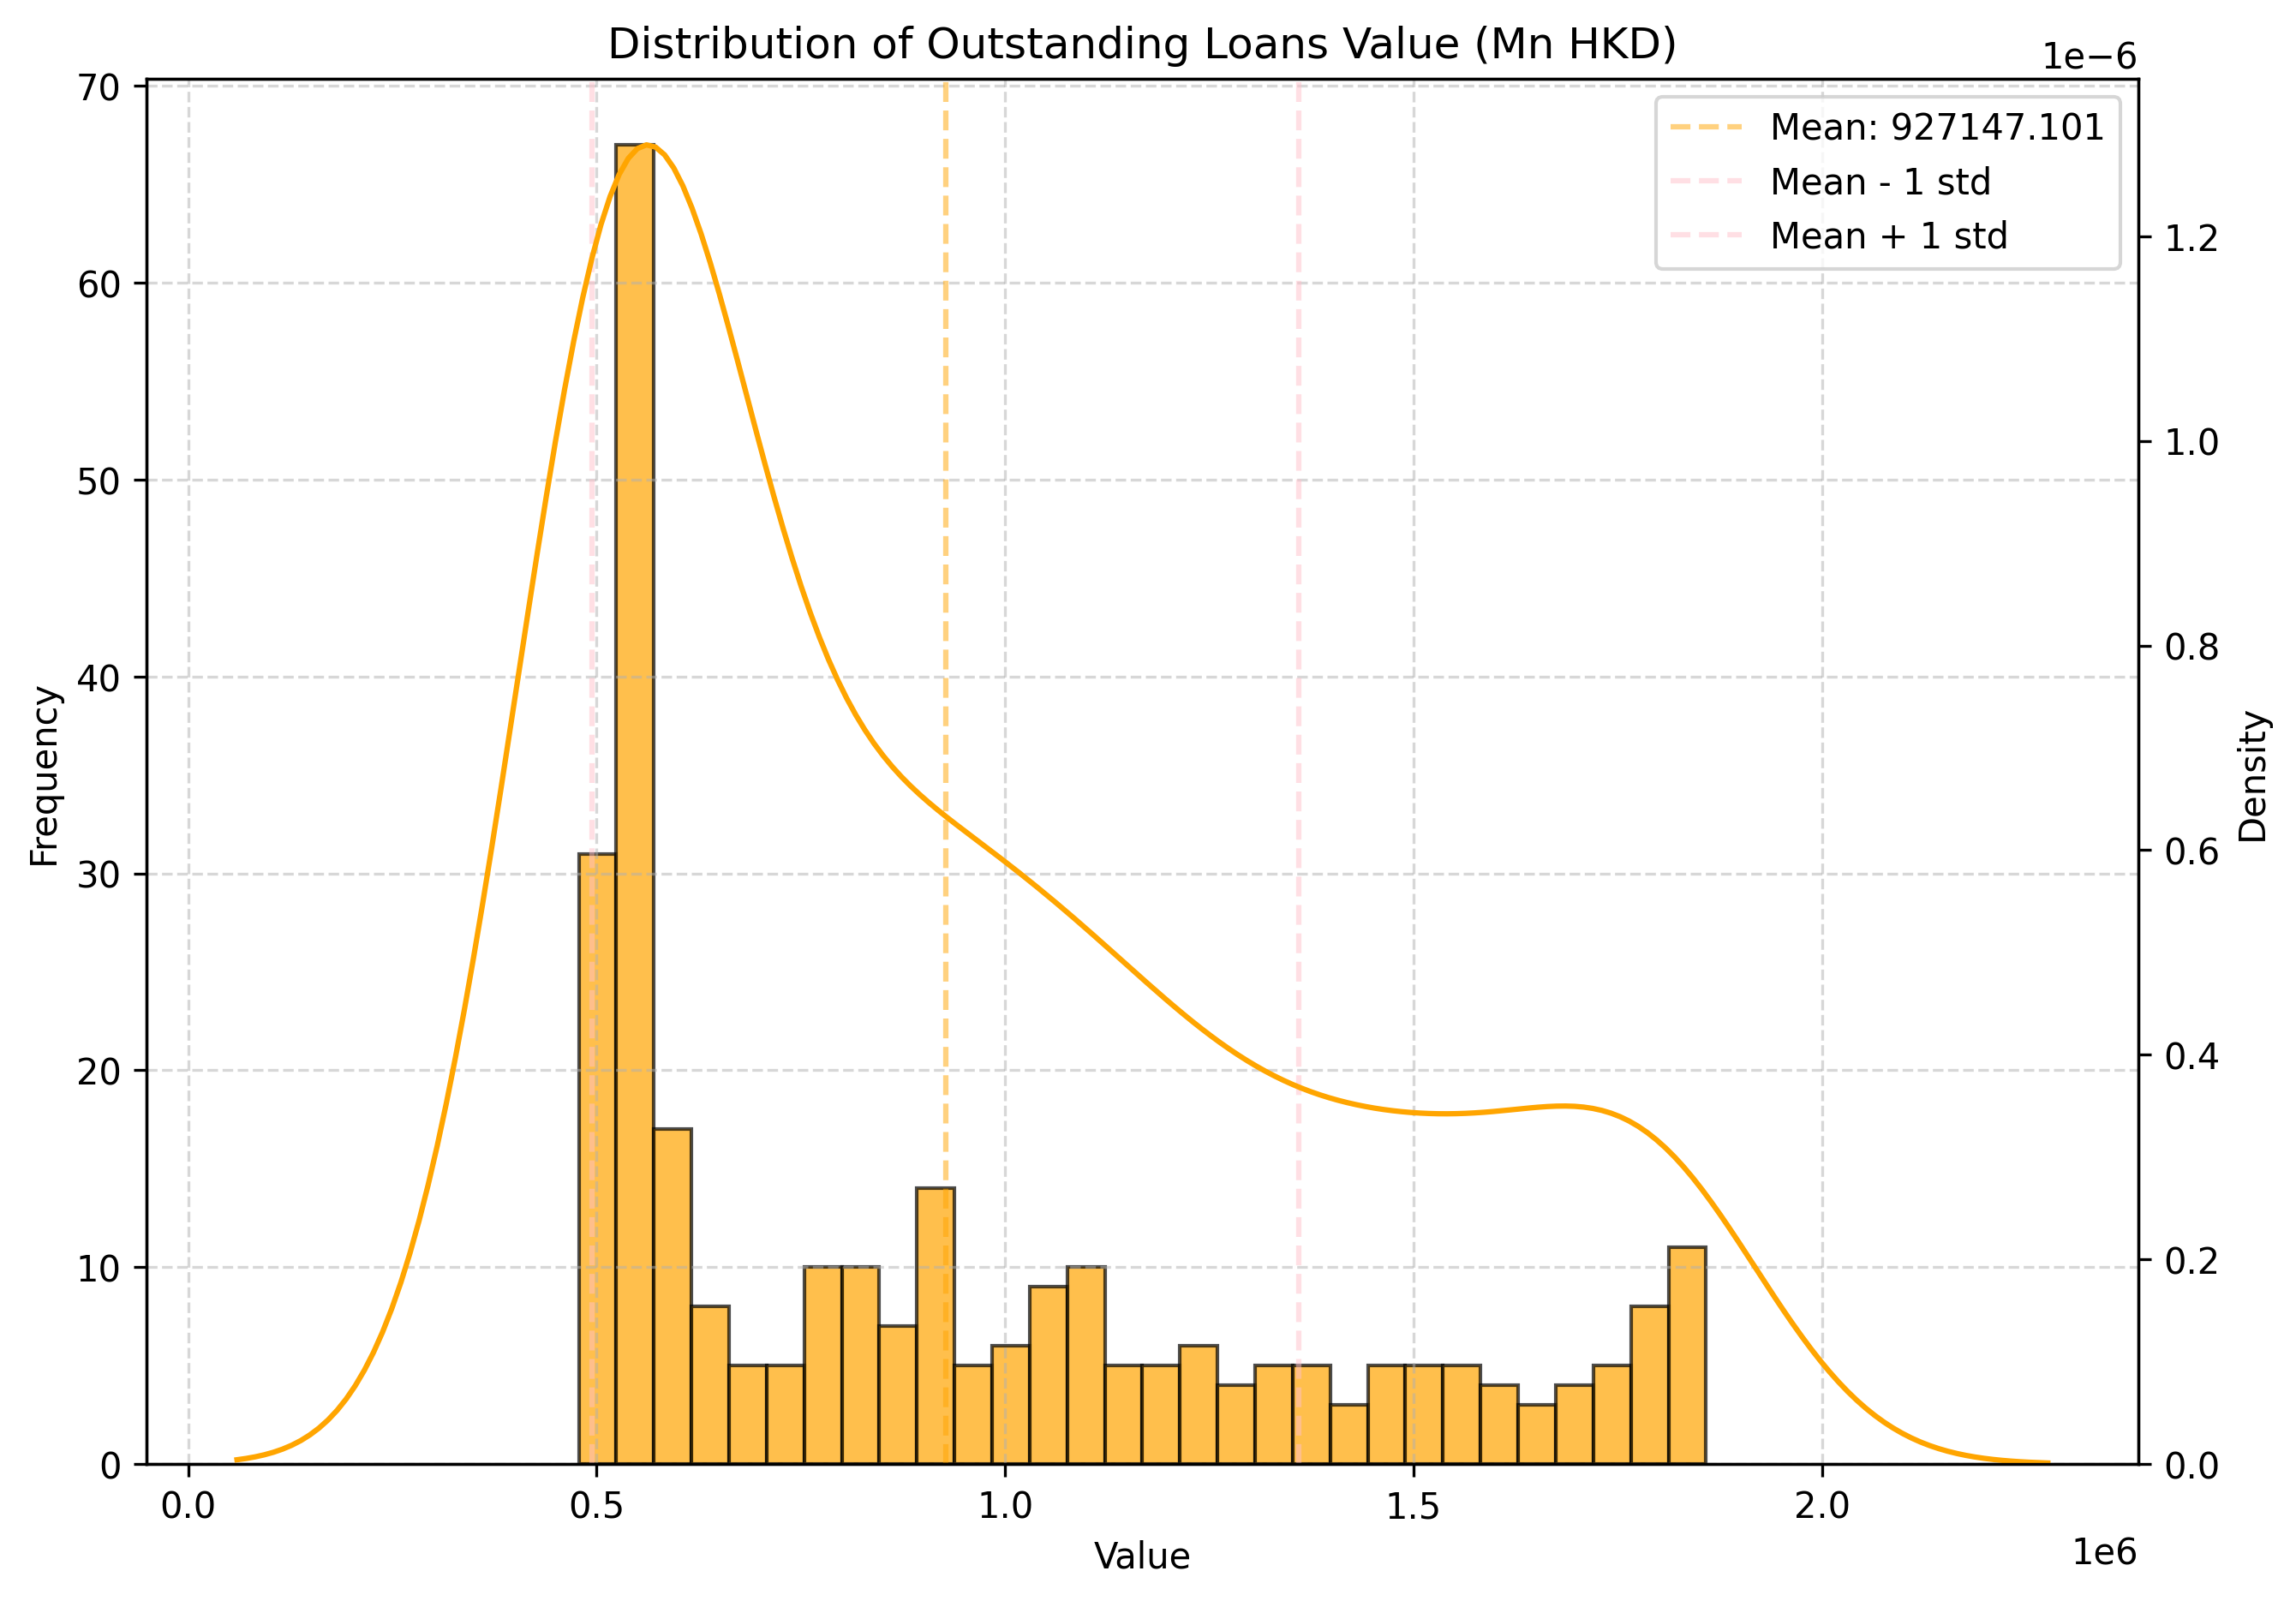

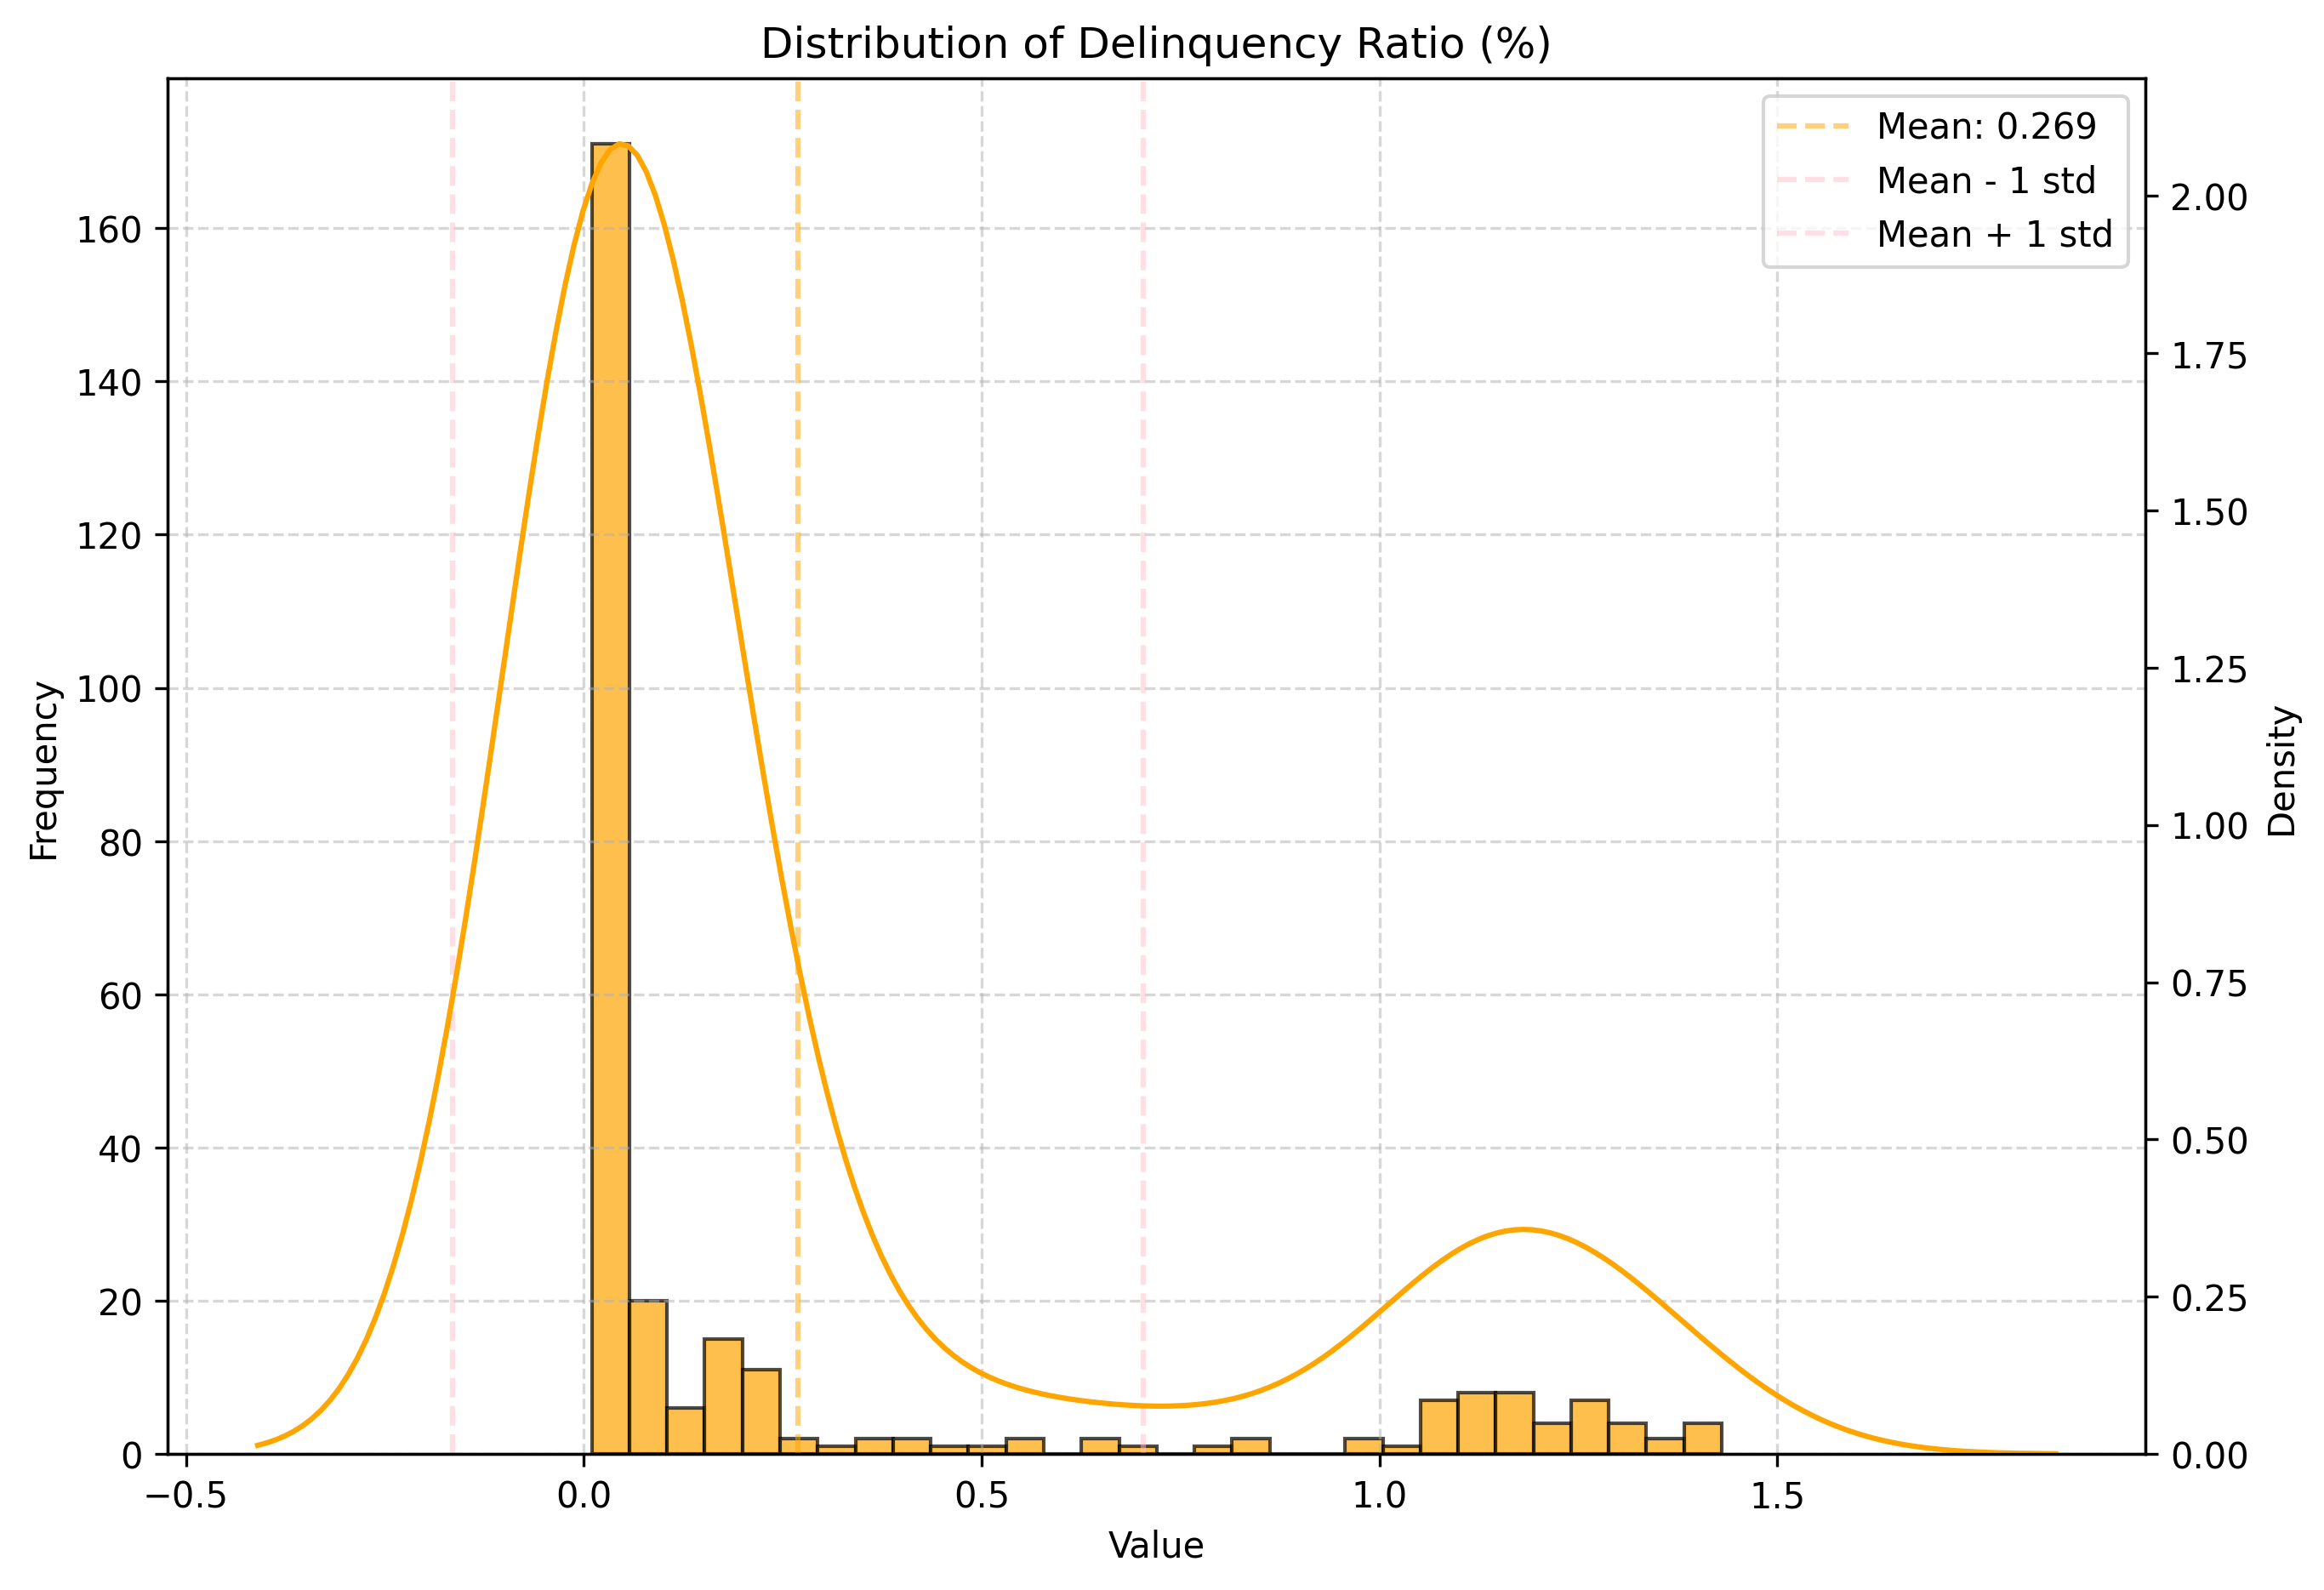

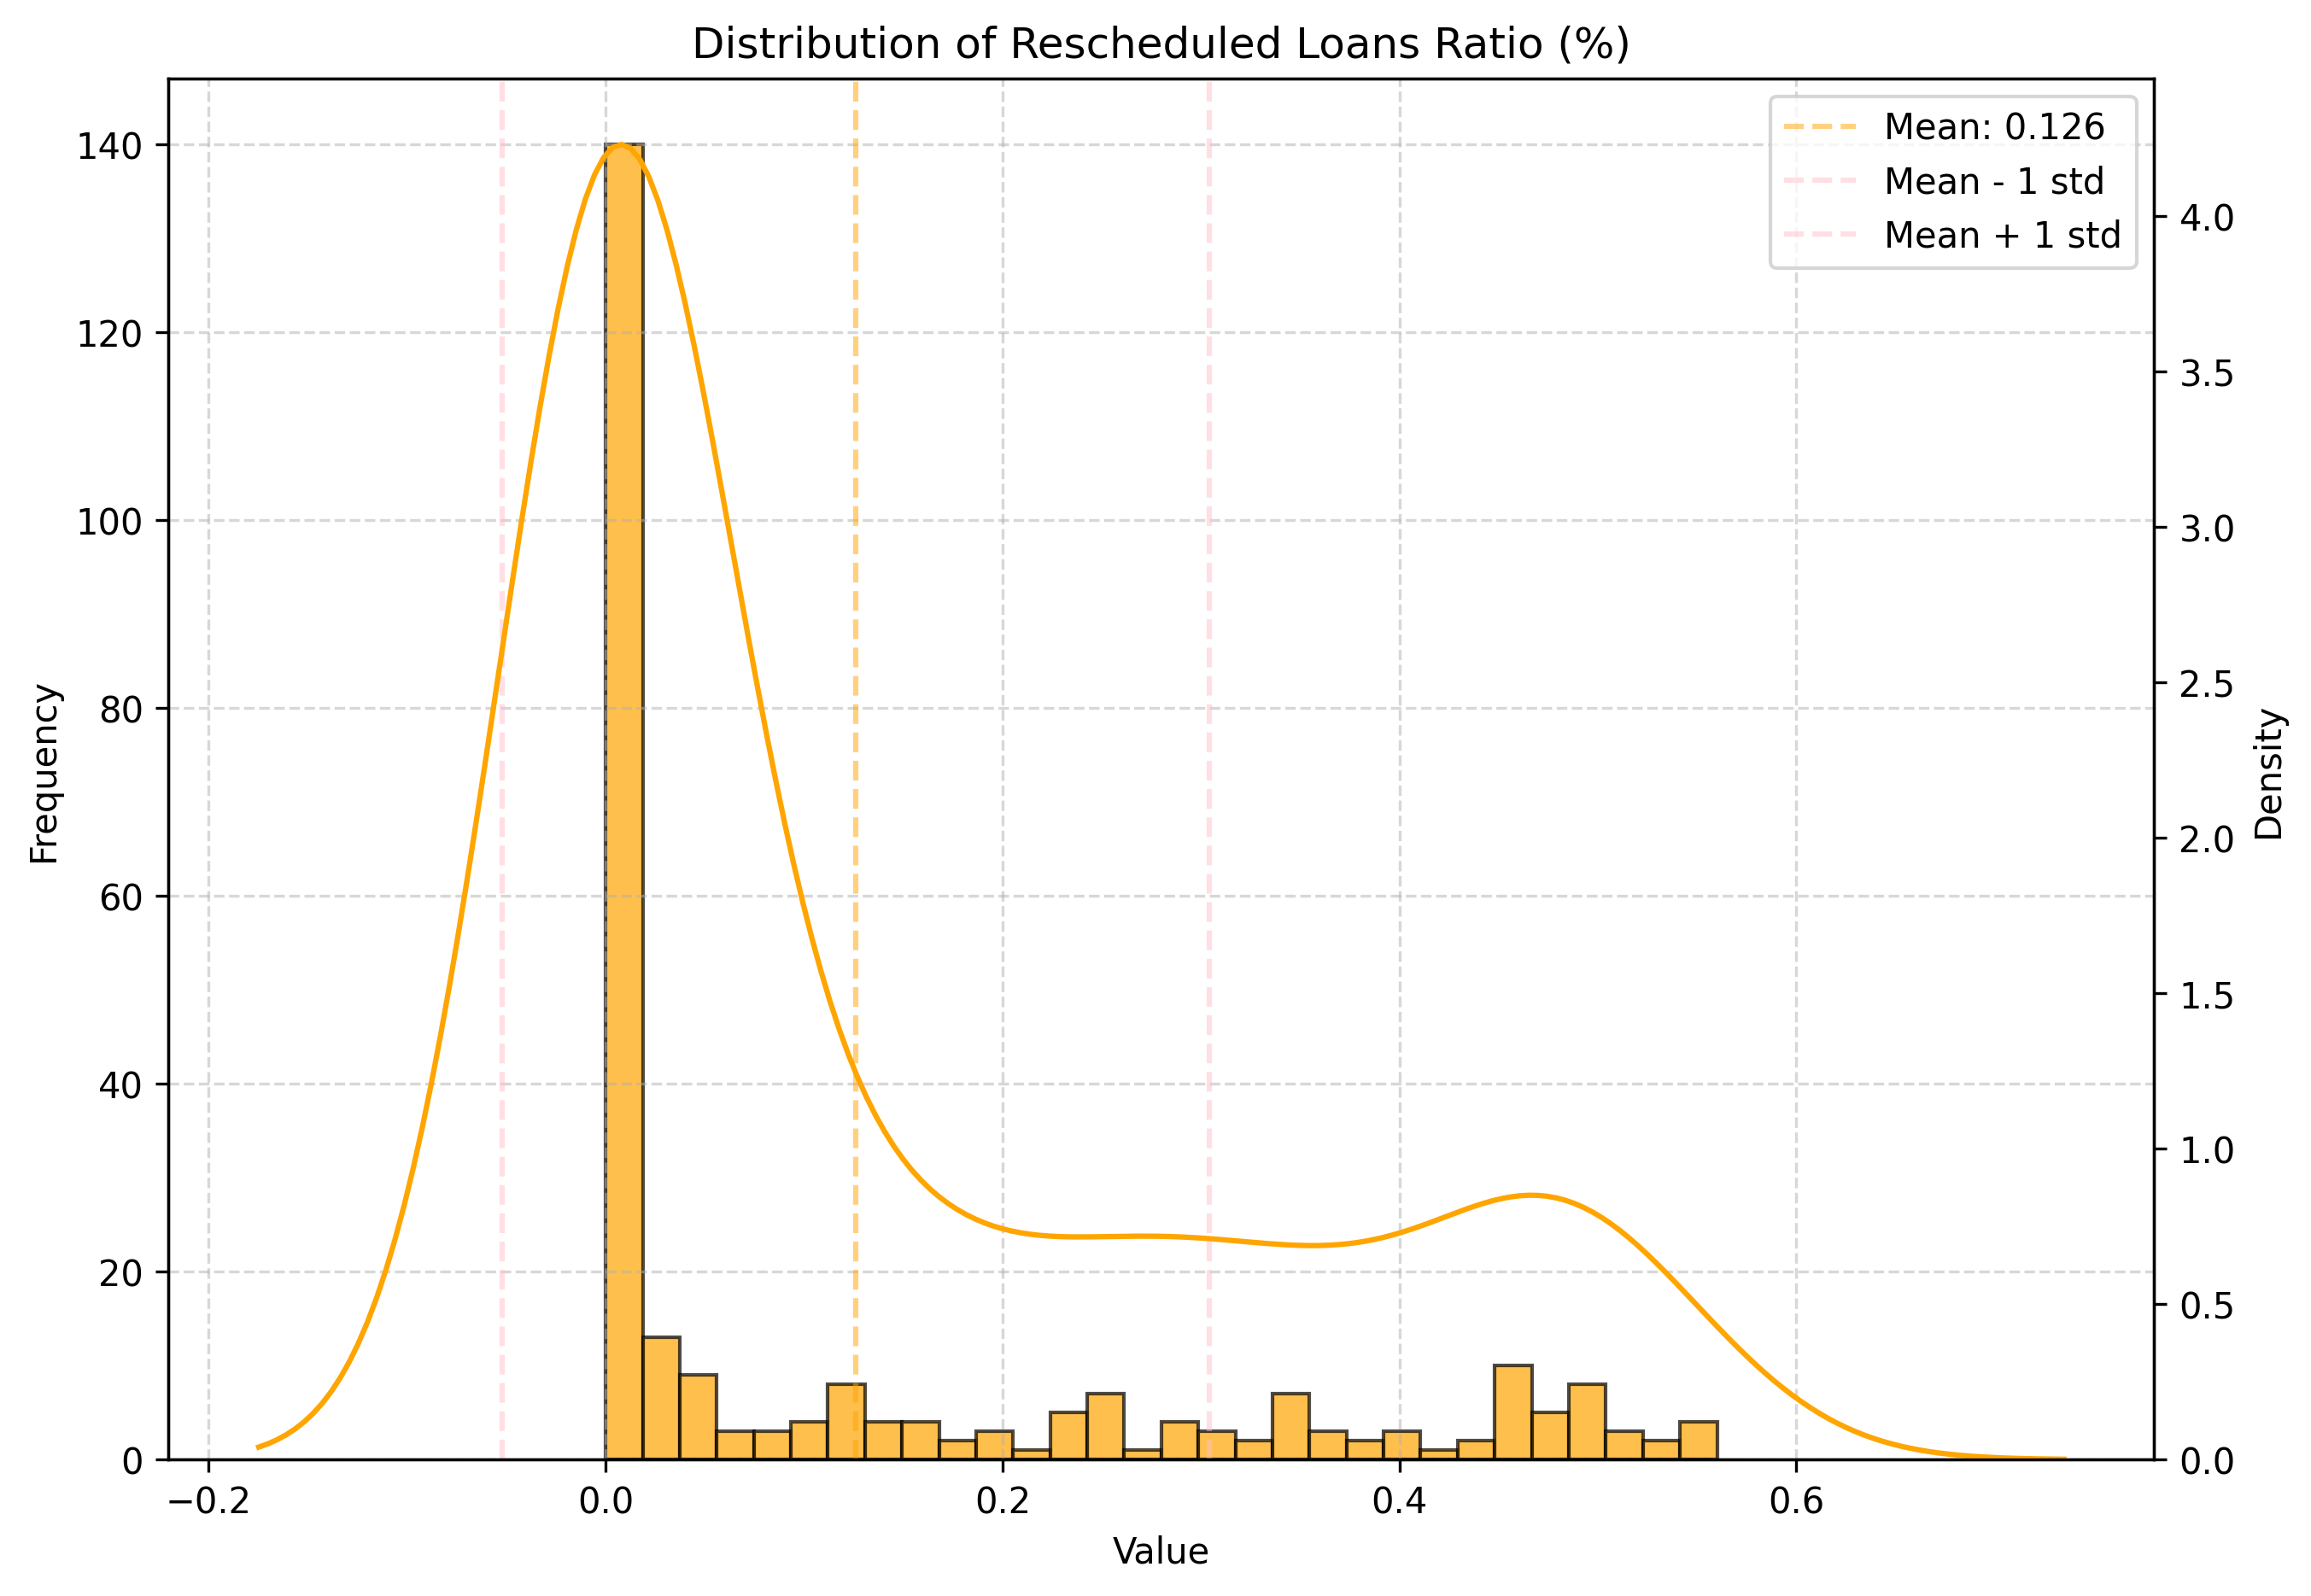

In [11]:
color = 'orange'
for i, col in enumerate(cols_outstanding):
    
    fig, ax1 = plt.subplots(figsize=(10, 7), dpi=300)
    ax2 = ax1.twinx()  # Create a twin axis for the KDE plot

    # Plot histogram with colormap
    n, bins, patches = ax1.hist(df_outstanding[col], bins=30, alpha=0.7, color=color, edgecolor='black')

    # Plot KDE plot
    sns.kdeplot(df_outstanding[col], color=color, ax=ax2)

    # Set labels and title
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax2.set_ylabel('Density')
    this_col = col + ' (Mn HKD)' if col == 'Outstanding Loans Value' else col + ' (%)'
    ax1.set_title(f'Distribution of {this_col}')

    # Add gridlines for the histogram
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Add a vertical line for mean and +- 1 standard deviation
    this_mean = df_outstanding[col].mean()
    this_std = df_outstanding[col].std()
    ax1.axvline(this_mean, color='orange', linestyle='--', label=f'Mean: {r(this_mean)}', alpha=0.5)
    ax1.axvline(this_mean - this_std, color='pink', linestyle='--', label='Mean - 1 std', alpha=0.5)
    ax1.axvline(this_mean + this_std, color='pink', linestyle='--', label='Mean + 1 std', alpha=0.5)

    ax1.legend()
    plt.show()

## Trend

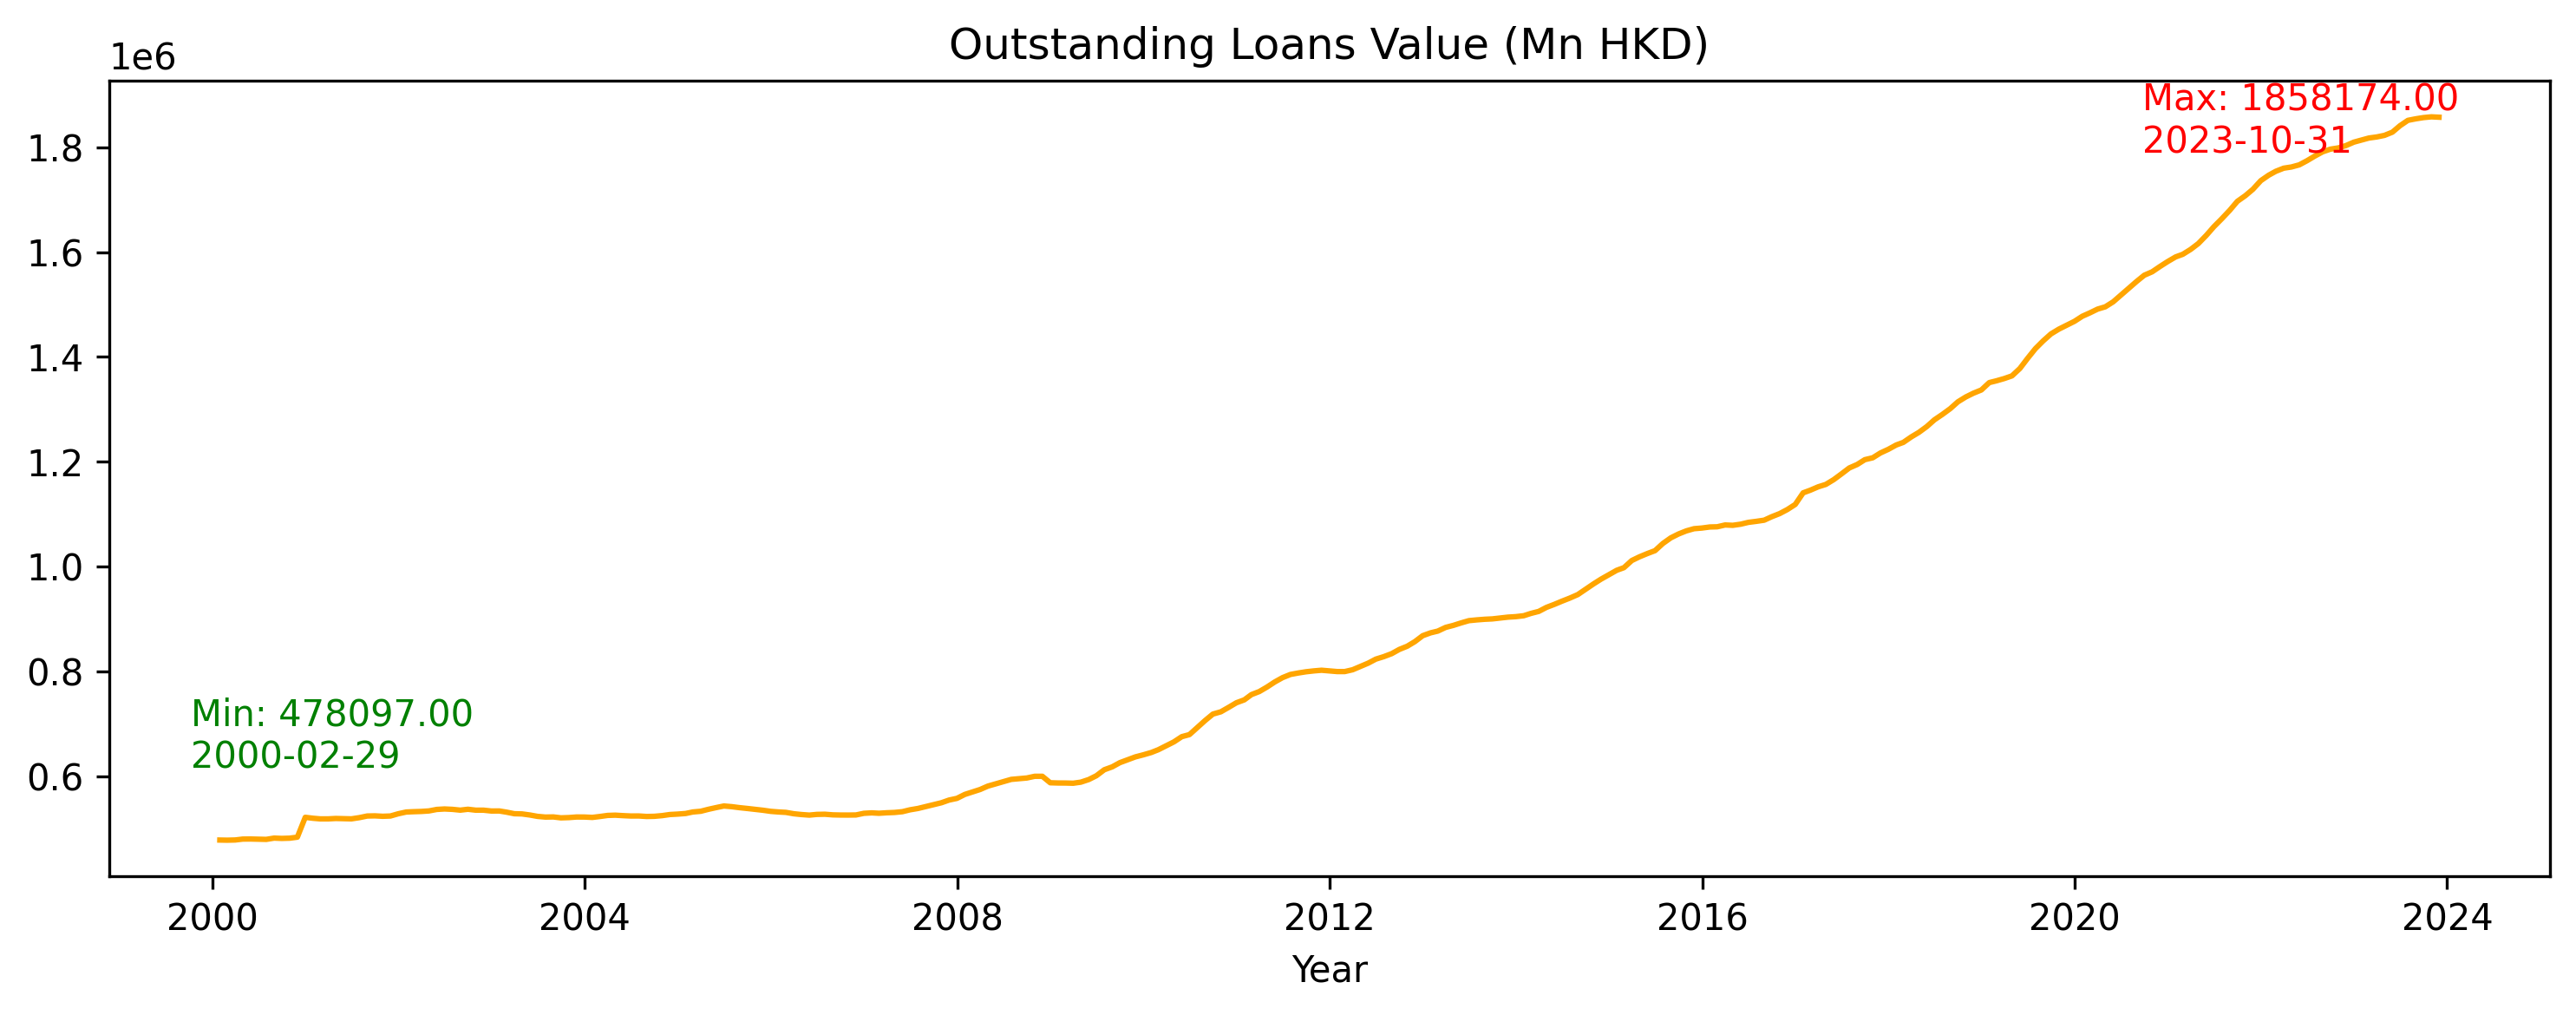

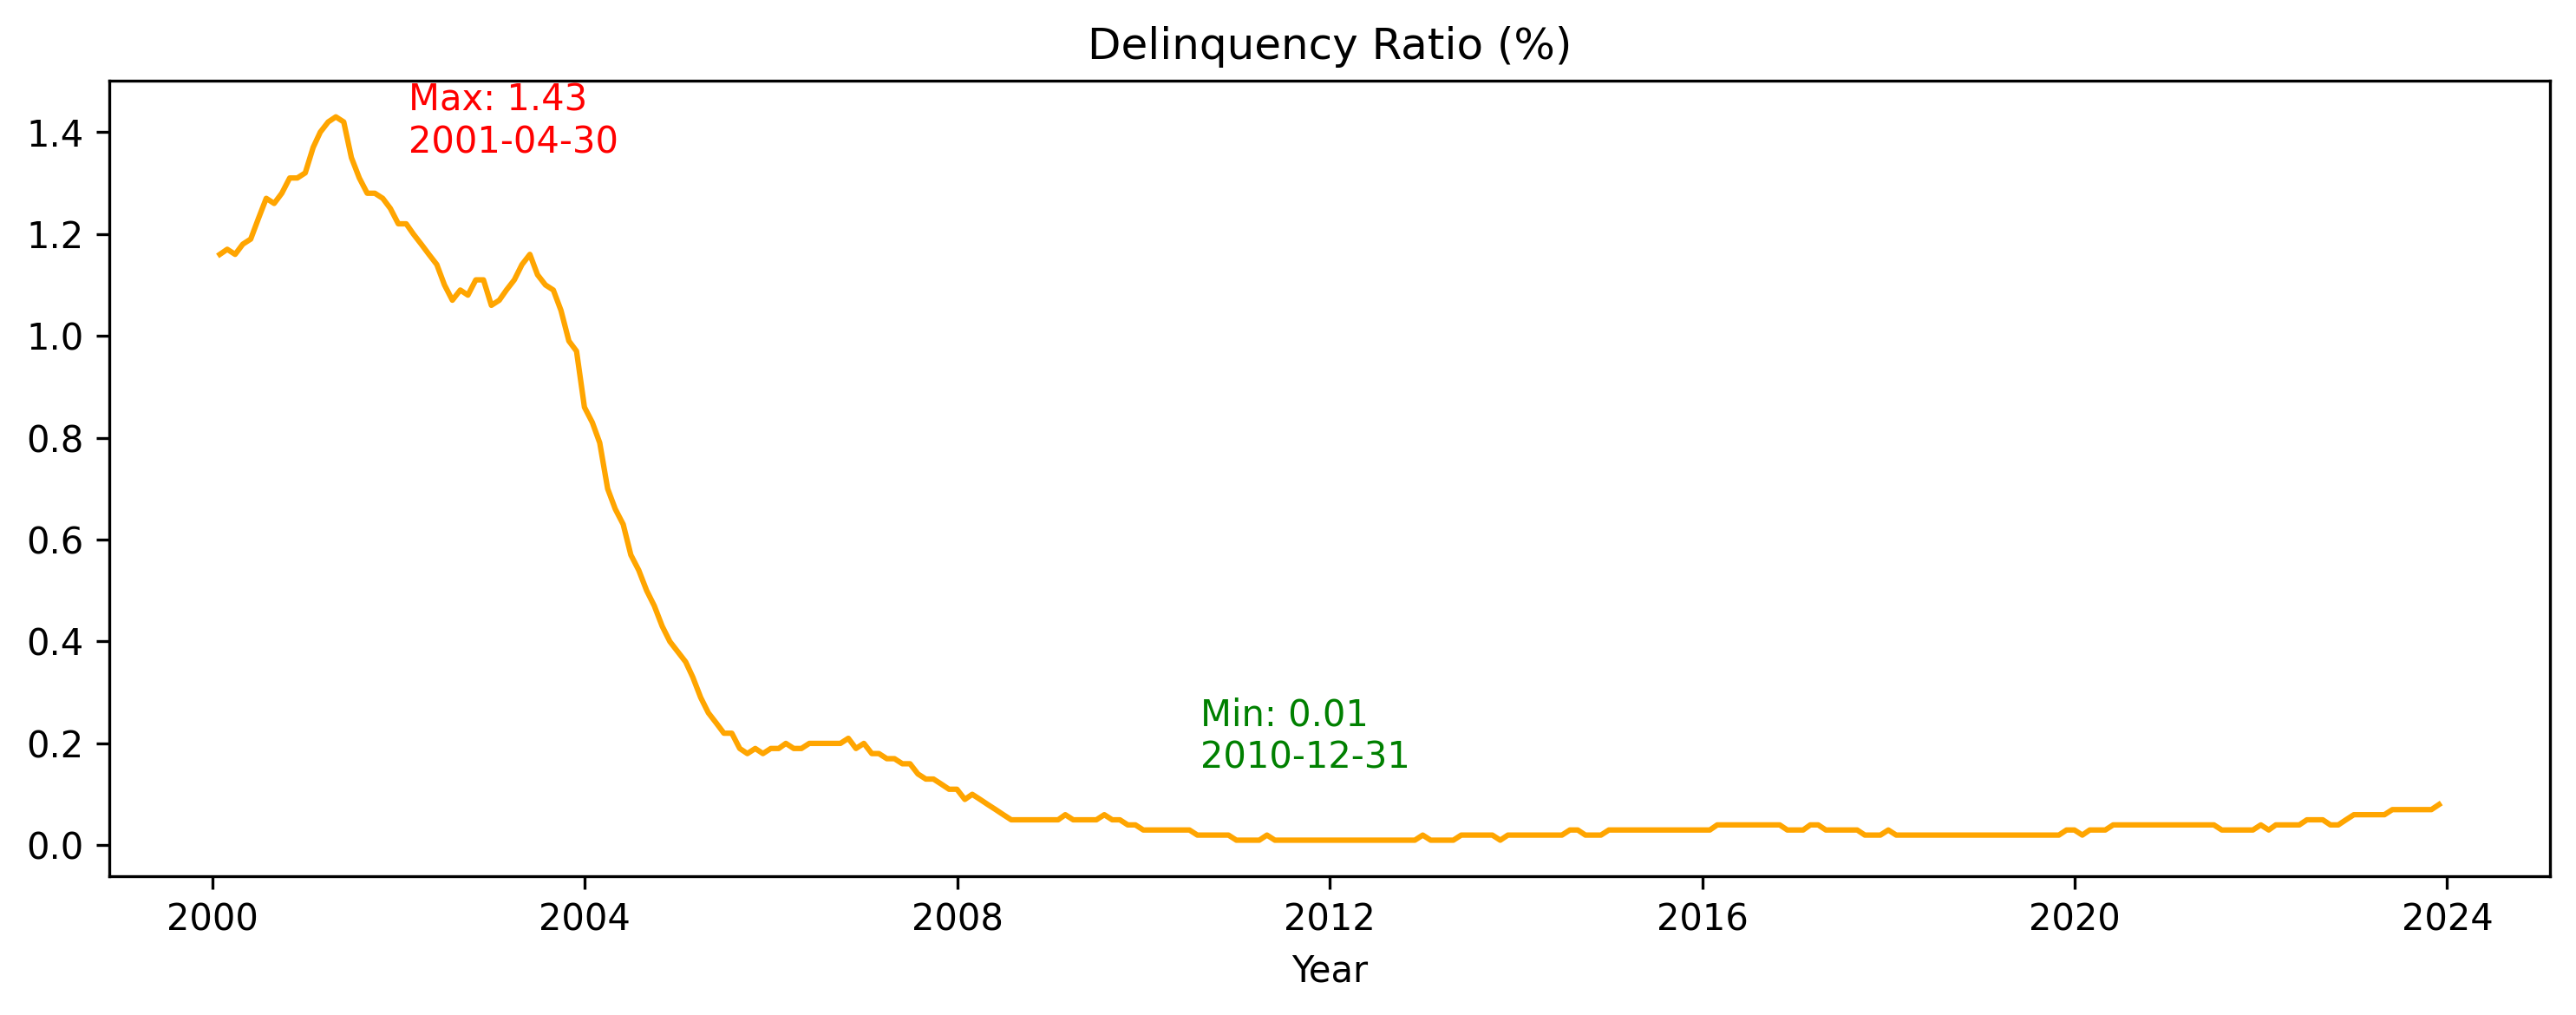

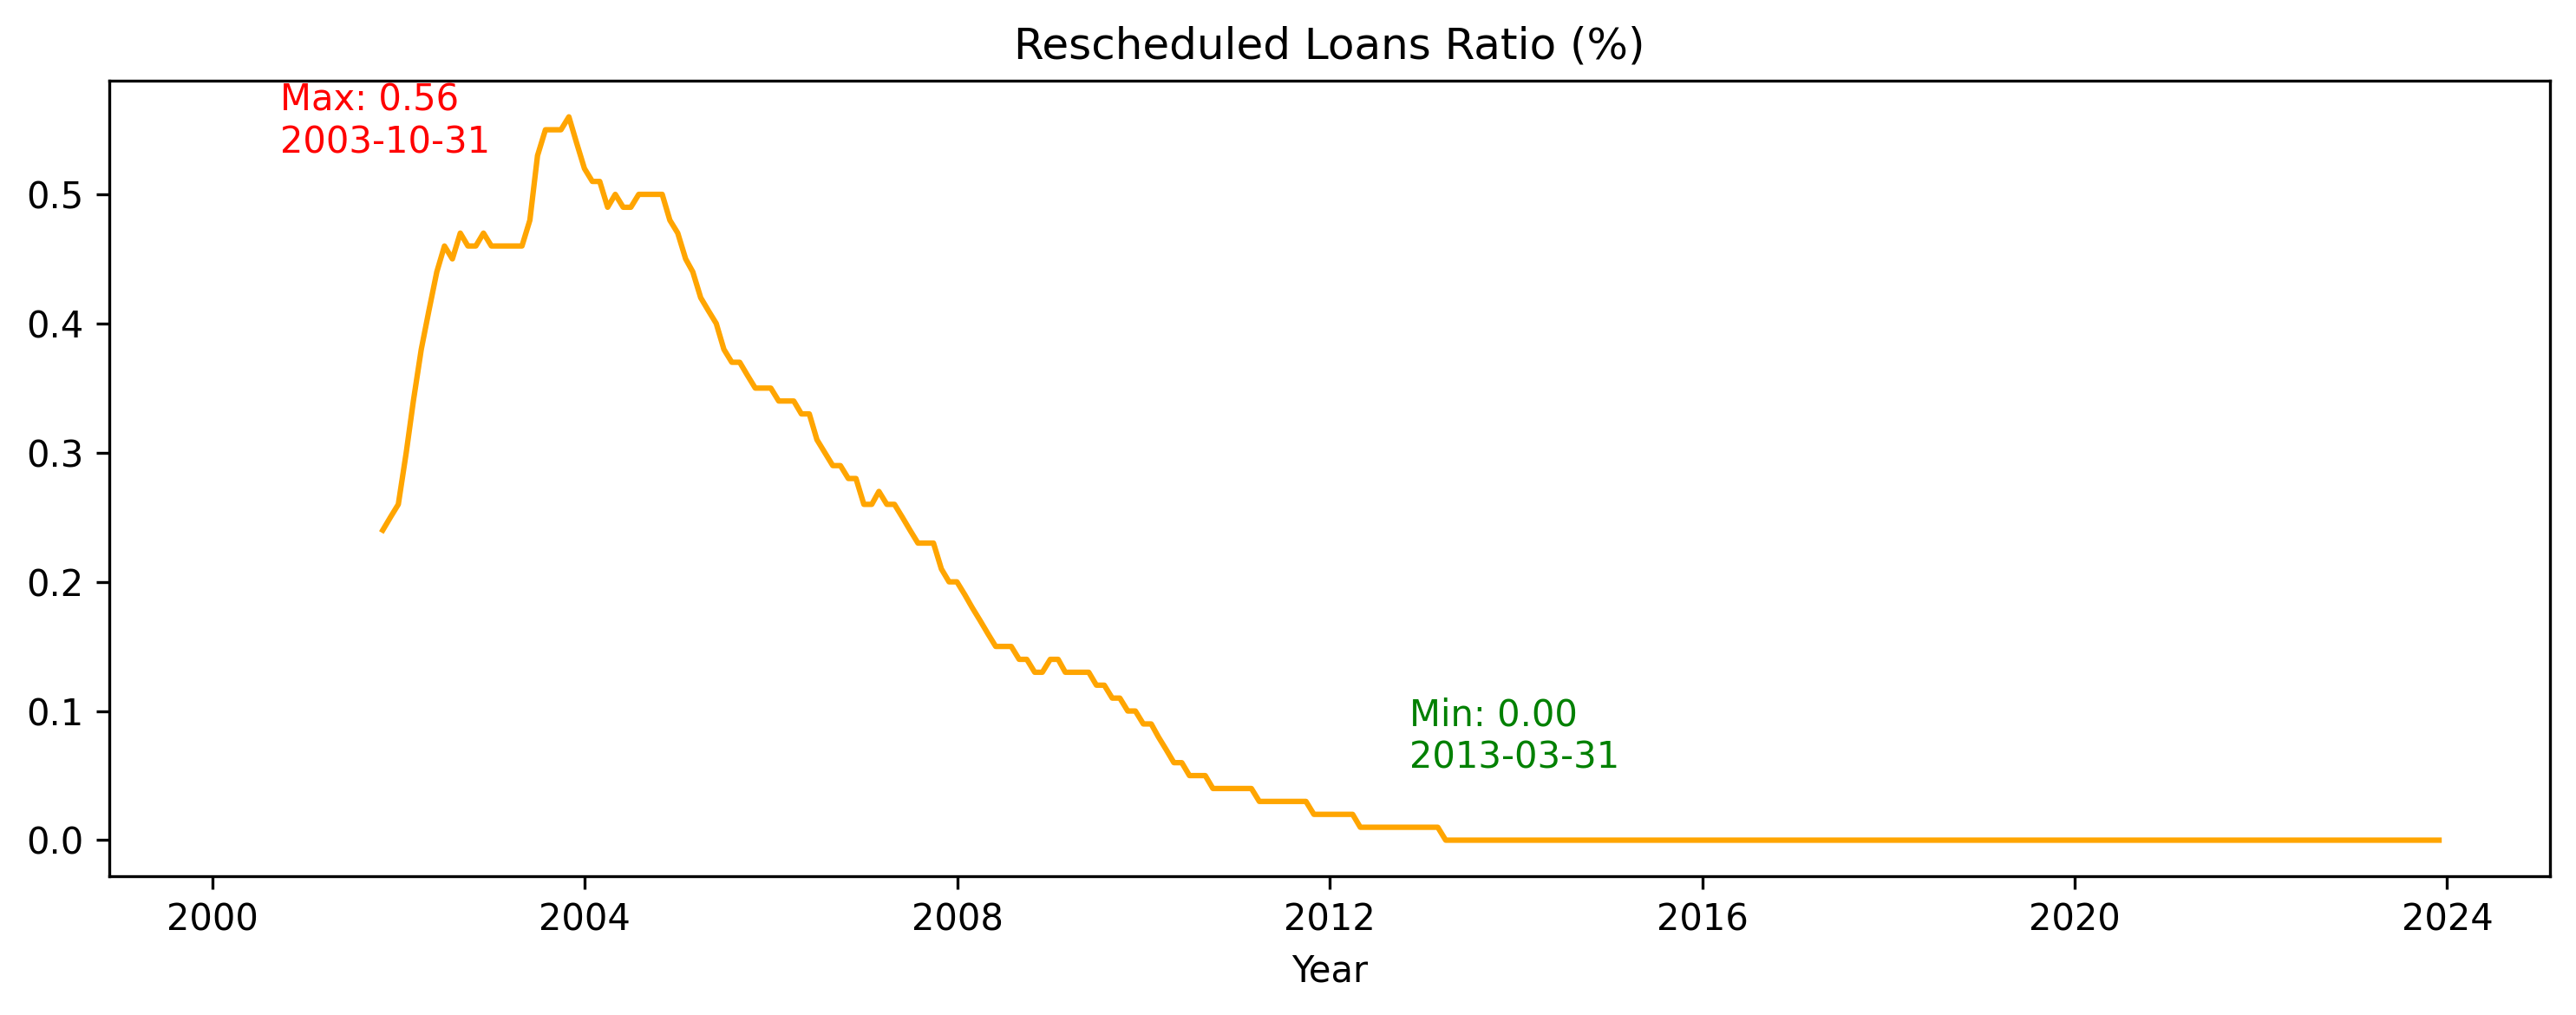

In [12]:
# Plot each column one by one
for col in cols_outstanding:
    plt.figure(figsize=(10, 4), dpi=300)
    plt.plot(df_outstanding['Date'], pd.Series(df_outstanding[col].mean(), index=df_outstanding['Date']), alpha=0)
    plt.plot(df_outstanding['Date'], df_outstanding[col], c=color)
    plt.xlabel('Year')
    this_col = col + ' (Mn HKD)' if col == 'Outstanding Loans Value' else col + ' (%)'
    plt.title(this_col)

    # Get the maximum and minimum values
    max_val = df_outstanding[col].max()
    min_val = df_outstanding[col].min()
    max_date = df_outstanding.loc[df_outstanding[col].idxmax(), 'Date']
    min_date = df_outstanding.loc[df_outstanding[col].idxmin(), 'Date']

    # Add annotations for maximum and minimum values
    if col == cols_outstanding[1]:
        plt.annotate(f'Max: {max_val:.2f}\n{timestamp2str(max_date)}', xy=(max_date, max_val),
                xytext=(20, -10), textcoords='offset points', color='red')
        plt.annotate(f'Min: {min_val:.2f}\n{timestamp2str(min_date)}', xy=(min_date, min_val),
                xytext=(-10, 20), textcoords='offset points', color='green')
    else:
        plt.annotate(f'Max: {max_val:.2f}\n{timestamp2str(max_date)}', xy=(max_date, max_val),
                    xytext=(-80, -10), textcoords='offset points', color='red')
        plt.annotate(f'Min: {min_val:.2f}\n{timestamp2str(min_date)}', xy=(min_date, min_val),
                    xytext=(-10, 20), textcoords='offset points', color='green')

    plt.tight_layout()
    plt.show()

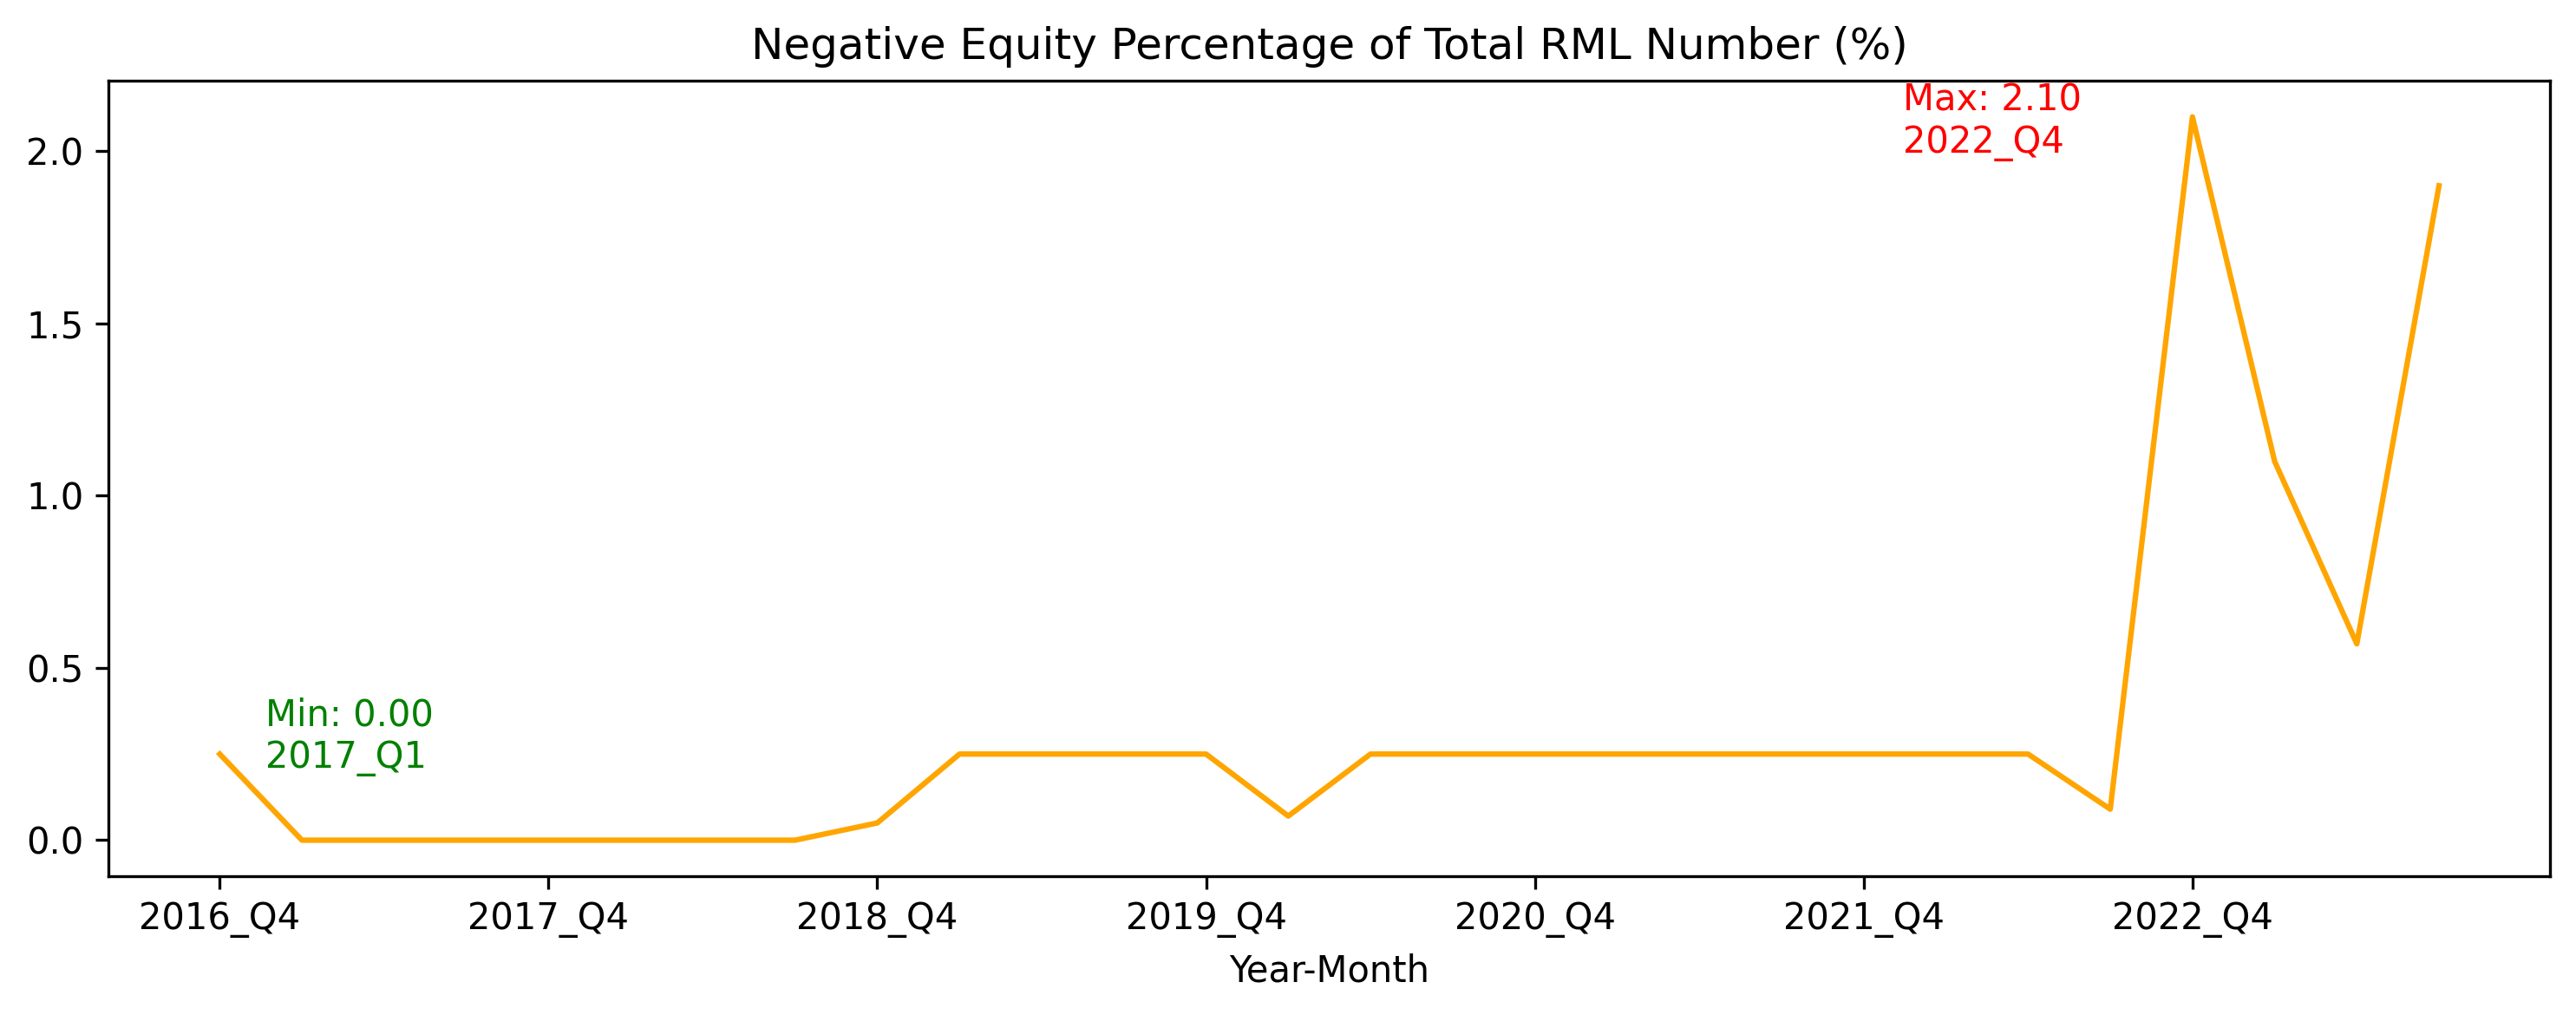

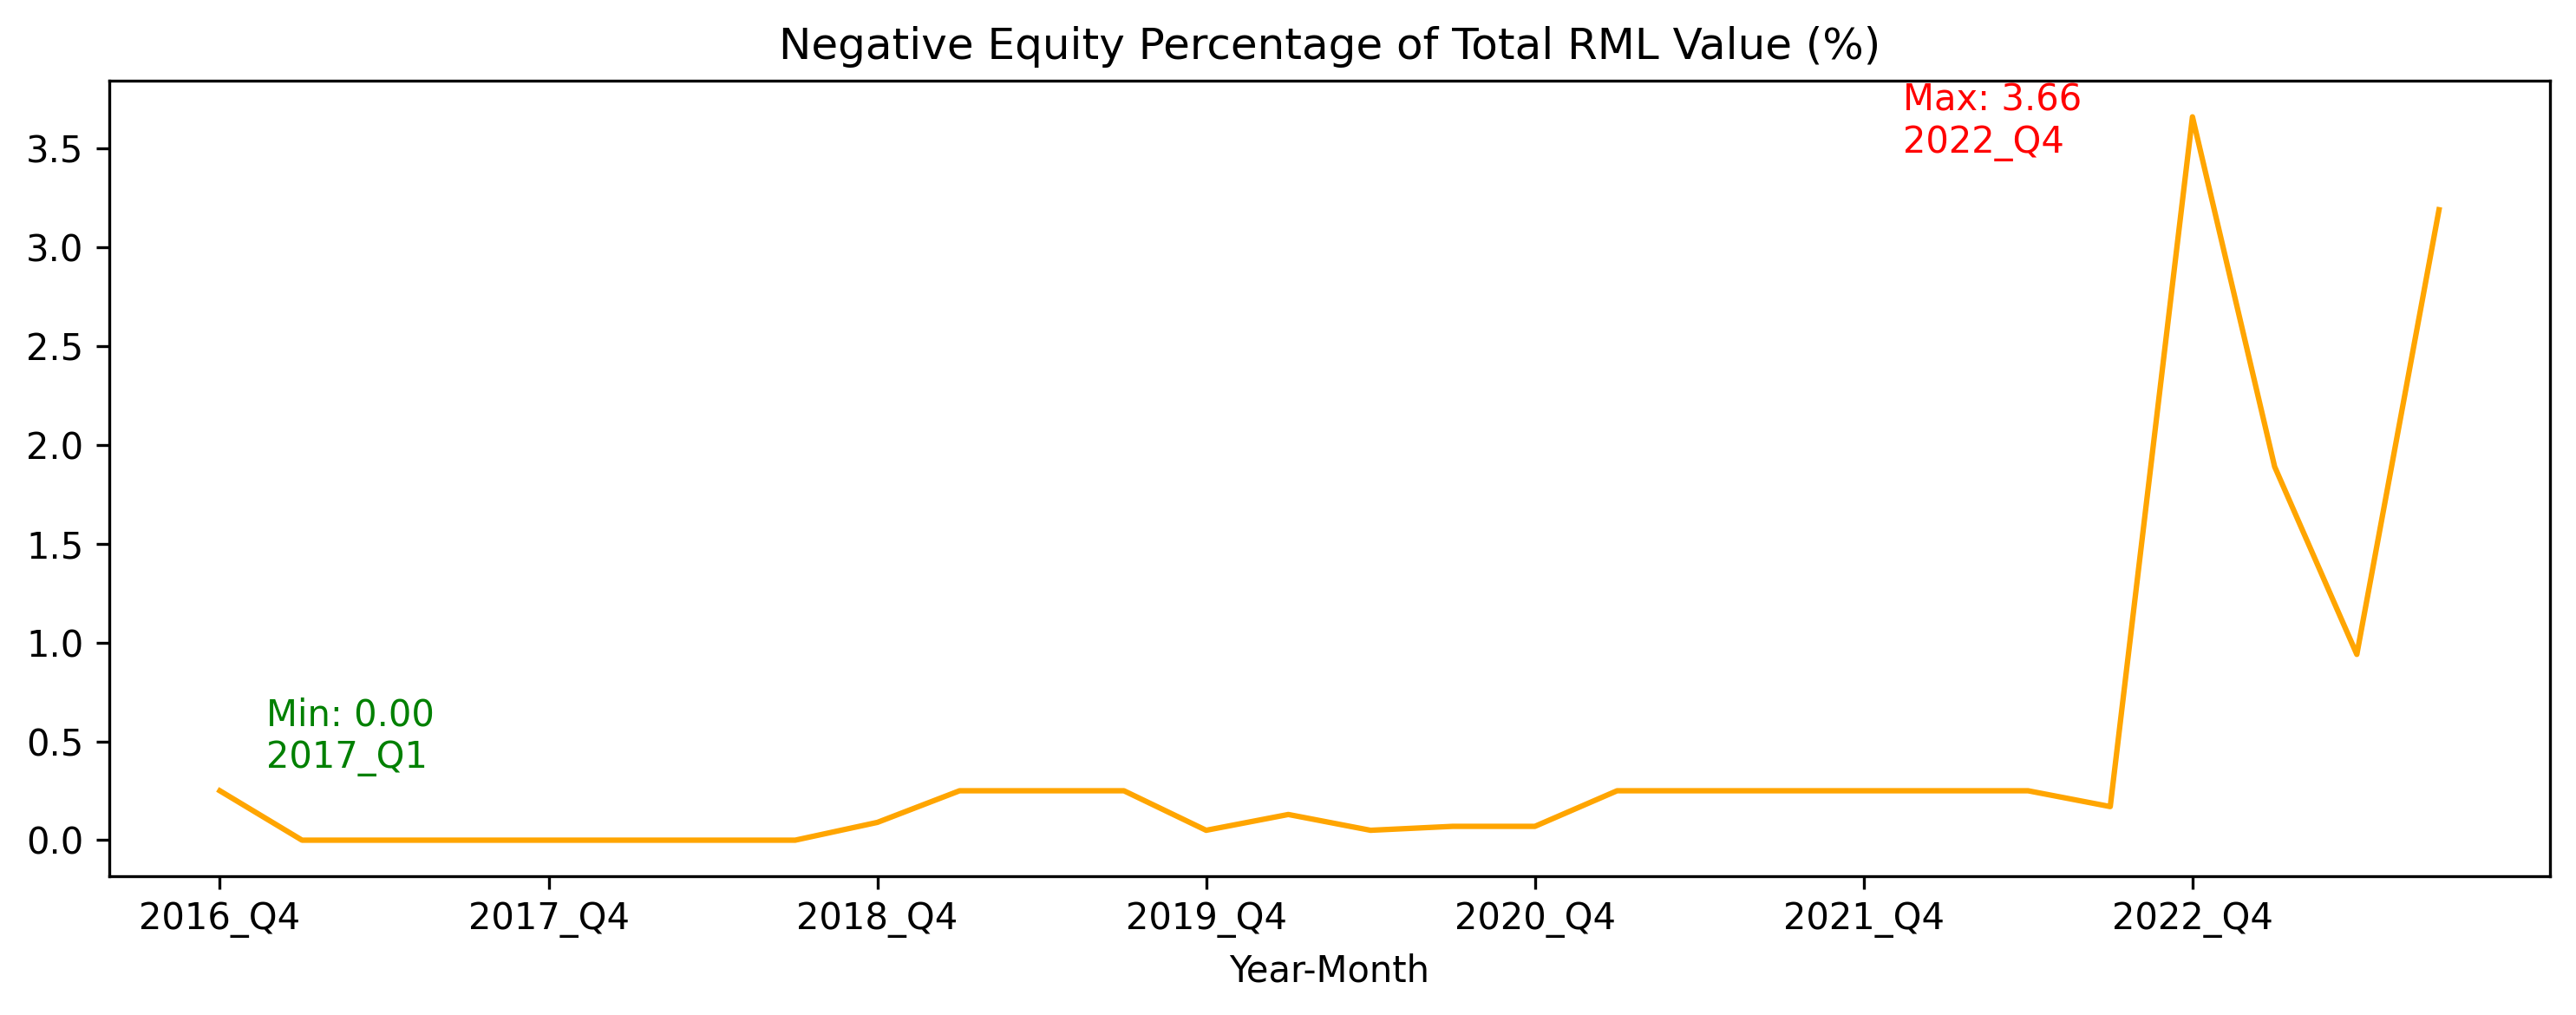

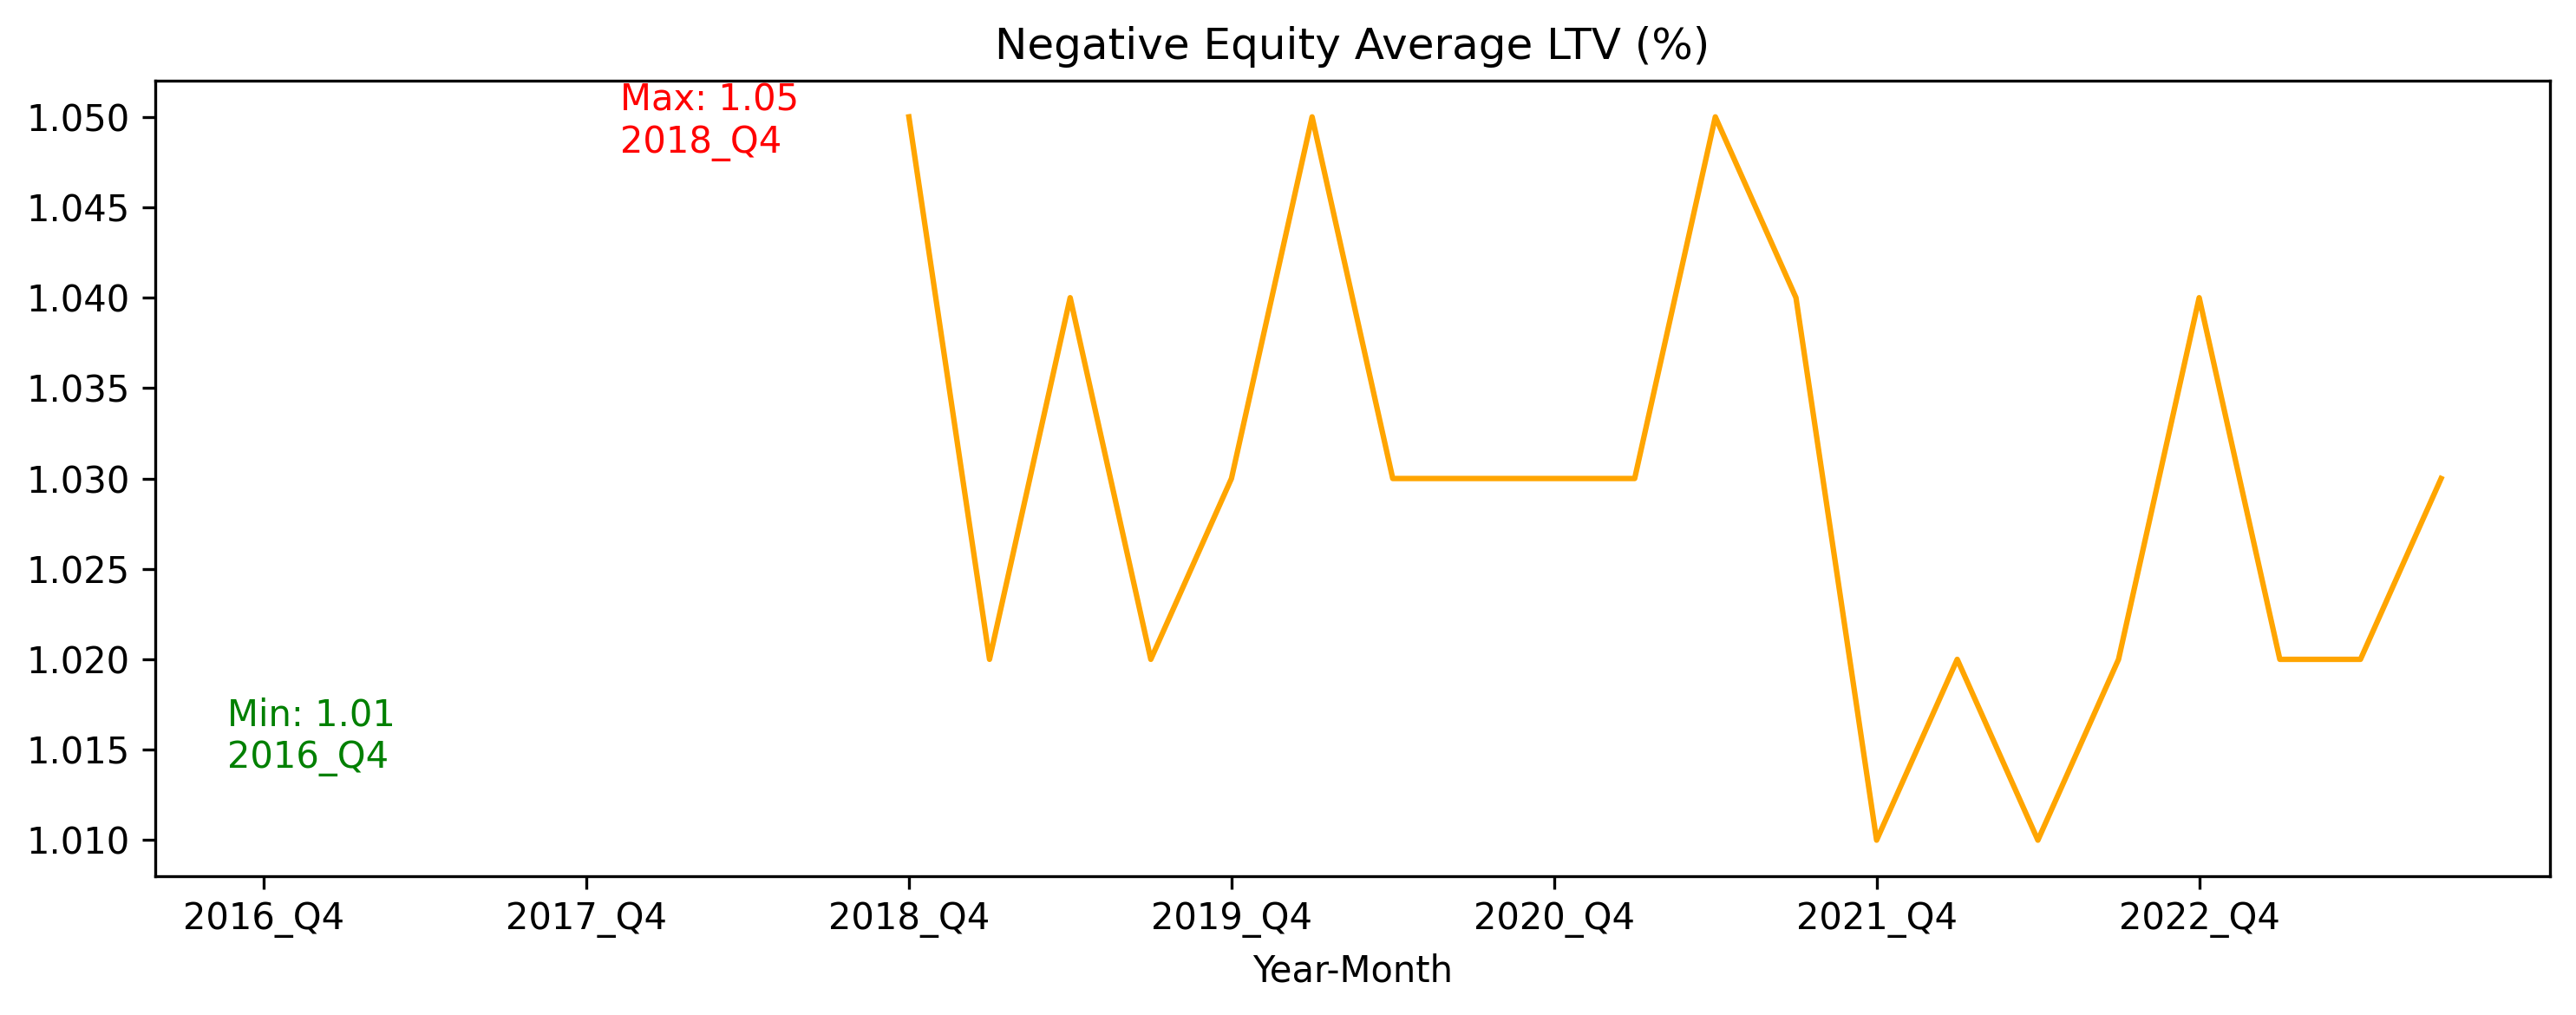

In [13]:
# Plot each column one by one
for col in cols_neg:
    plt.figure(figsize=(10, 4), dpi=300)
    plt.plot(df_neg['year_quarter'], pd.Series(df_neg[col].mean(), index=df_neg['year_quarter']), alpha=0)
    plt.plot(df_neg['year_quarter'], df_neg[col], c=color)
    plt.xlabel('Year-Month')
    this_col = col + ' (Mn HKD)' if col == 'Outstanding Loans Value' else col + ' (%)'
    plt.title('Negative Equity '+ this_col)

    # Get the maximum and minimum values
    max_val = df_neg[col].max()
    min_val = df_neg[col].min()
    max_date = df_neg.loc[df_neg[col].idxmax(), 'year_quarter']
    min_date = df_neg.loc[df_neg[col].idxmin(), 'year_quarter']

    # Add annotations for maximum and minimum values
    if col == cols_outstanding[1]:
        plt.annotate(f'Max: {max_val:.2f}\n{timestamp2str(max_date)}', xy=(max_date, max_val),
                xytext=(20, -10), textcoords='offset points', color='red')
        plt.annotate(f'Min: {min_val:.2f}\n{timestamp2str(min_date)}', xy=(min_date, min_val),
                xytext=(-10, 20), textcoords='offset points', color='green')
    else:
        plt.annotate(f'Max: {max_val:.2f}\n{timestamp2str(max_date)}', xy=(max_date, max_val),
                    xytext=(-80, -10), textcoords='offset points', color='red')
        plt.annotate(f'Min: {min_val:.2f}\n{timestamp2str(min_date)}', xy=(min_date, min_val),
                    xytext=(-10, 20), textcoords='offset points', color='green')

    plt.xticks(range(0, len(df_neg['year_quarter']), 4))
    plt.tight_layout()
    plt.show()

# 2, Segmentation Anlysis

Config

In [14]:
df_outstanding_seg = df_outstanding.loc[df_outstanding['Year']>=2000]
df_outstanding_seg

Date  Year  Month  Quarter  Outstanding Loans Value  \
43  2000-01-31  2000      1        1                   478343   
44  2000-02-29  2000      2        1                   478097   
45  2000-03-31  2000      3        1                   478457   
46  2000-04-30  2000      4        2                   480189   
47  2000-05-31  2000      5        2                   480318   
..         ...   ...    ...      ...                      ...   
325 2023-07-31  2023      7        3                  1851500   
326 2023-08-31  2023      8        3                  1854441   
327 2023-09-30  2023      9        3                  1856750   
328 2023-10-31  2023     10        4                  1858174   
329 2023-11-30  2023     11        4                  1857469   

     Delinquency Ratio  Rescheduled Loans Ratio  
43                1.16                      NaN  
44                1.17                      NaN  
45                1.16                      NaN  
46                1.18                      NaN  
47                1.19                      NaN  
..                 ...                      ...  
325               0.07                      0.0  
326               0.07                      0.0  
327               0.07                      0.0  
328               0.07                      0.0  
329               0.08                      0.0  

[287 rows x 7 columns]

## By Year

In [15]:
mean_values_yearly = df_outstanding_seg.groupby('Year')[cols_outstanding].mean()

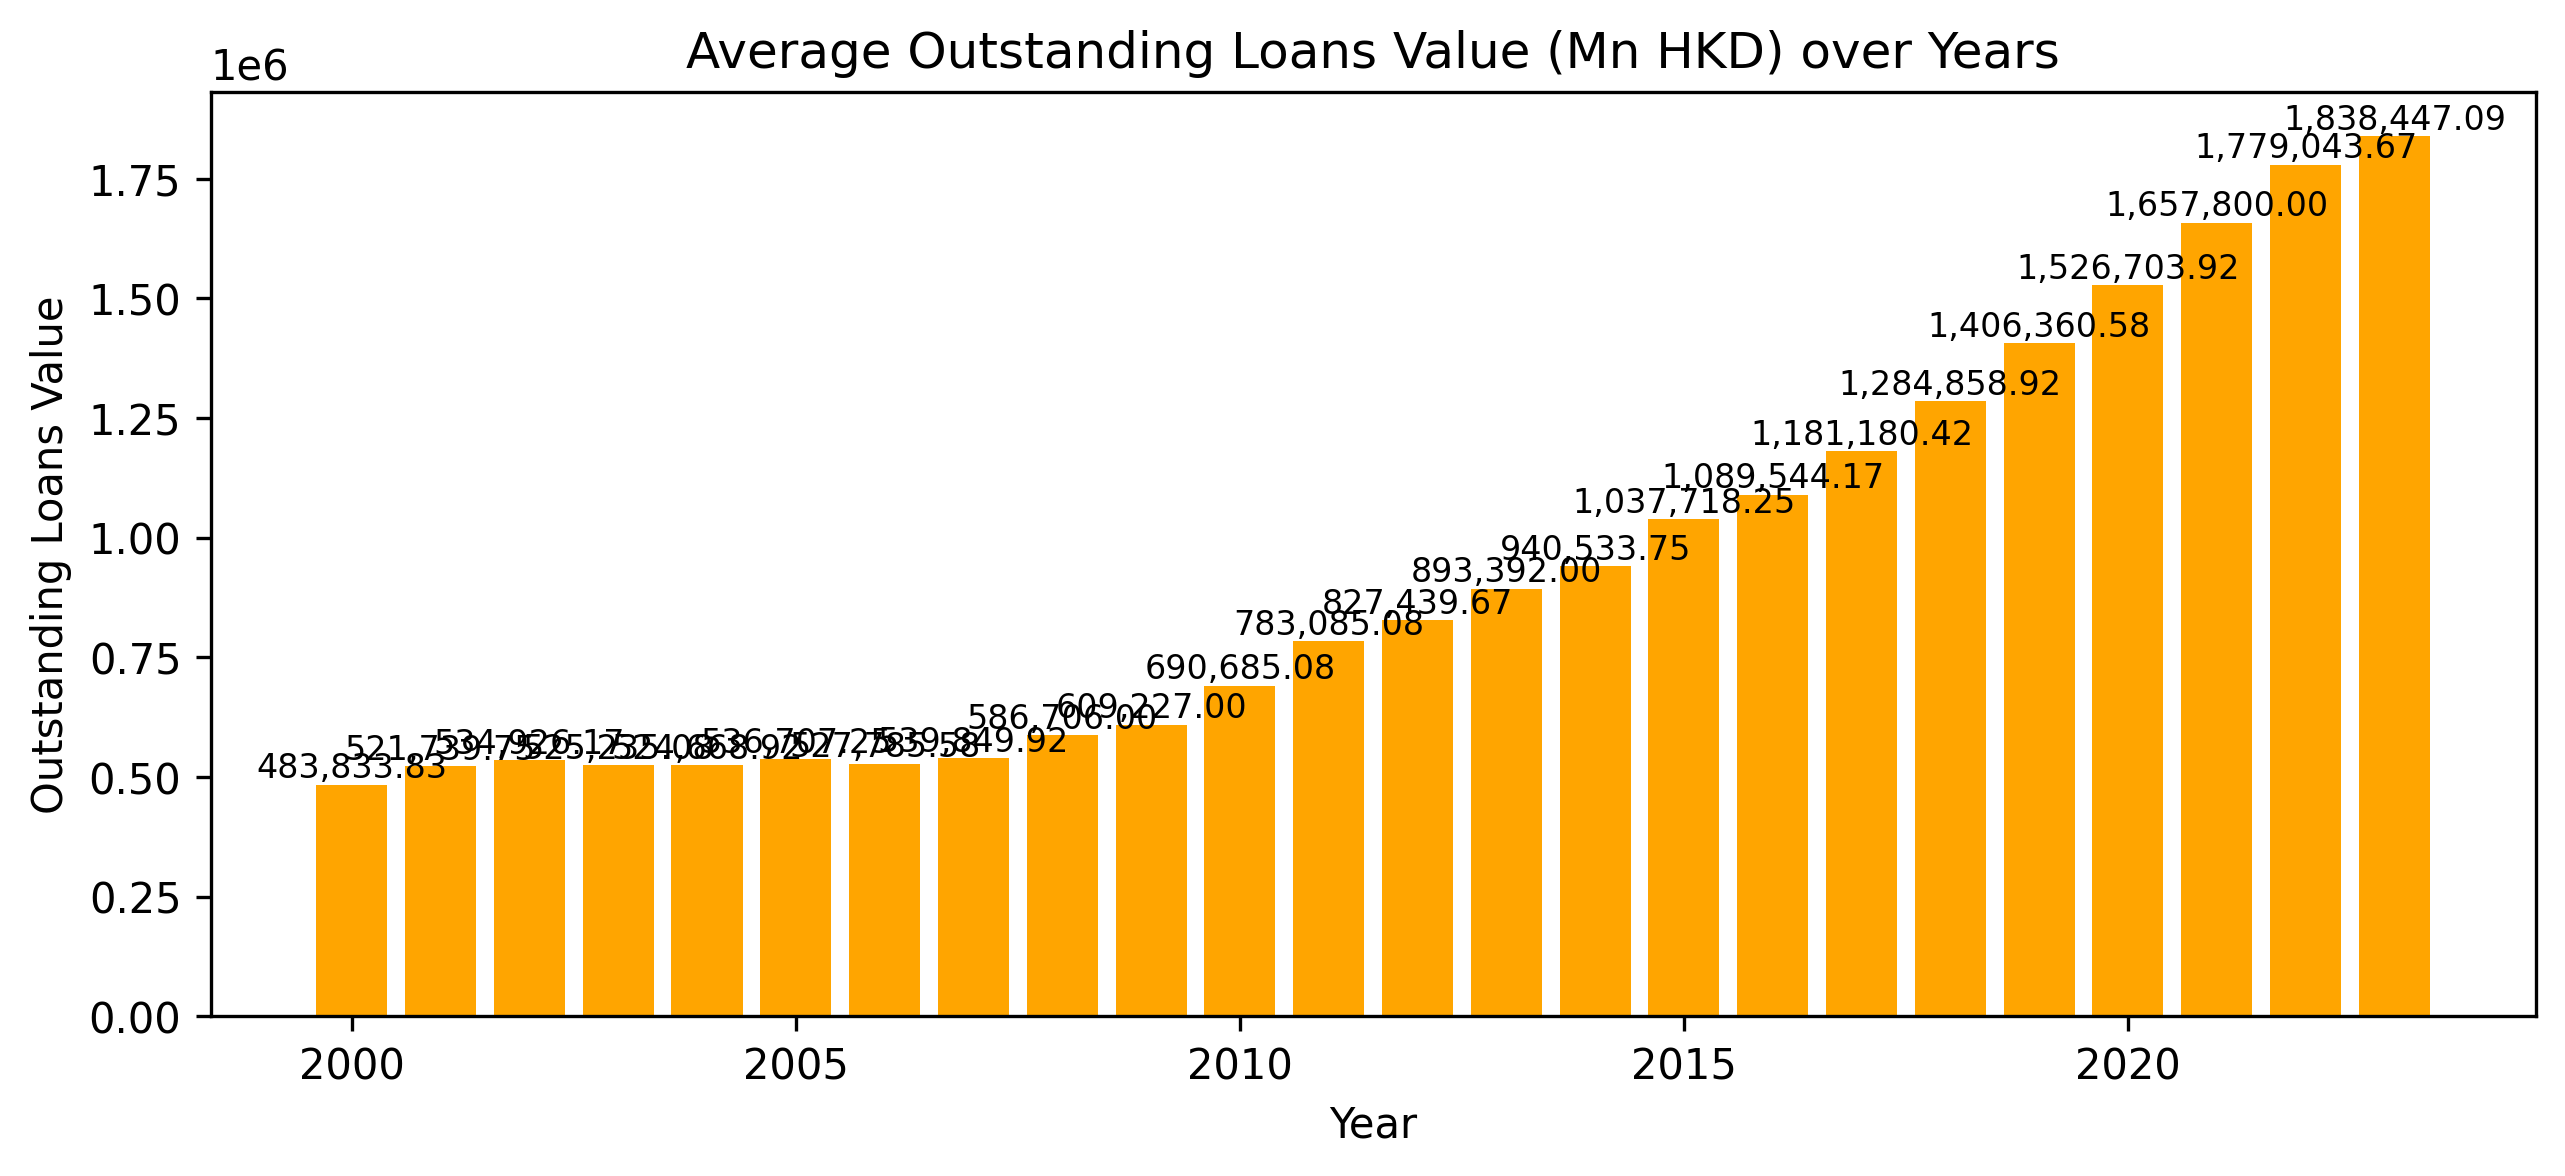

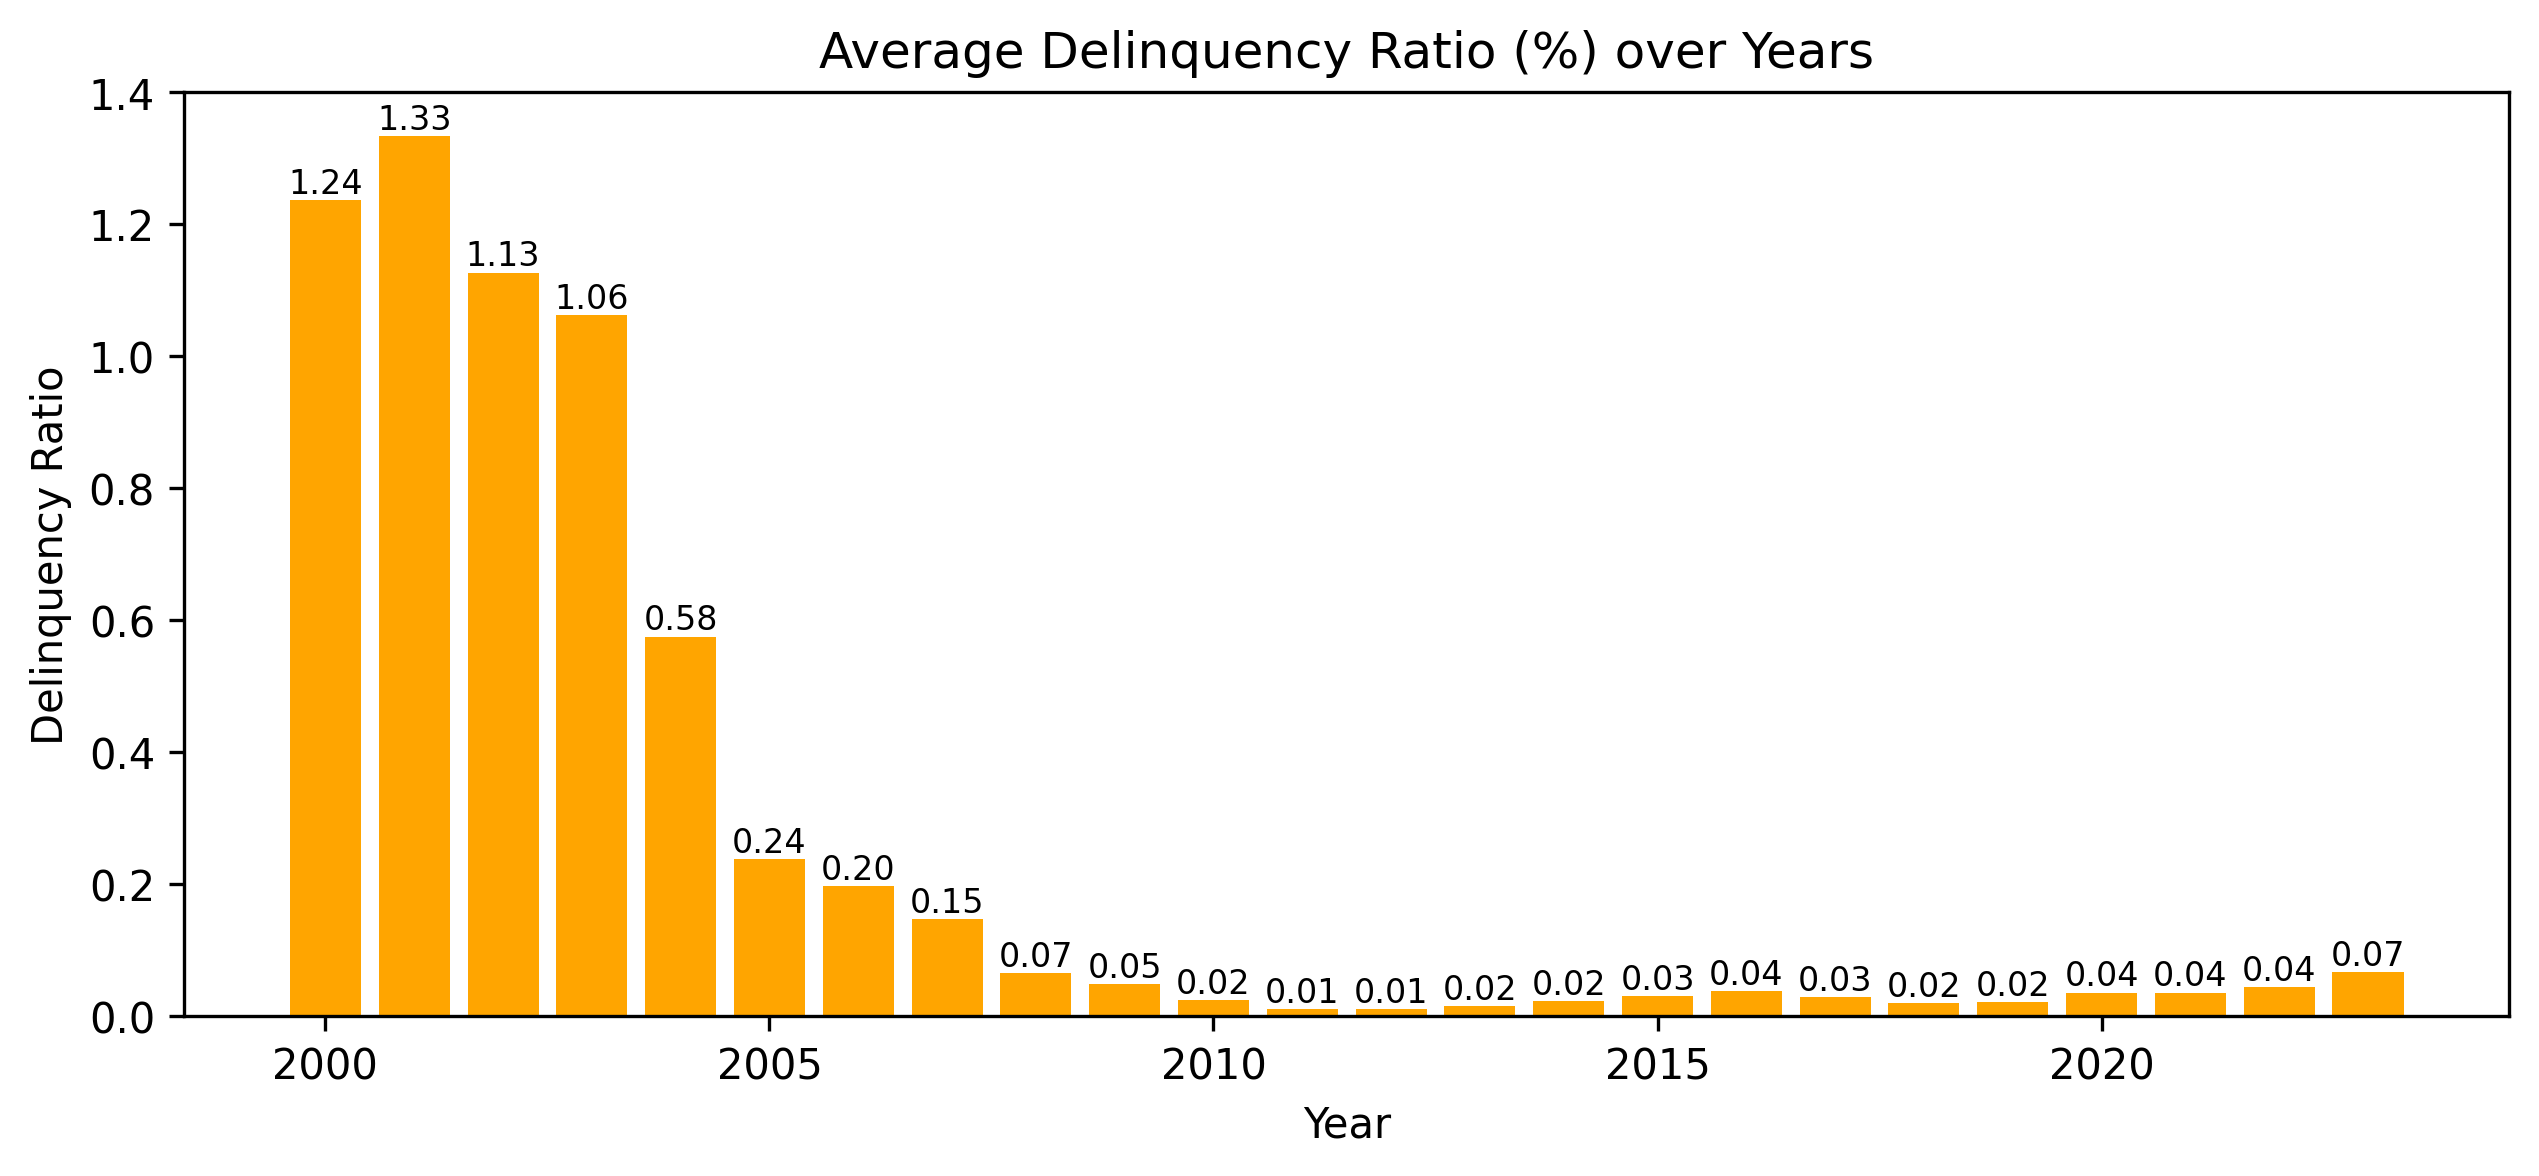

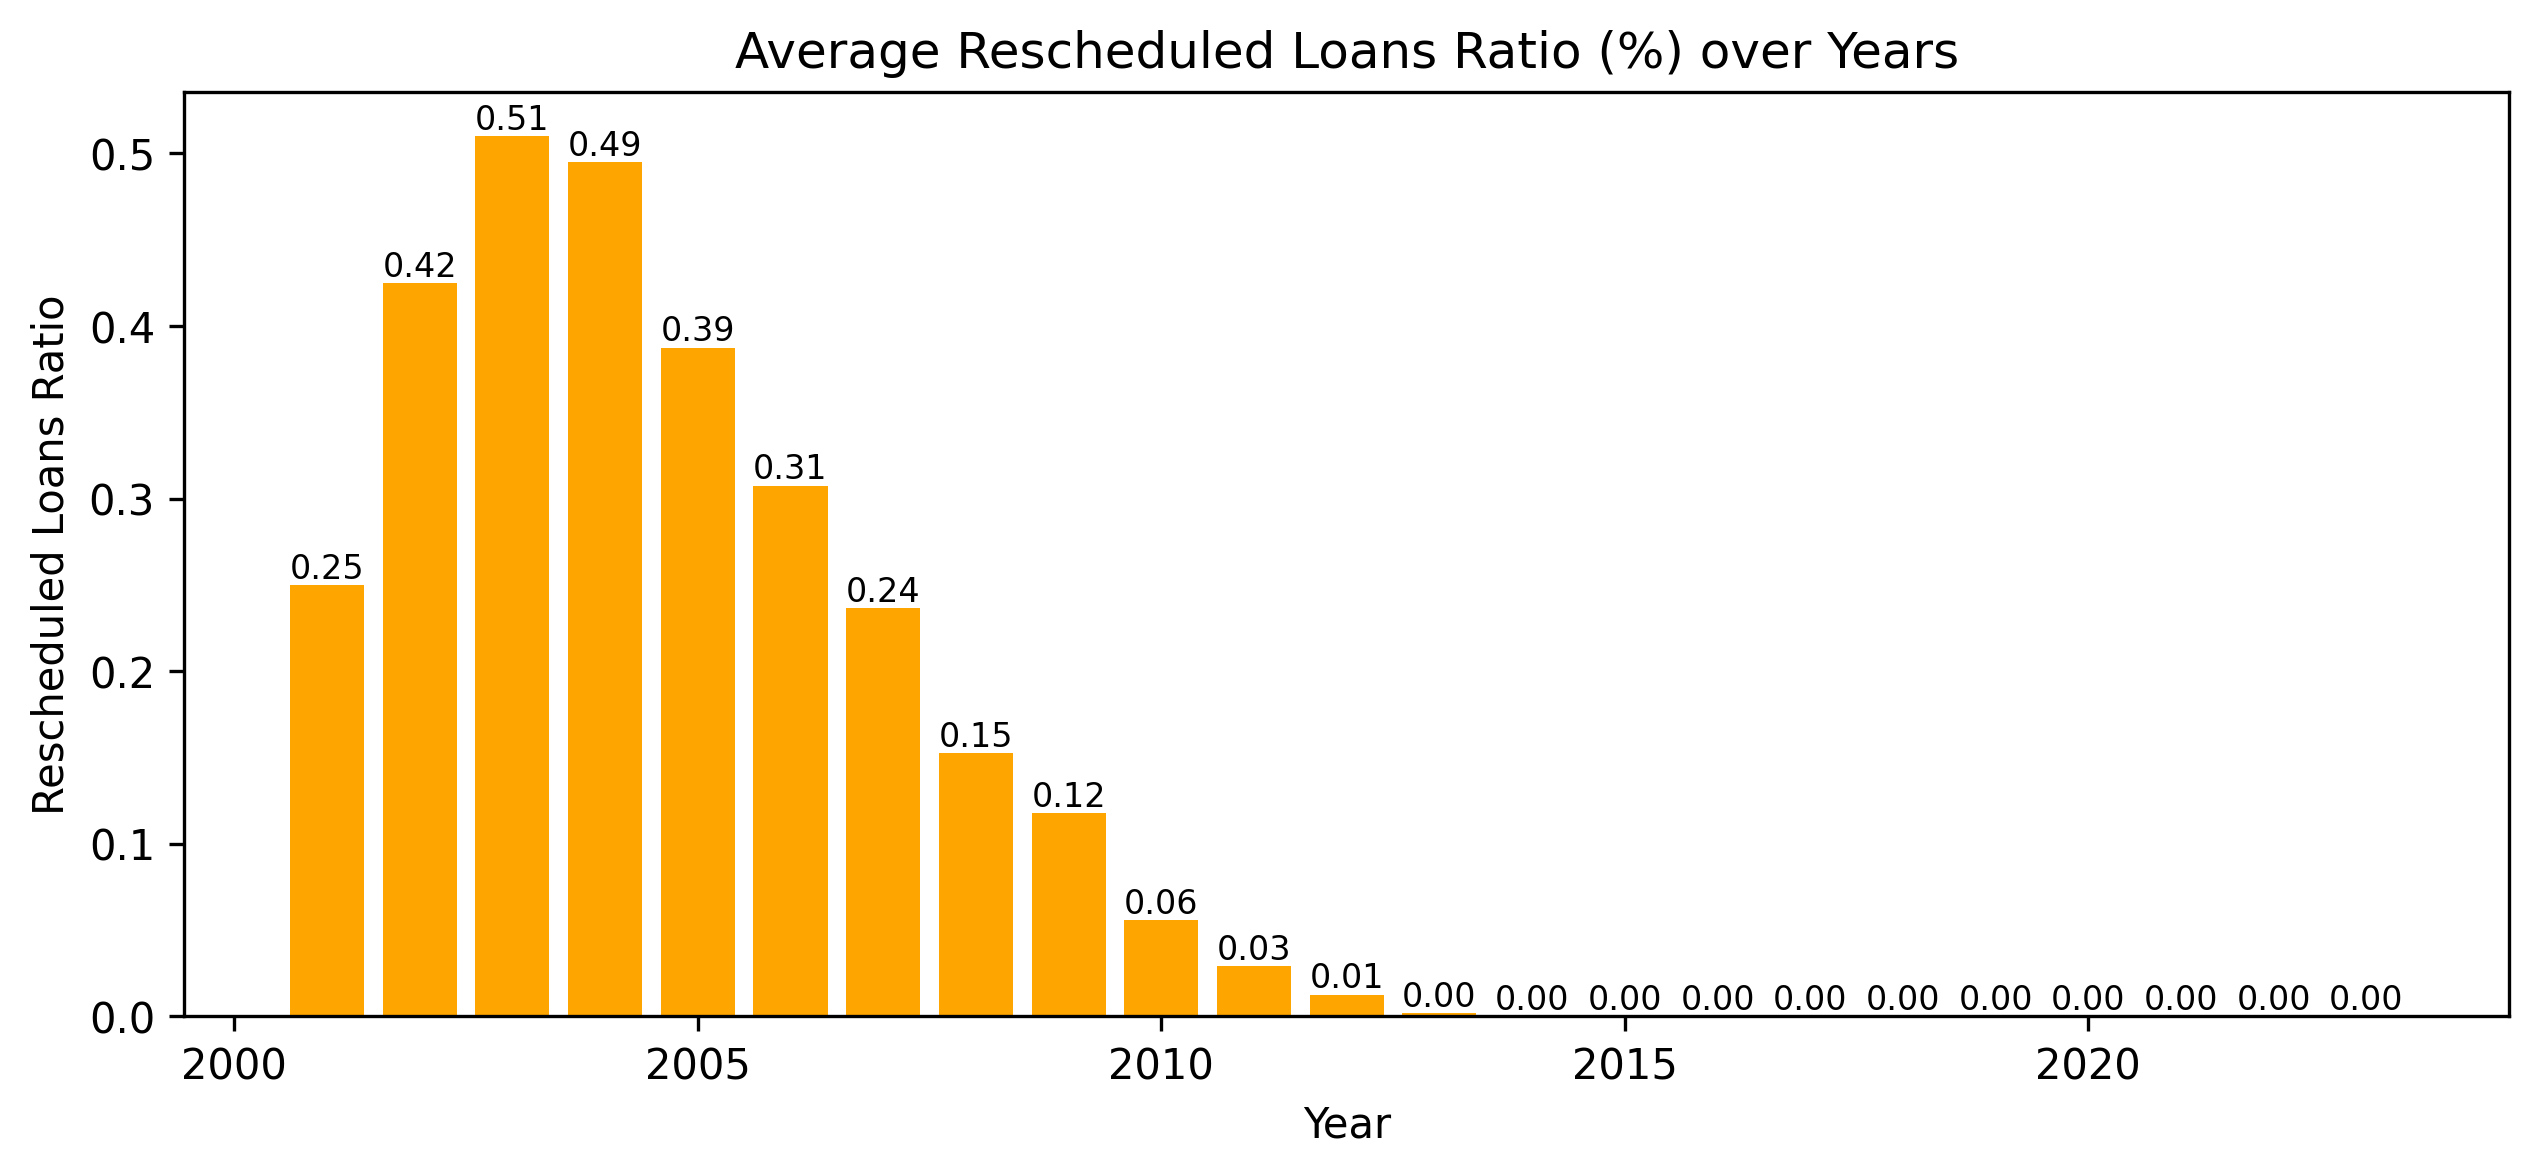

In [43]:
color = 'orange'

#Iterate over each column and plot the bar chart
for col in cols_outstanding:
    fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
    not_null_idx = ~mean_values_yearly[col].isna()
    bars = ax.bar(mean_values_yearly.loc[not_null_idx].index, mean_values_yearly[col].loc[not_null_idx], color=color)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    this_col = col + ' (Mn HKD)' if col == 'Outstanding Loans Value' else col + ' (%)'
    ax.set_title(f'Average {this_col} over Years')

    # Add number annotations to each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:,.2f}", ha='center', va='bottom', fontsize=8)

    plt.show()

## By Quarter

In [17]:
# Group the DataFrame by 'Quarter' and calculate the mean of selected columns
mean_values_quarterly = df_outstanding_seg.groupby('Quarter')[cols_outstanding].mean()

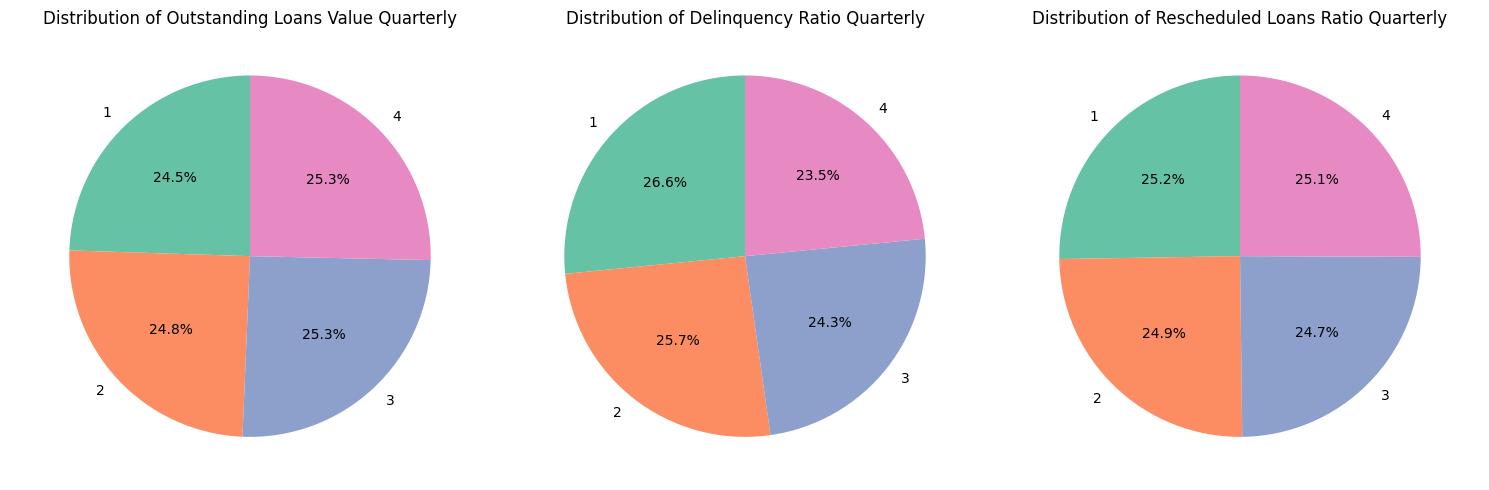

In [18]:
# Define the columns
cols_outstanding = ['Outstanding Loans Value', 'Delinquency Ratio', 'Rescheduled Loans Ratio']

# Create subplots
fig, axs = plt.subplots(1, len(cols_outstanding), figsize=(15, 5))

# Iterate over each column and plot the pie chart
for i, col in enumerate(cols_outstanding):
    axs[i].pie(mean_values_quarterly[col], labels=mean_values_quarterly.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    axs[i].axis('equal')
    axs[i].set_title(f'Distribution of {col} Quarterly')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

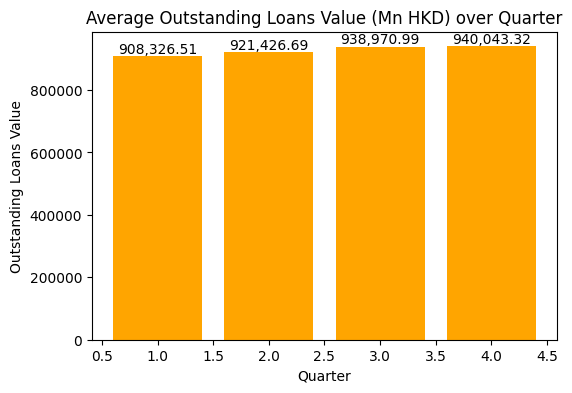

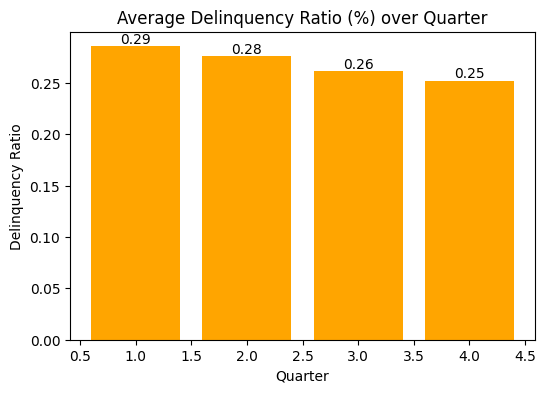

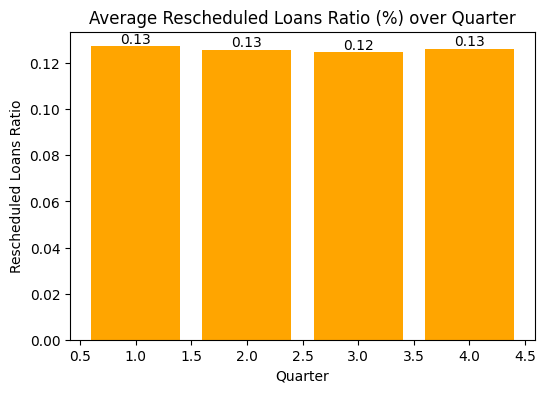

In [19]:
# Iterate over each column and plot the bar chart
for col in cols_outstanding:
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(mean_values_quarterly.index, mean_values_quarterly[col], color=color)
    ax.set_xlabel('Quarter')
    ax.set_ylabel(col)
    this_col = col + ' (Mn HKD)' if col == 'Outstanding Loans Value' else col + ' (%)'
    ax.set_title(f'Average {this_col} over Quarter')

    # Add number annotations to each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f"{height:,.2f}", ha='center', va='bottom')

    plt.show()

In [51]:
df_outstanding.loc[df_outstanding['Quarter']==4, 'Delinquency Ratio'].describe()

count    71.000000
mean      0.252254
std       0.420477
min       0.010000
25%       0.020000
50%       0.040000
75%       0.190000
max       1.320000
Name: Delinquency Ratio, dtype: float64

In [52]:
df_outstanding.loc[df_outstanding['Quarter']==1, 'Delinquency Ratio'].describe()

count    72.000000
mean      0.285556
std       0.449328
min       0.010000
25%       0.020000
50%       0.040000
75%       0.222500
max       1.420000
Name: Delinquency Ratio, dtype: float64

# 3, Correlation Analysis

## Data Preparation

Config & Reading

In [20]:
start_year_corr = 2000

dfs = {
  'hibor': pd.read_csv('Data (Clean)/CSV/IR HIBOR.csv').drop(columns='IDX'), 
  'deposits': pd.read_csv('Data (Clean)/CSV/Deposits (HKD&FC).csv').drop(columns='IDX'),
  'deposits_rate': pd.read_csv('Data (Clean)/CSV/IR HKD Deposit Rate.csv').drop(columns='IDX'),
  'unemployment': pd.read_csv('Data (Clean)/CSV/Labor Force.csv').drop(columns='IDX'),
  'neg': pd.read_csv('Data (Clean)/CSV/RML Negative Equity.csv')
}

this_df_neg = dfs['neg'].copy()
# Interpolating the value < 0.05 as 0.025
this_df_neg = this_df_neg.replace('*', 0.5/2)
# Change the correct datatype
this_df_neg[['Percentage of Total RML Number', 'Percentage of Total RML Value']] = this_df_neg[['Percentage of Total RML Number', 'Percentage of Total RML Value']].astype(float)
dfs['neg'] = this_df_neg


Filtering

In [21]:
# Filter rows for all except df_hibor
for name, df in dfs.items():
  
    if name != 'unemployment':
        this_df = df.loc[df['Year']>=start_year_corr].copy()
        this_df['year_quarter'] = this_df['Year'].astype(str) + '_Q' + this_df['Quarter'].astype(str)
        dfs[name] = this_df


    else:
        this_df = df.loc[df['year_start']>=start_year_corr].copy()
        this_df['year_quarter'] = this_df['year_start'].astype(str) + '_Q' + this_df['quarter'].astype(str)
        dfs[name] = this_df

In [22]:
df_outstanding['year_quarter'] = df_outstanding['Year'].astype(str) + '_Q' + df_outstanding['Quarter'].astype(str)

Grouping & Aggregation

In [23]:
dfs_grouped = {}
agg_method = 'mean'
groupby_key = 'year_quarter'
last_index = None

dfs_grouped['hibor'] = dfs['hibor'].groupby(groupby_key)['3-month'].agg(agg_method).iloc[:last_index].rename('HIBOR 3-month')
dfs_grouped['deposits'] = dfs['deposits'].groupby(groupby_key)['HKD'].agg(agg_method).iloc[:last_index].rename('HKD Deposits')
dfs_grouped['deposits_rate'] = dfs['deposits_rate'].groupby(groupby_key)['3-month'].agg(agg_method).iloc[:last_index].rename('Deposits Rate 3-month')
dfs_grouped['unemployment'] = dfs['unemployment'].groupby(groupby_key)['Unemployment Rate'].agg(agg_method)
dfs_grouped['neg'] = dfs['neg'].groupby(groupby_key)['Percentage of Total RML Number'].agg(agg_method).iloc[:last_index].rename('Negative Equity Percentage')

In [24]:
df_outstanding_grouped = df_outstanding.groupby(groupby_key)[cols_outstanding].agg(agg_method).iloc[:last_index]

Joining (monthly)

In [25]:
join_key = ['Year', 'Month']
merged_df = dfs['hibor'][join_key + ['1-month']].merge(dfs['deposits_rate'][join_key + ['1-month']], on=join_key, suffixes=(' HIBOR', ' Deposit Rate'))
merged_df = merged_df.merge(dfs['deposits'][join_key + ['HKD']], on=join_key)
merged_df = merged_df.merge(df_outstanding[join_key + cols_outstanding], on=join_key)

merged_df['Date'] = pd.to_datetime(merged_df['Year'].astype(str) + '-' + merged_df['Month'].astype(str)) + pd.offsets.MonthEnd(1)
merged_df = merged_df.set_index('Date')
merged_df = merged_df.drop(['Year', 'Month'], axis=1)

df_grouped_monthly = merged_df
df_grouped_monthly.tail()

1-month HIBOR  1-month Deposit Rate          HKD  \
Date                                                           
2023-07-31       5.071708              0.500339  7576273.454   
2023-08-31       4.617262              0.531227  7608824.855   
2023-09-30       4.887005              0.553750  7585827.887   
2023-10-31       4.943492              0.568750  7558553.840   
2023-11-30       5.134105              0.568750  7597402.186   

            Outstanding Loans Value  Delinquency Ratio  \
Date                                                     
2023-07-31                  1851500               0.07   
2023-08-31                  1854441               0.07   
2023-09-30                  1856750               0.07   
2023-10-31                  1858174               0.07   
2023-11-30                  1857469               0.08   

            Rescheduled Loans Ratio  
Date                                 
2023-07-31                      0.0  
2023-08-31                      0.0  
2023-09-30                      0.0  
2023-10-31                      0.0  
2023-11-30                      0.0

Joining (quarterly)

In [26]:
df_grouped_quarterly = pd.concat([ds for ds in dfs_grouped.values()], axis=1)
df_grouped_quarterly = pd.concat([df_grouped_quarterly, df_outstanding_grouped], axis=1)
df_grouped_quarterly.tail()

HIBOR 3-month  HKD Deposits  Deposits Rate 3-month  \
year_quarter                                                       
2022_Q4            4.751082  7.373154e+06               0.160000   
2023_Q1            3.821965  7.626217e+06               0.391125   
2023_Q2            4.282646  7.599599e+06               0.491875   
2023_Q3            5.027493  7.590309e+06               0.535209   
2023_Q4            5.343026  7.577978e+06               0.578125   

              Unemployment Rate  Negative Equity Percentage  \
year_quarter                                                  
2022_Q4                     3.3                        2.10   
2023_Q1                     3.1                        1.10   
2023_Q2                     3.0                        0.57   
2023_Q3                     3.0                        1.90   
2023_Q4                     NaN                         NaN   

              Outstanding Loans Value  Delinquency Ratio  \
year_quarter                                               
2022_Q4                  1.804057e+06           0.050000   
2023_Q1                  1.817194e+06           0.060000   
2023_Q2                  1.831001e+06           0.066667   
2023_Q3                  1.854230e+06           0.070000   
2023_Q4                  1.857822e+06           0.075000   

              Rescheduled Loans Ratio  
year_quarter                           
2022_Q4                           0.0  
2023_Q1                           0.0  
2023_Q2                           0.0  
2023_Q3                           0.0  
2023_Q4                           0.0

## Correlation Heatmap

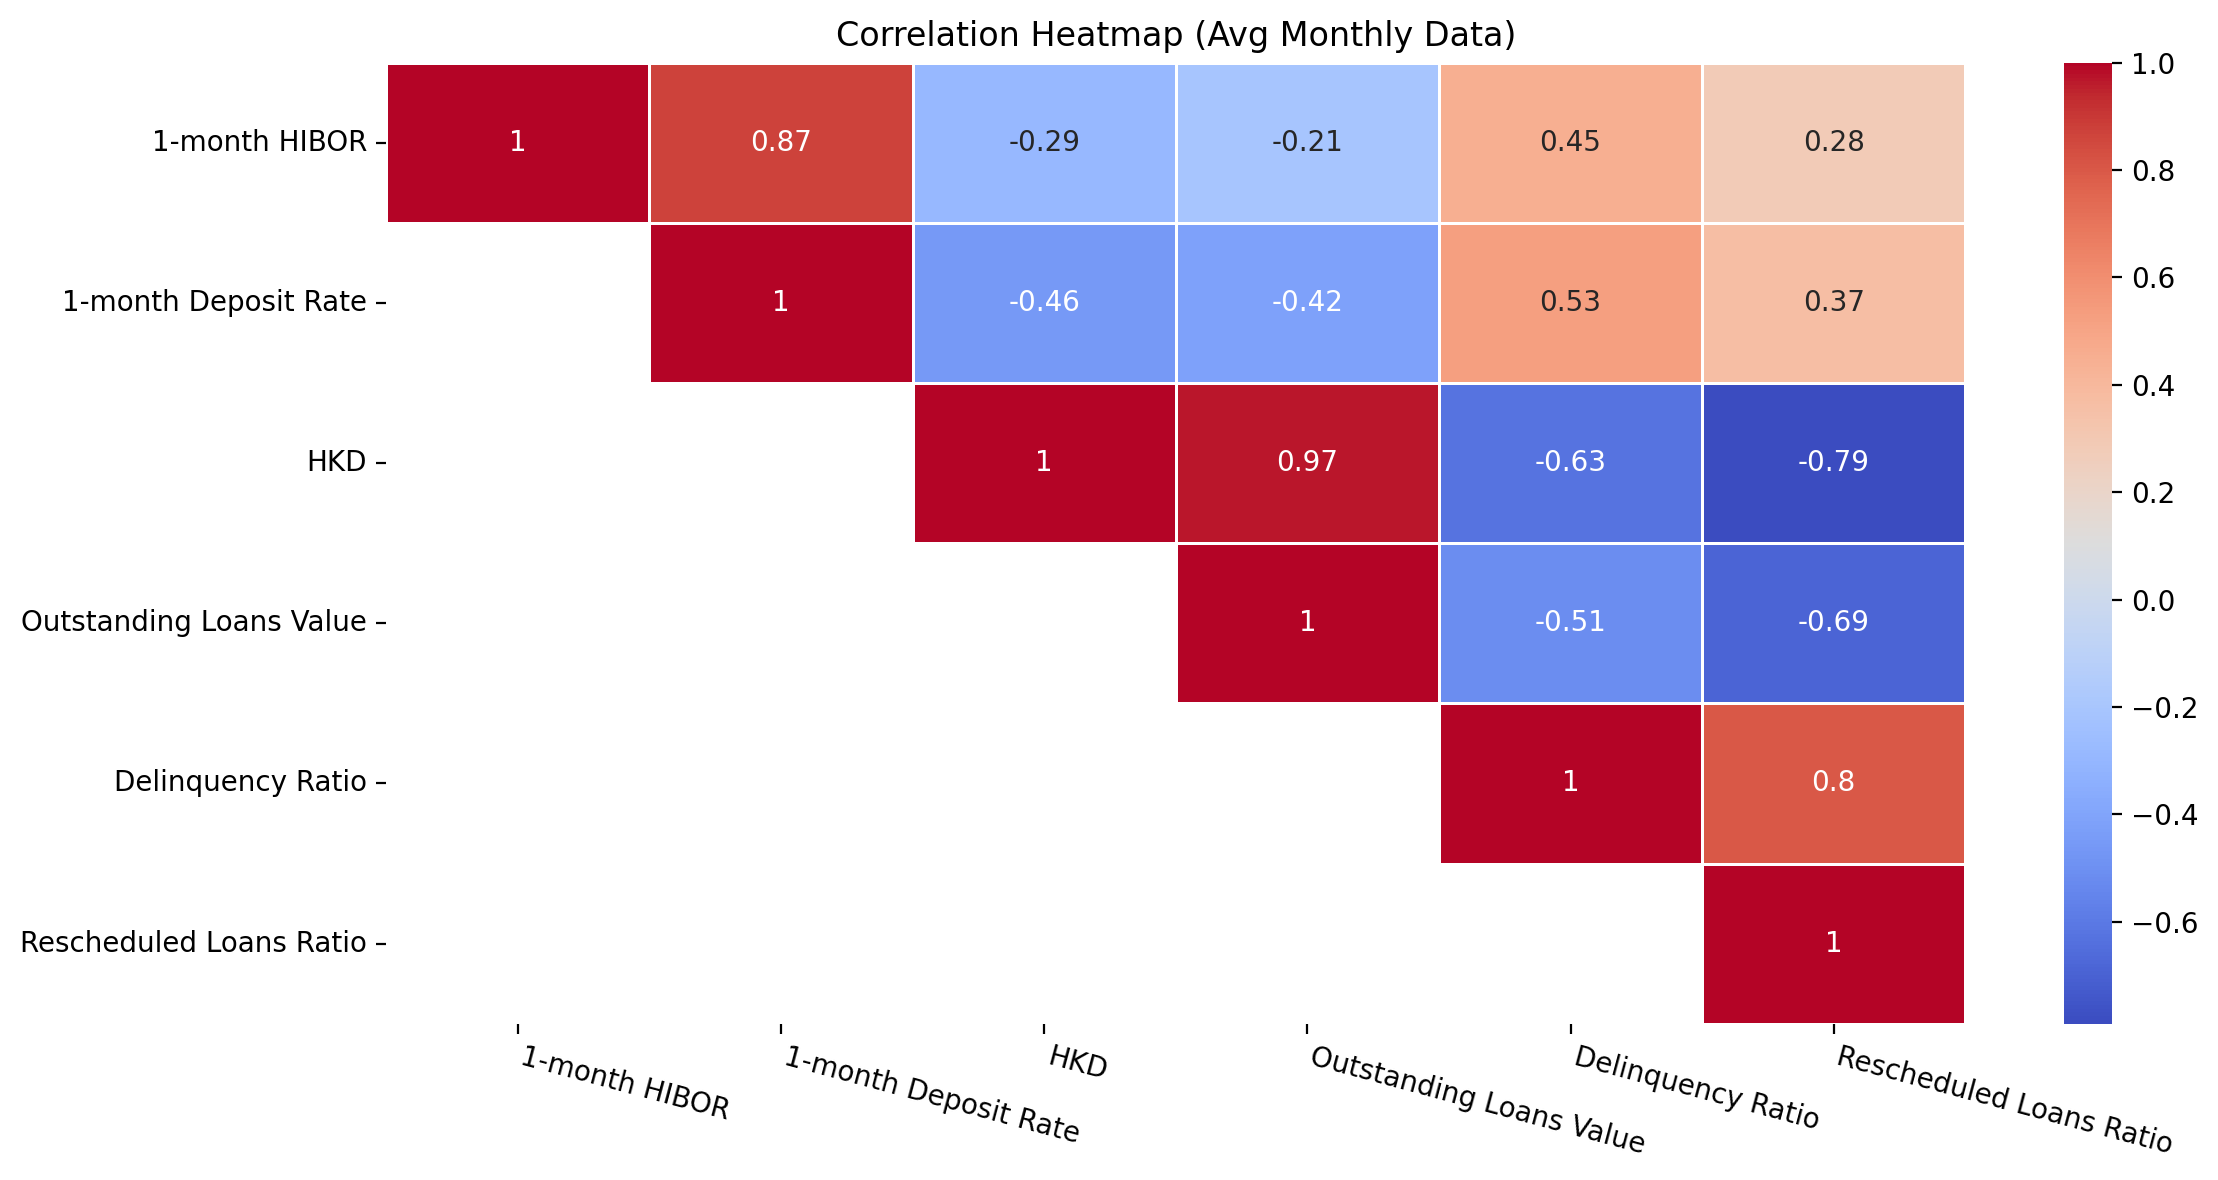

In [27]:
corr_method = 'pearson'
correlation_matrix = ((df_grouped_monthly - df_grouped_monthly.mean()) / df_grouped_monthly.std()).corr(method=corr_method)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=~mask)
plt.title('Correlation Heatmap (Avg Monthly Data)')
plt.xticks(rotation=-15, ha='left')
plt.tight_layout()
plt.show()

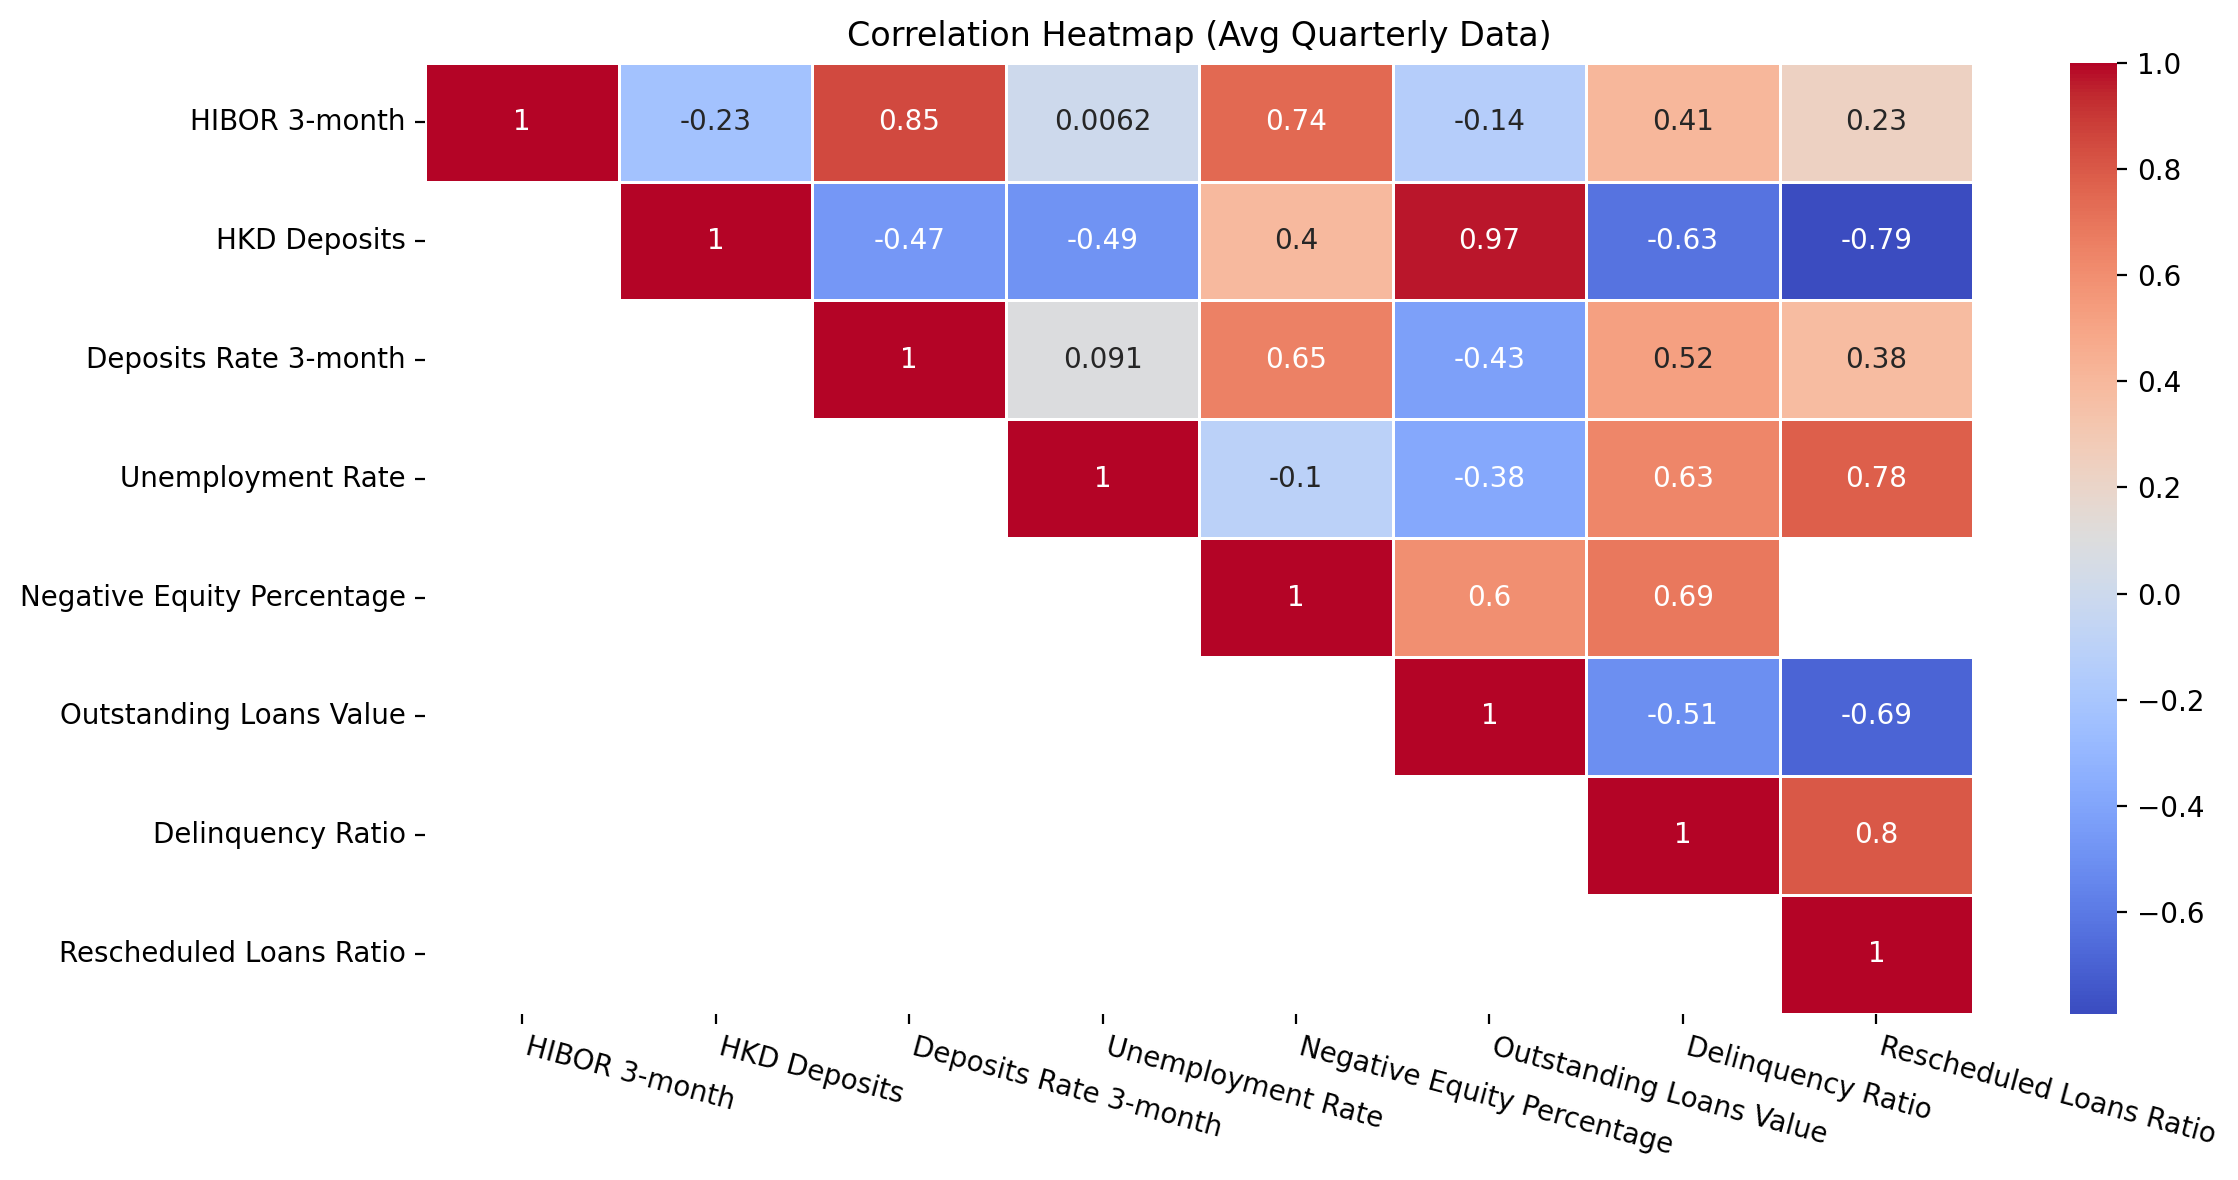

In [28]:
corr_method = 'pearson'
correlation_matrix = ((df_grouped_quarterly - df_grouped_quarterly.mean()) / df_grouped_quarterly.std()).corr(method=corr_method)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=~mask)
plt.title('Correlation Heatmap (Avg Quarterly Data)')
plt.xticks(rotation=-15, ha='left')
plt.tight_layout()
plt.show()

In [29]:
'''
HIBOR / Deposits Rate
    - positive correlated with negative equity
    - positive correlated with delinquency ratio
Unemployment Rate 
    - positive correlated with delinquency ratio & rescheduled loans ratio
    - but not correlated with HIBOR
HKD Deposits
    - negative correlated with delinquency ratio & rescheduled loans ratio

- Delinquency is highly trigger rescheduled loans
''';

## Regression Plot

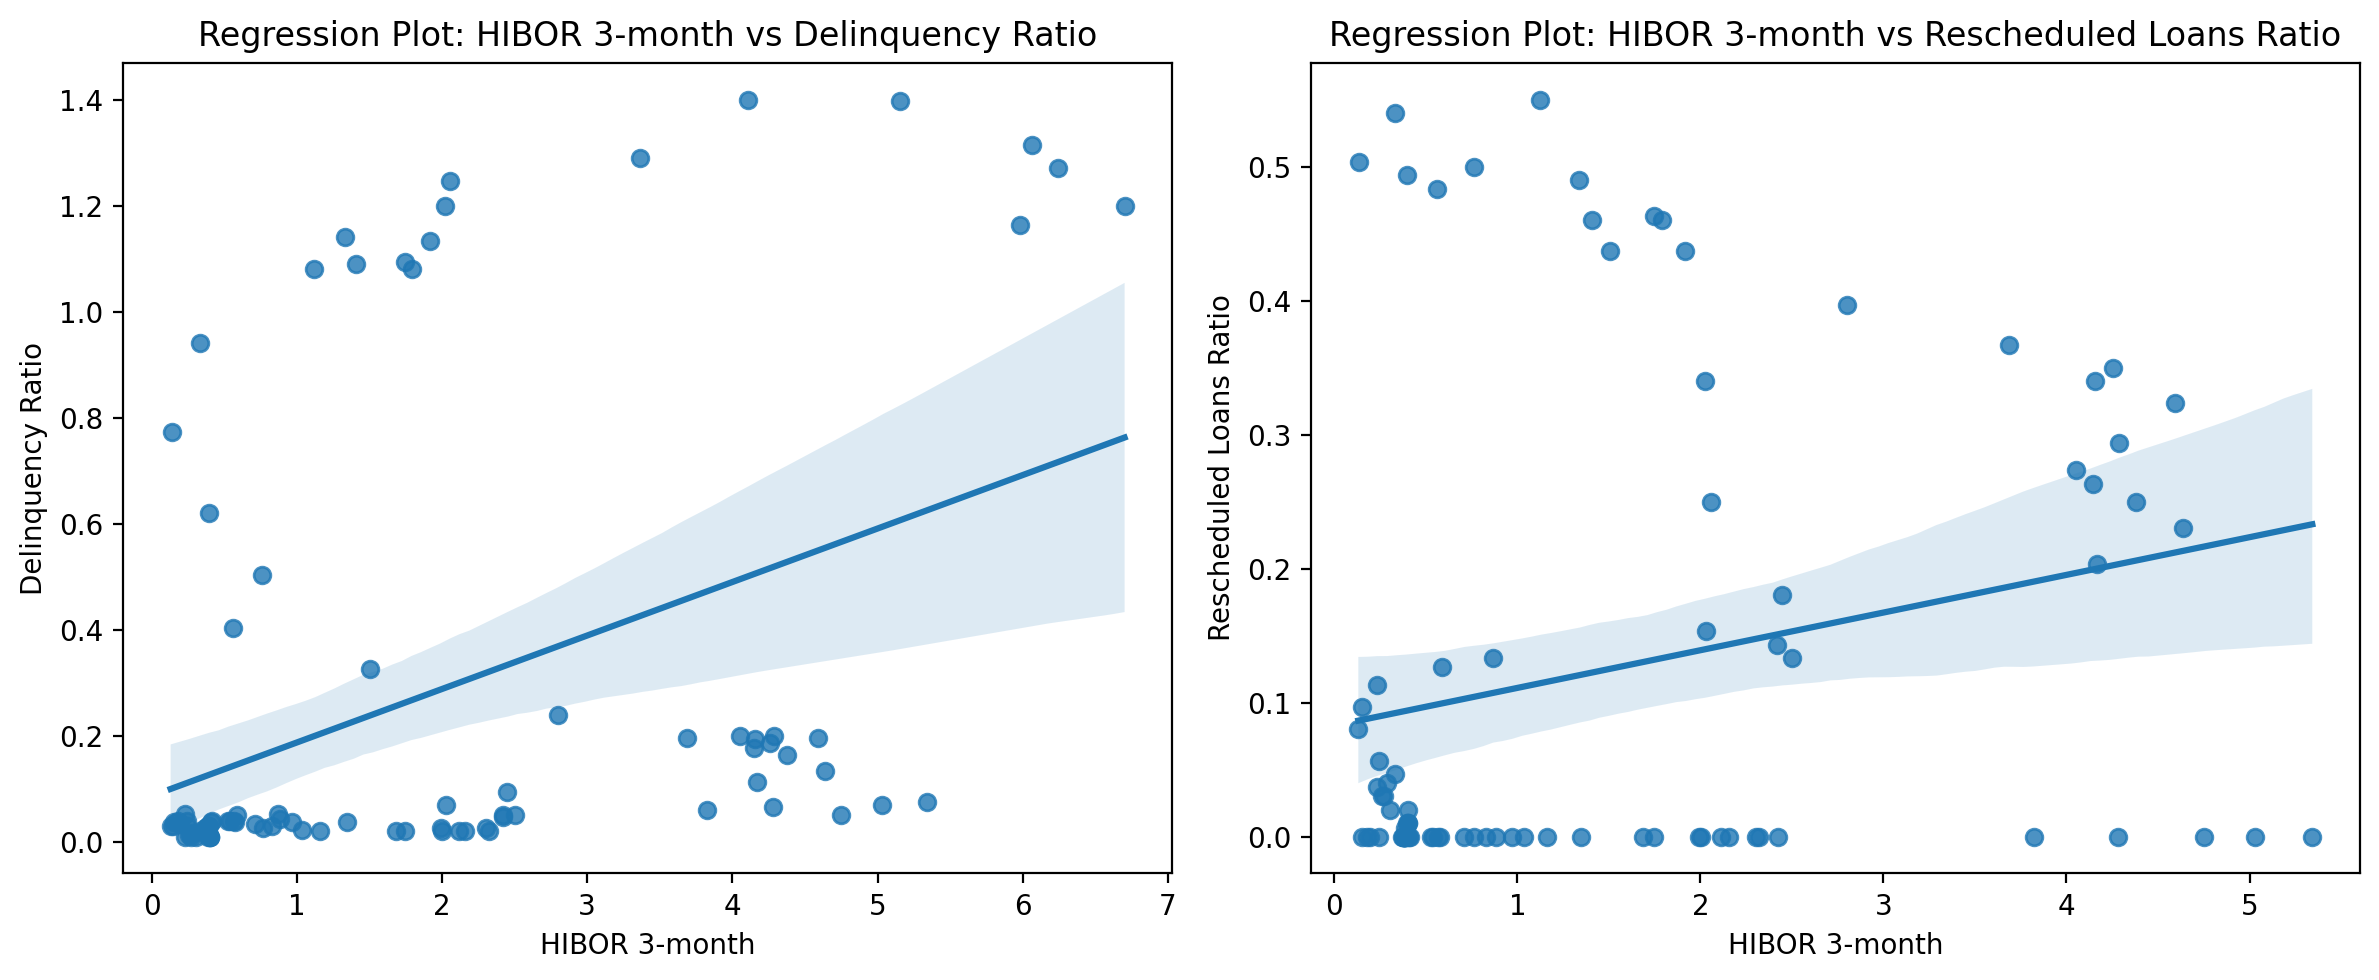

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=200)
y_values = ['Delinquency Ratio', 'Rescheduled Loans Ratio']
x = 'HIBOR 3-month'

for i, ax in enumerate(axs):
    y = y_values[i]
    ax.set_title(f'Regression Plot: {x} vs {y}')
    sns.regplot(data=df_grouped_quarterly, x=x, y=y, ax=ax)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()

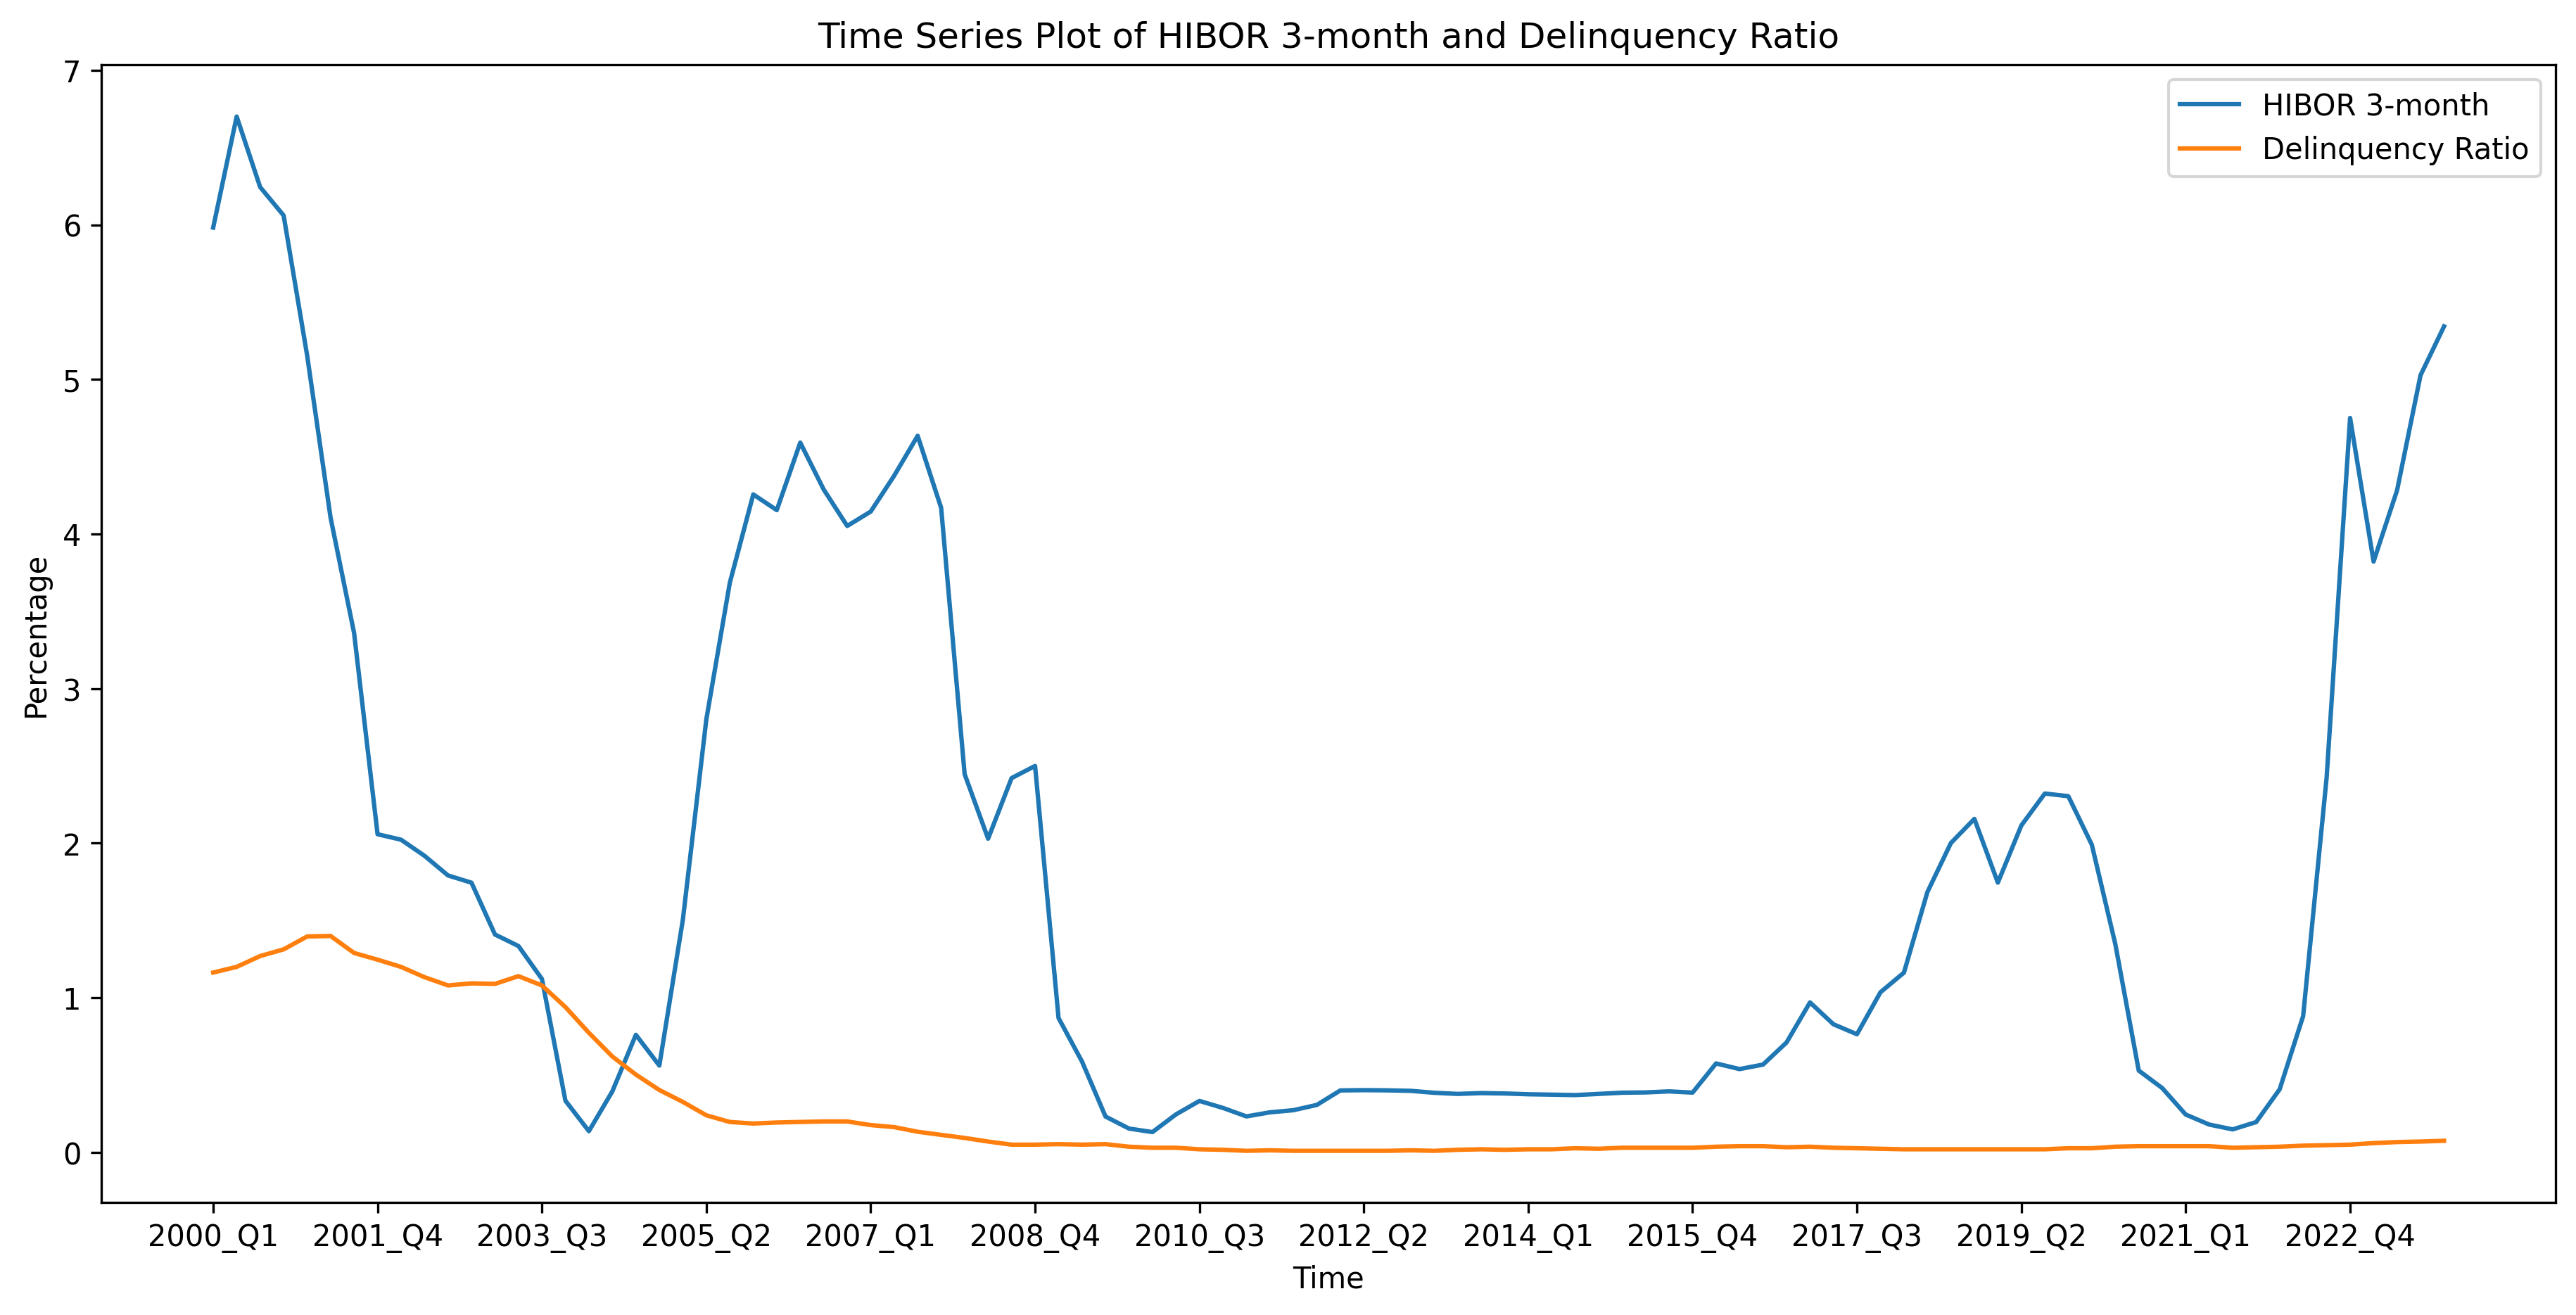

In [31]:
a = 'HIBOR 3-month'
b = 'Delinquency Ratio'

fig = plt.figure(figsize=(15, 7), dpi=300)
plt.plot(df_grouped_quarterly[a], label=a)
plt.plot(df_grouped_quarterly[b], label=b)
plt.xlabel('Time')
plt.xticks(range(0, len(df_grouped_quarterly.index), 7))
plt.ylabel('Percentage')
plt.title(f'Time Series Plot of {a} and {b}')
plt.legend()
plt.show()

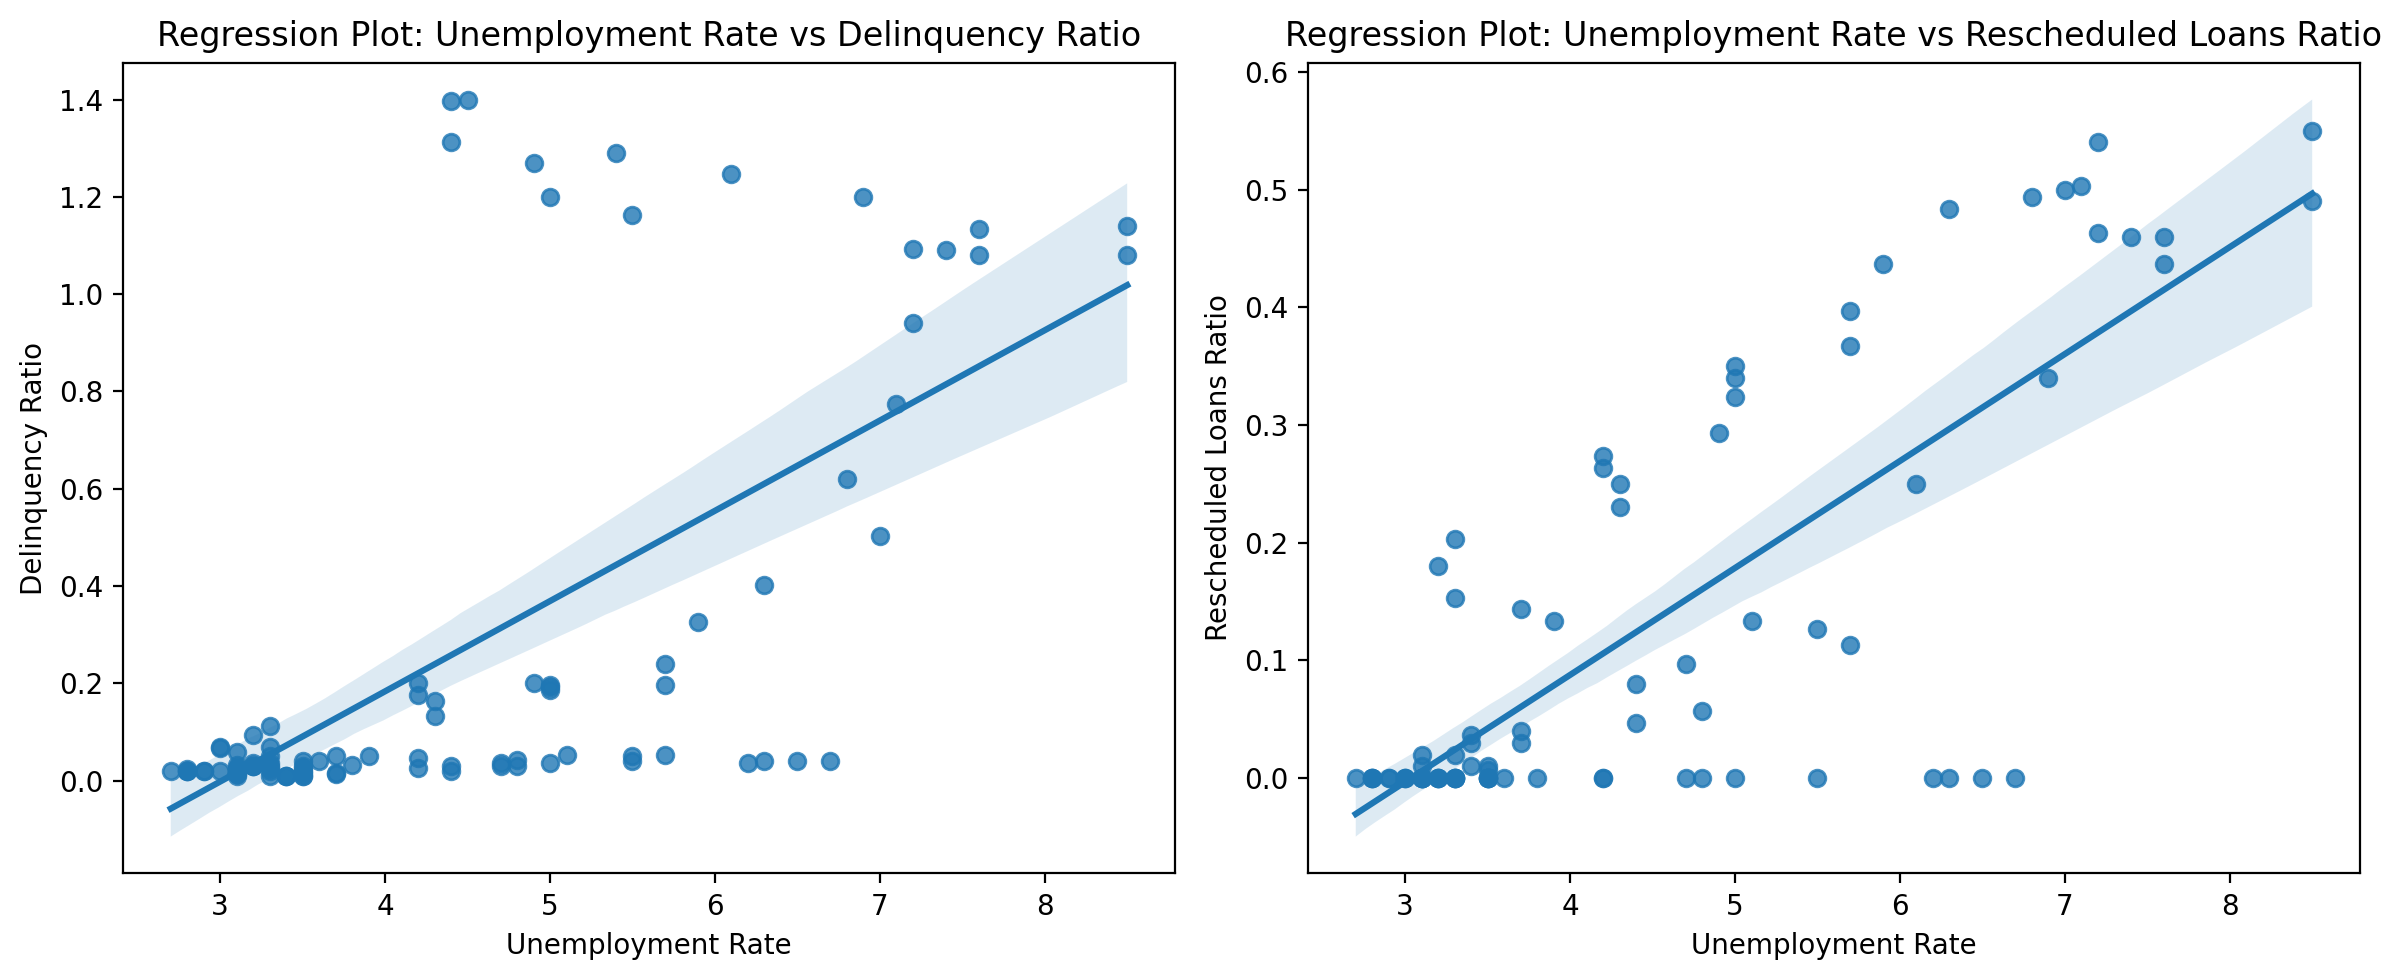

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=200)
y_values = ['Delinquency Ratio', 'Rescheduled Loans Ratio']
x = 'Unemployment Rate'

for i, ax in enumerate(axs):
    y = y_values[i]
    ax.set_title(f'Regression Plot: {x} vs {y}')
    sns.regplot(data=df_grouped_quarterly, x=x, y=y, ax=ax)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()

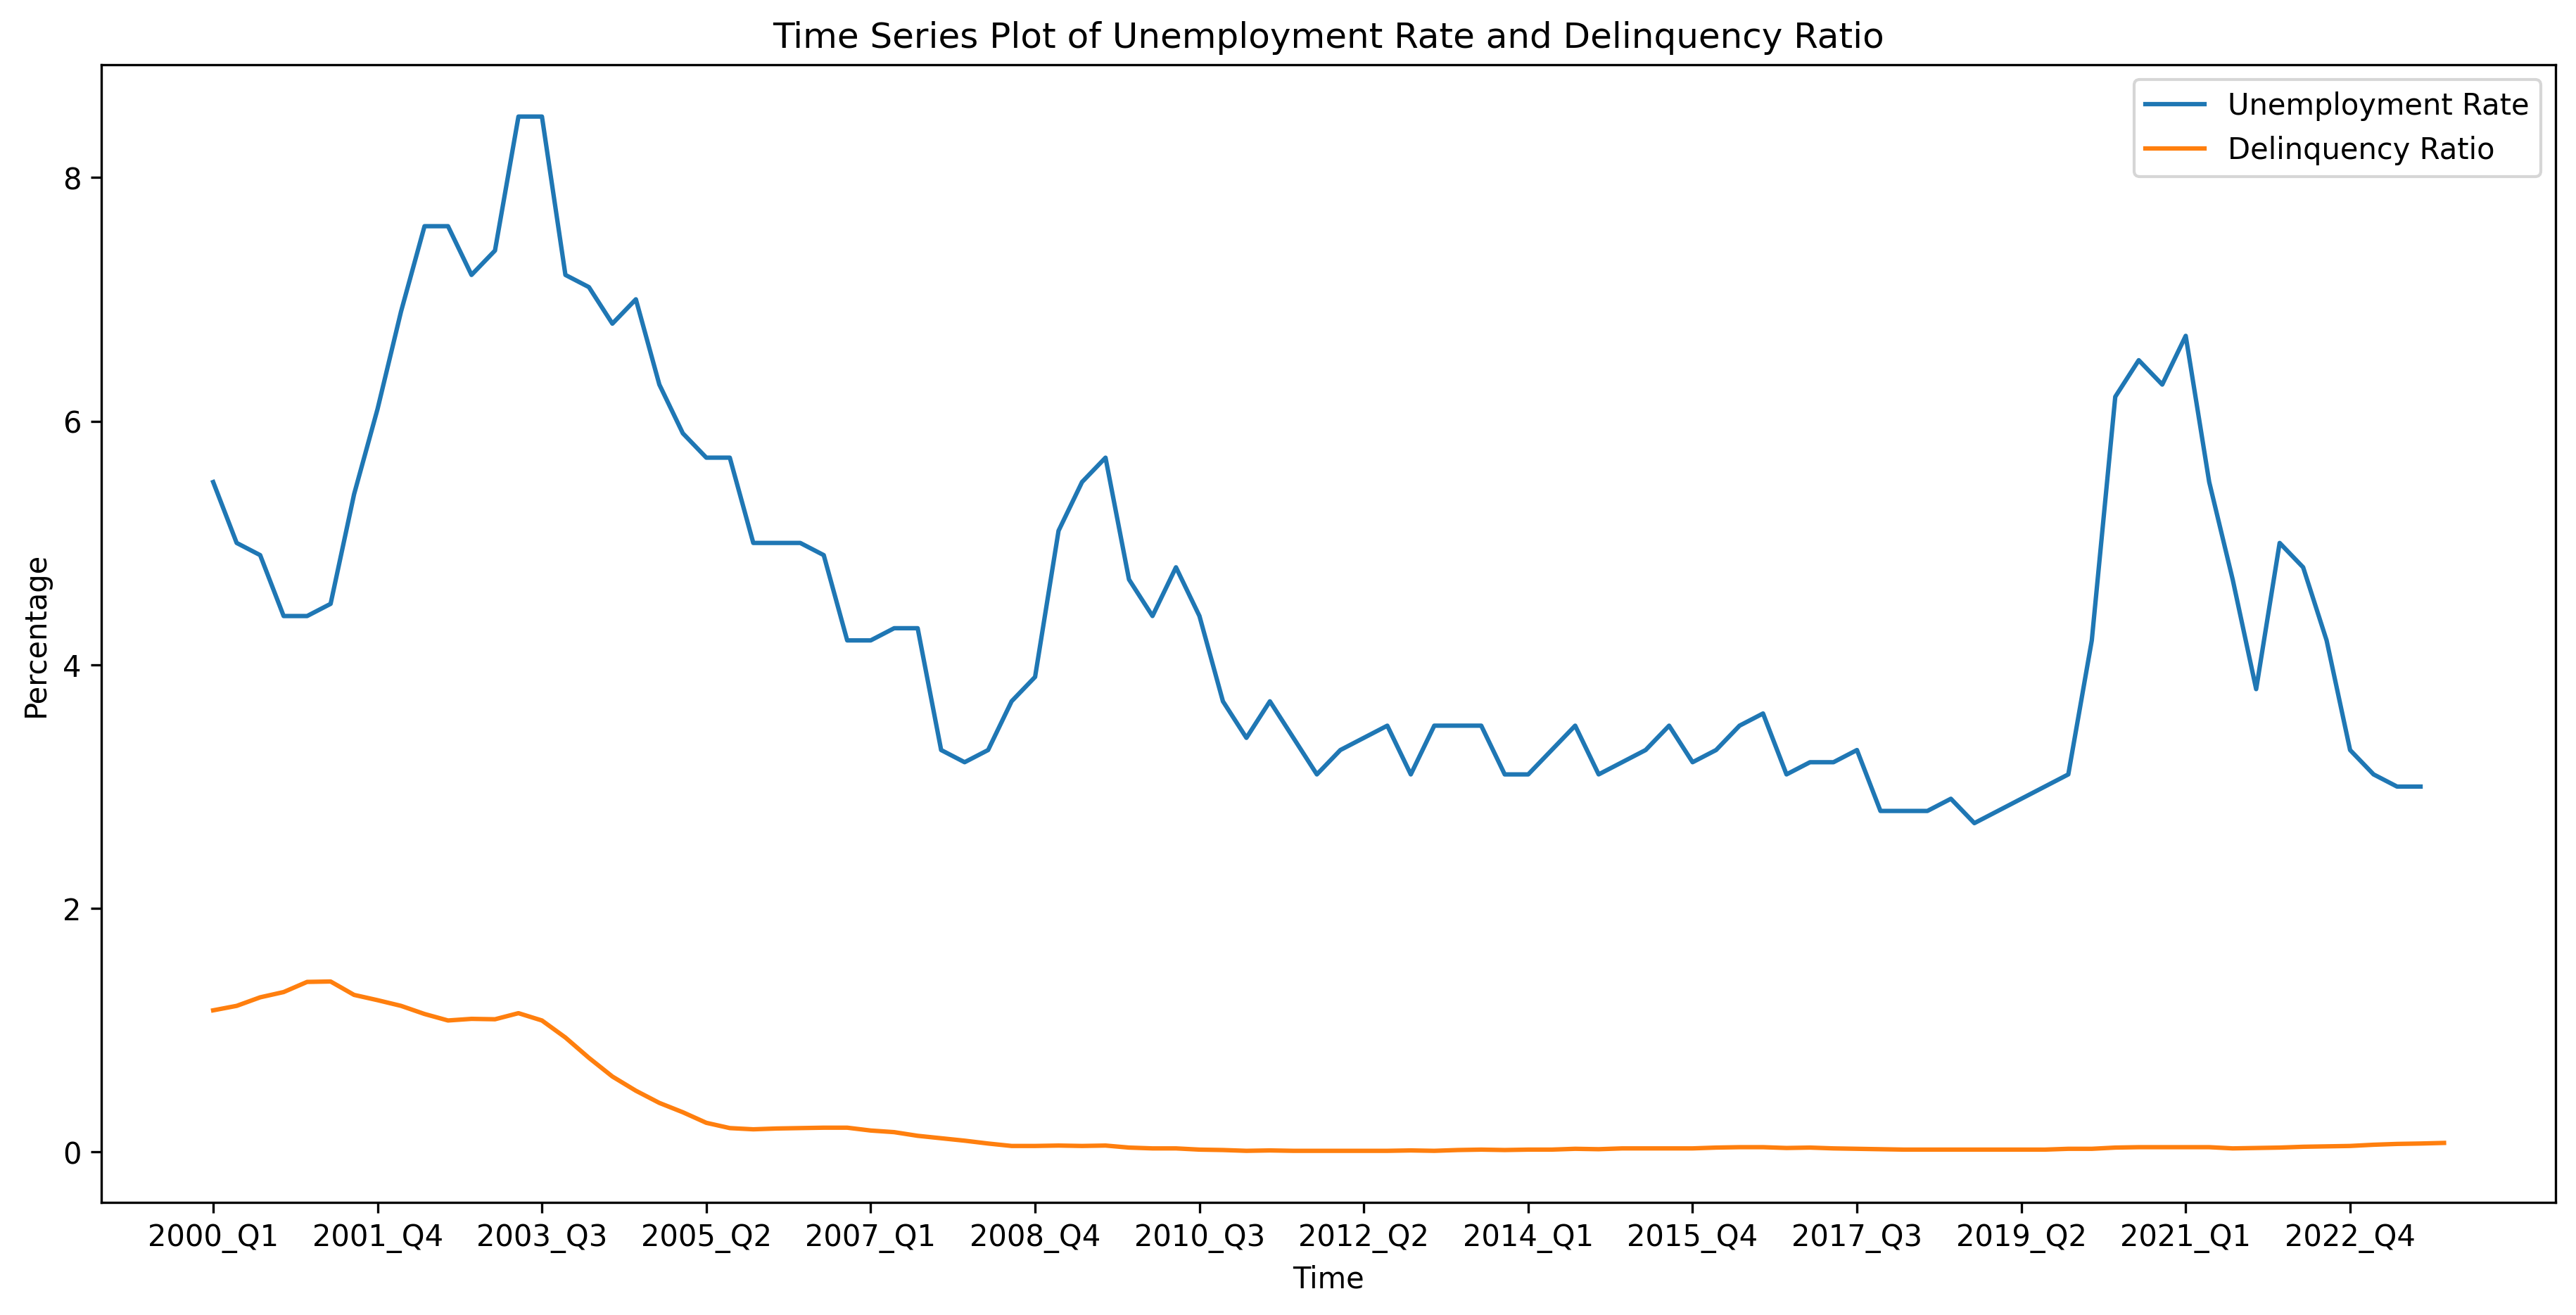

In [33]:
a = 'Unemployment Rate'
b = 'Delinquency Ratio'

fig = plt.figure(figsize=(15, 7), dpi=300)
plt.plot(df_grouped_quarterly['Unemployment Rate'], label='Unemployment Rate')
plt.plot(df_grouped_quarterly[b], label=b)
plt.xlabel('Time')
plt.xticks(range(0, len(df_grouped_quarterly.index), 7))
plt.ylabel('Percentage')
plt.title(f'Time Series Plot of {a} and {b}')
plt.legend()
plt.show()

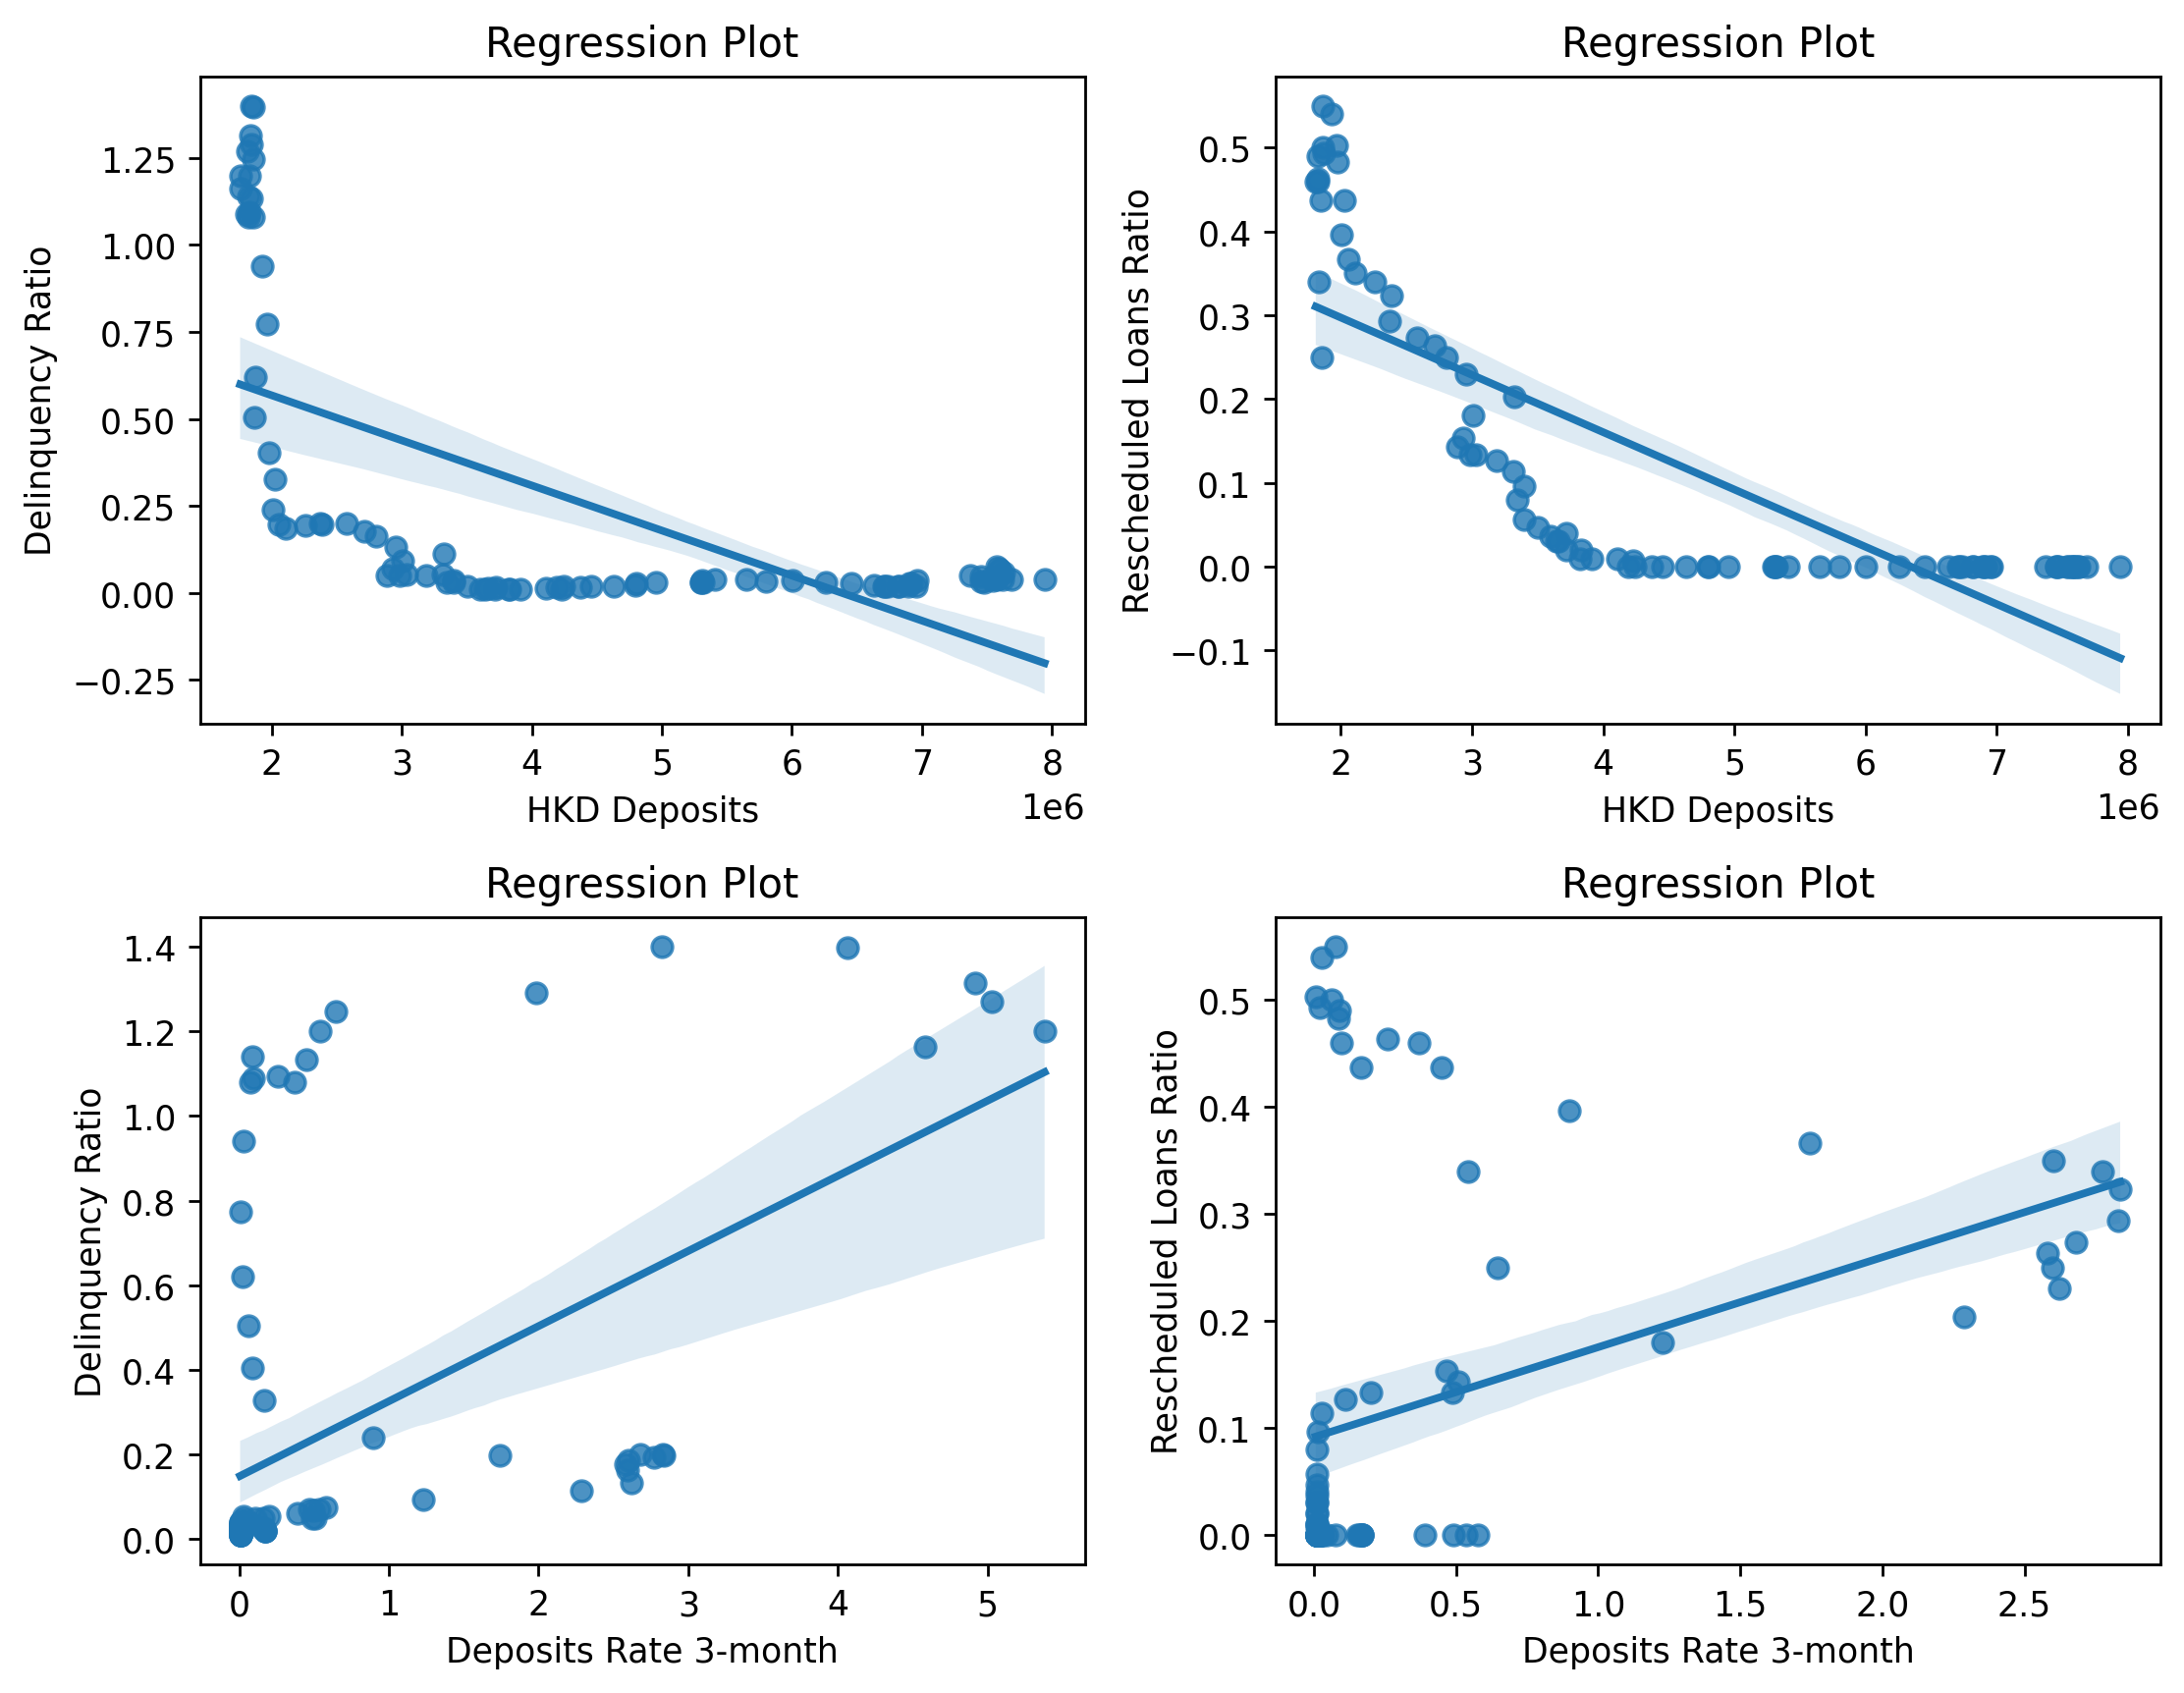

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7), dpi=250) 

x_values = ['HKD Deposits', 'Deposits Rate 3-month']
y_values = ['Delinquency Ratio', 'Rescheduled Loans Ratio',]

for i in range(2):
  for j in range(2):
    
    ax = axs[i,j]
    
    x = x_values[i]
    y = y_values[j]
        
    ax.set_title(f'Regression Plot')
    sns.regplot(data=df_grouped_quarterly, x=x, y=y, ax=ax)
    ax.set_xlabel(x)
    ax.set_ylabel(y)

plt.tight_layout()
plt.show()

/var/folders/fw/sg8mlr4104x3nj53xmbsp7w40000gn/T/ipykernel_2150/2176570846.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sns.regplot(data=df_grouped_quarterly.pct_change(), x=x, y=y, ax=ax)


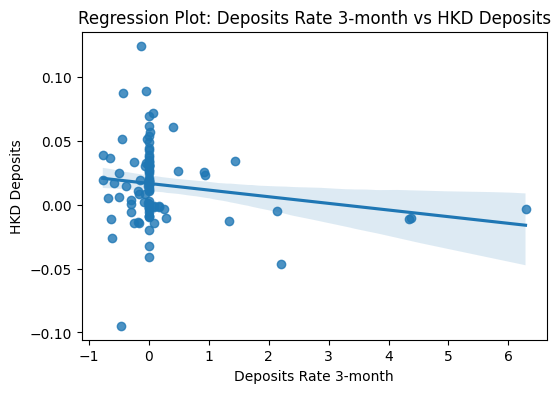

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))

x = 'Deposits Rate 3-month'
y = 'HKD Deposits'

ax.set_title(f'Regression Plot: {x} vs {y}')
sns.regplot(data=df_grouped_quarterly.pct_change(), x=x, y=y, ax=ax)
ax.set_xlabel(x)  
ax.set_ylabel(y)

plt.show()

In [36]:
df_grouped_quarterly.columns

Index(['HIBOR 3-month', 'HKD Deposits', 'Deposits Rate 3-month',
       'Unemployment Rate', 'Negative Equity Percentage',
       'Outstanding Loans Value', 'Delinquency Ratio',
       'Rescheduled Loans Ratio'],
      dtype='object')

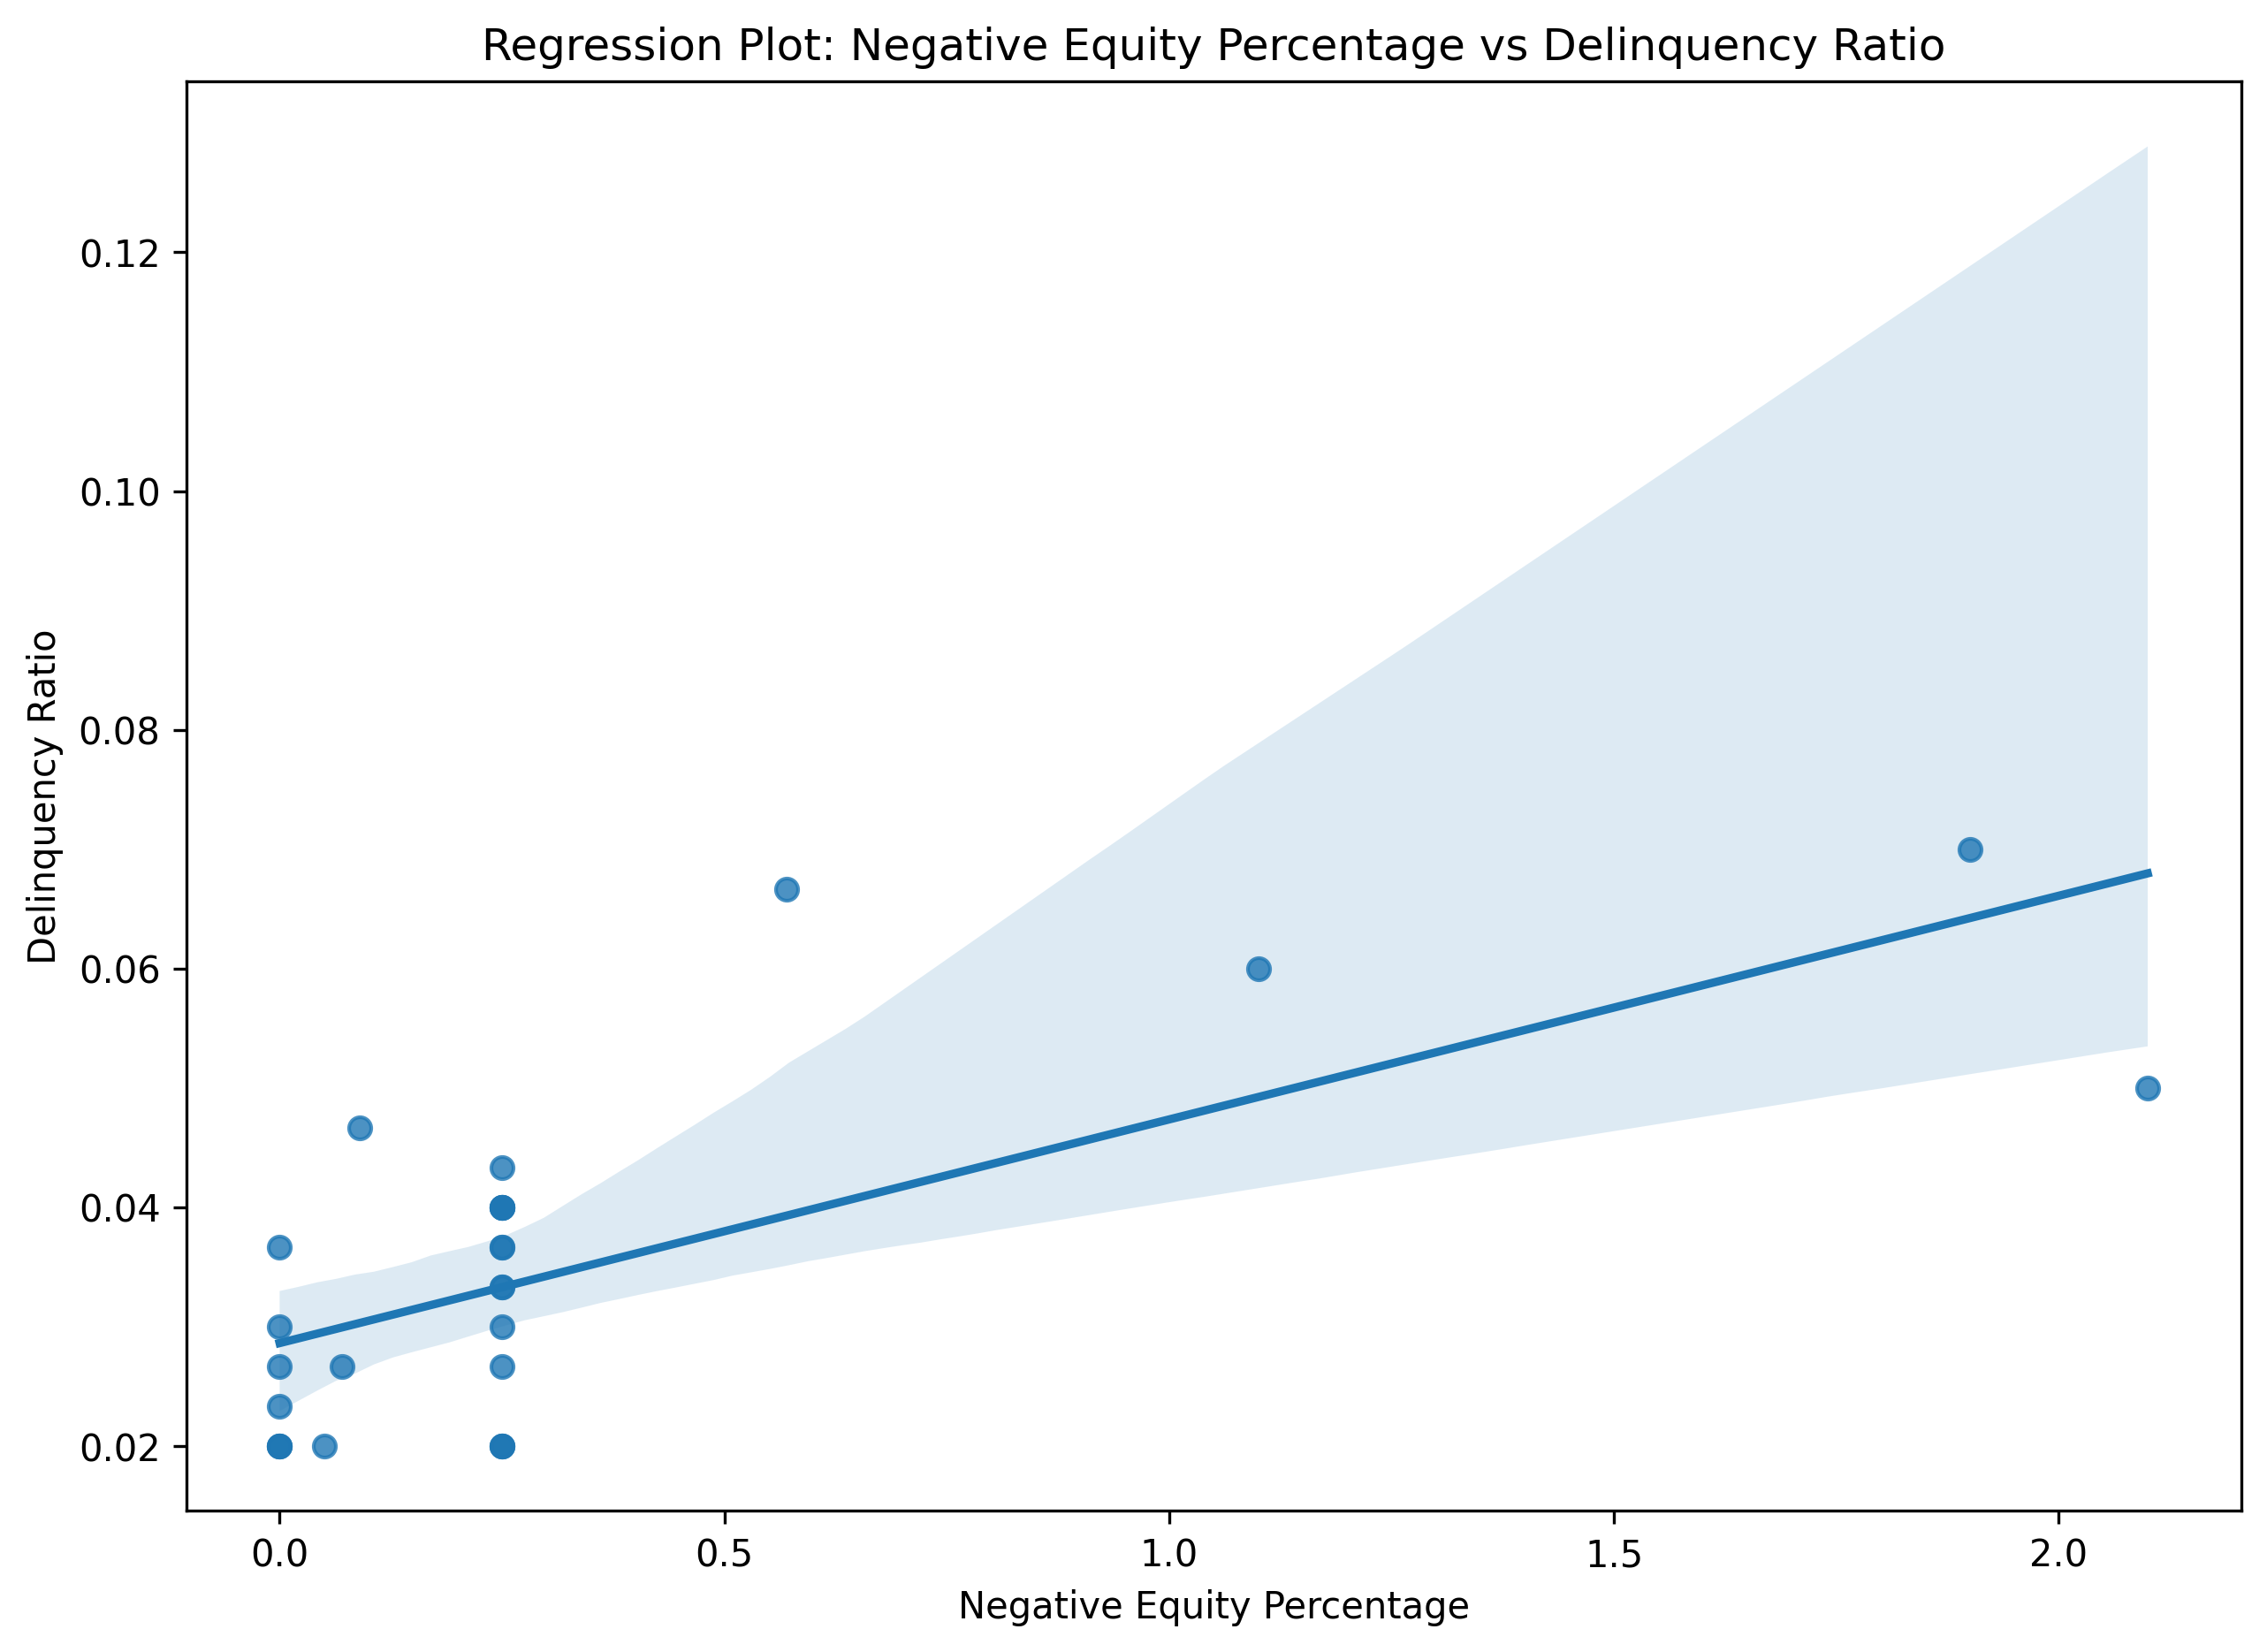

In [56]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)

x = 'Negative Equity Percentage'
y = 'Delinquency Ratio'

ax.set_title(f'Regression Plot: {x} vs {y}')
sns.regplot(data=df_grouped_quarterly, x=x, y=y, ax=ax)
ax.set_xlabel(x)  
ax.set_ylabel(y)

plt.show()

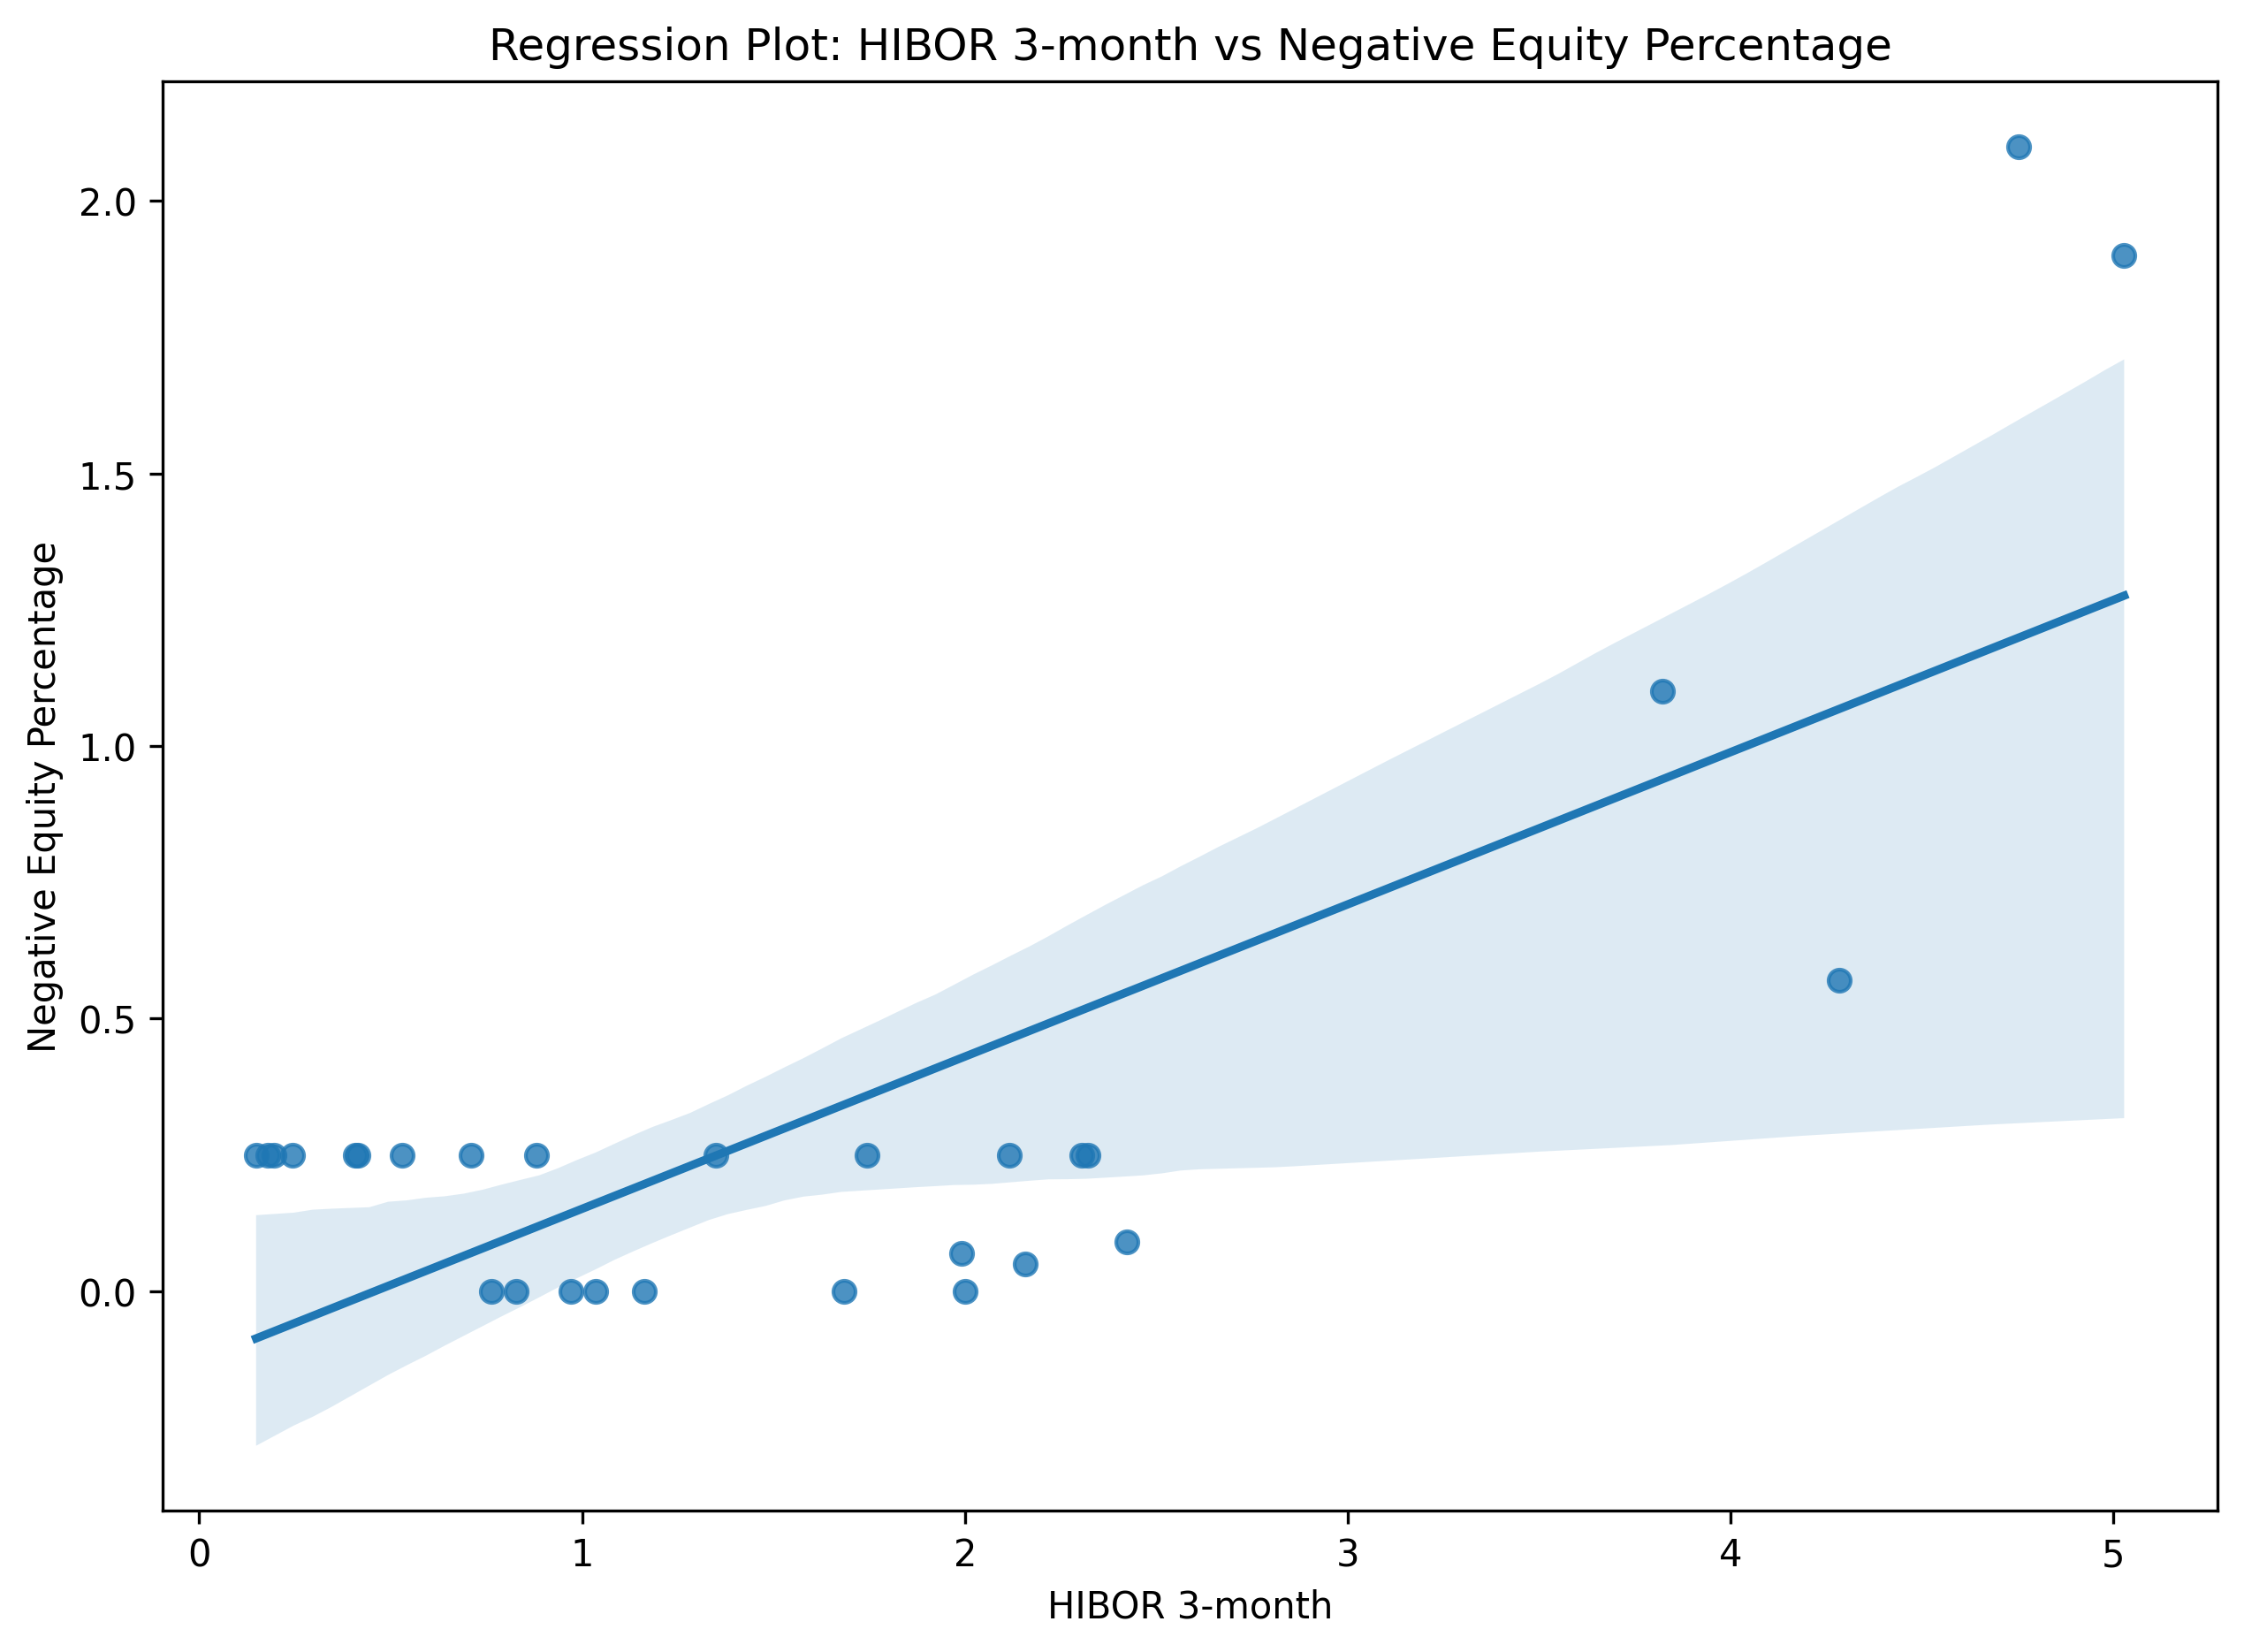

In [55]:
fig, ax = plt.subplots(figsize=(10, 7), dpi=300)

x = 'HIBOR 3-month'
y = 'Negative Equity Percentage'

ax.set_title(f'Regression Plot: {x} vs {y}')
sns.regplot(data=df_grouped_quarterly, x=x, y=y, ax=ax)
ax.set_xlabel(x)  
ax.set_ylabel(y)

plt.show()

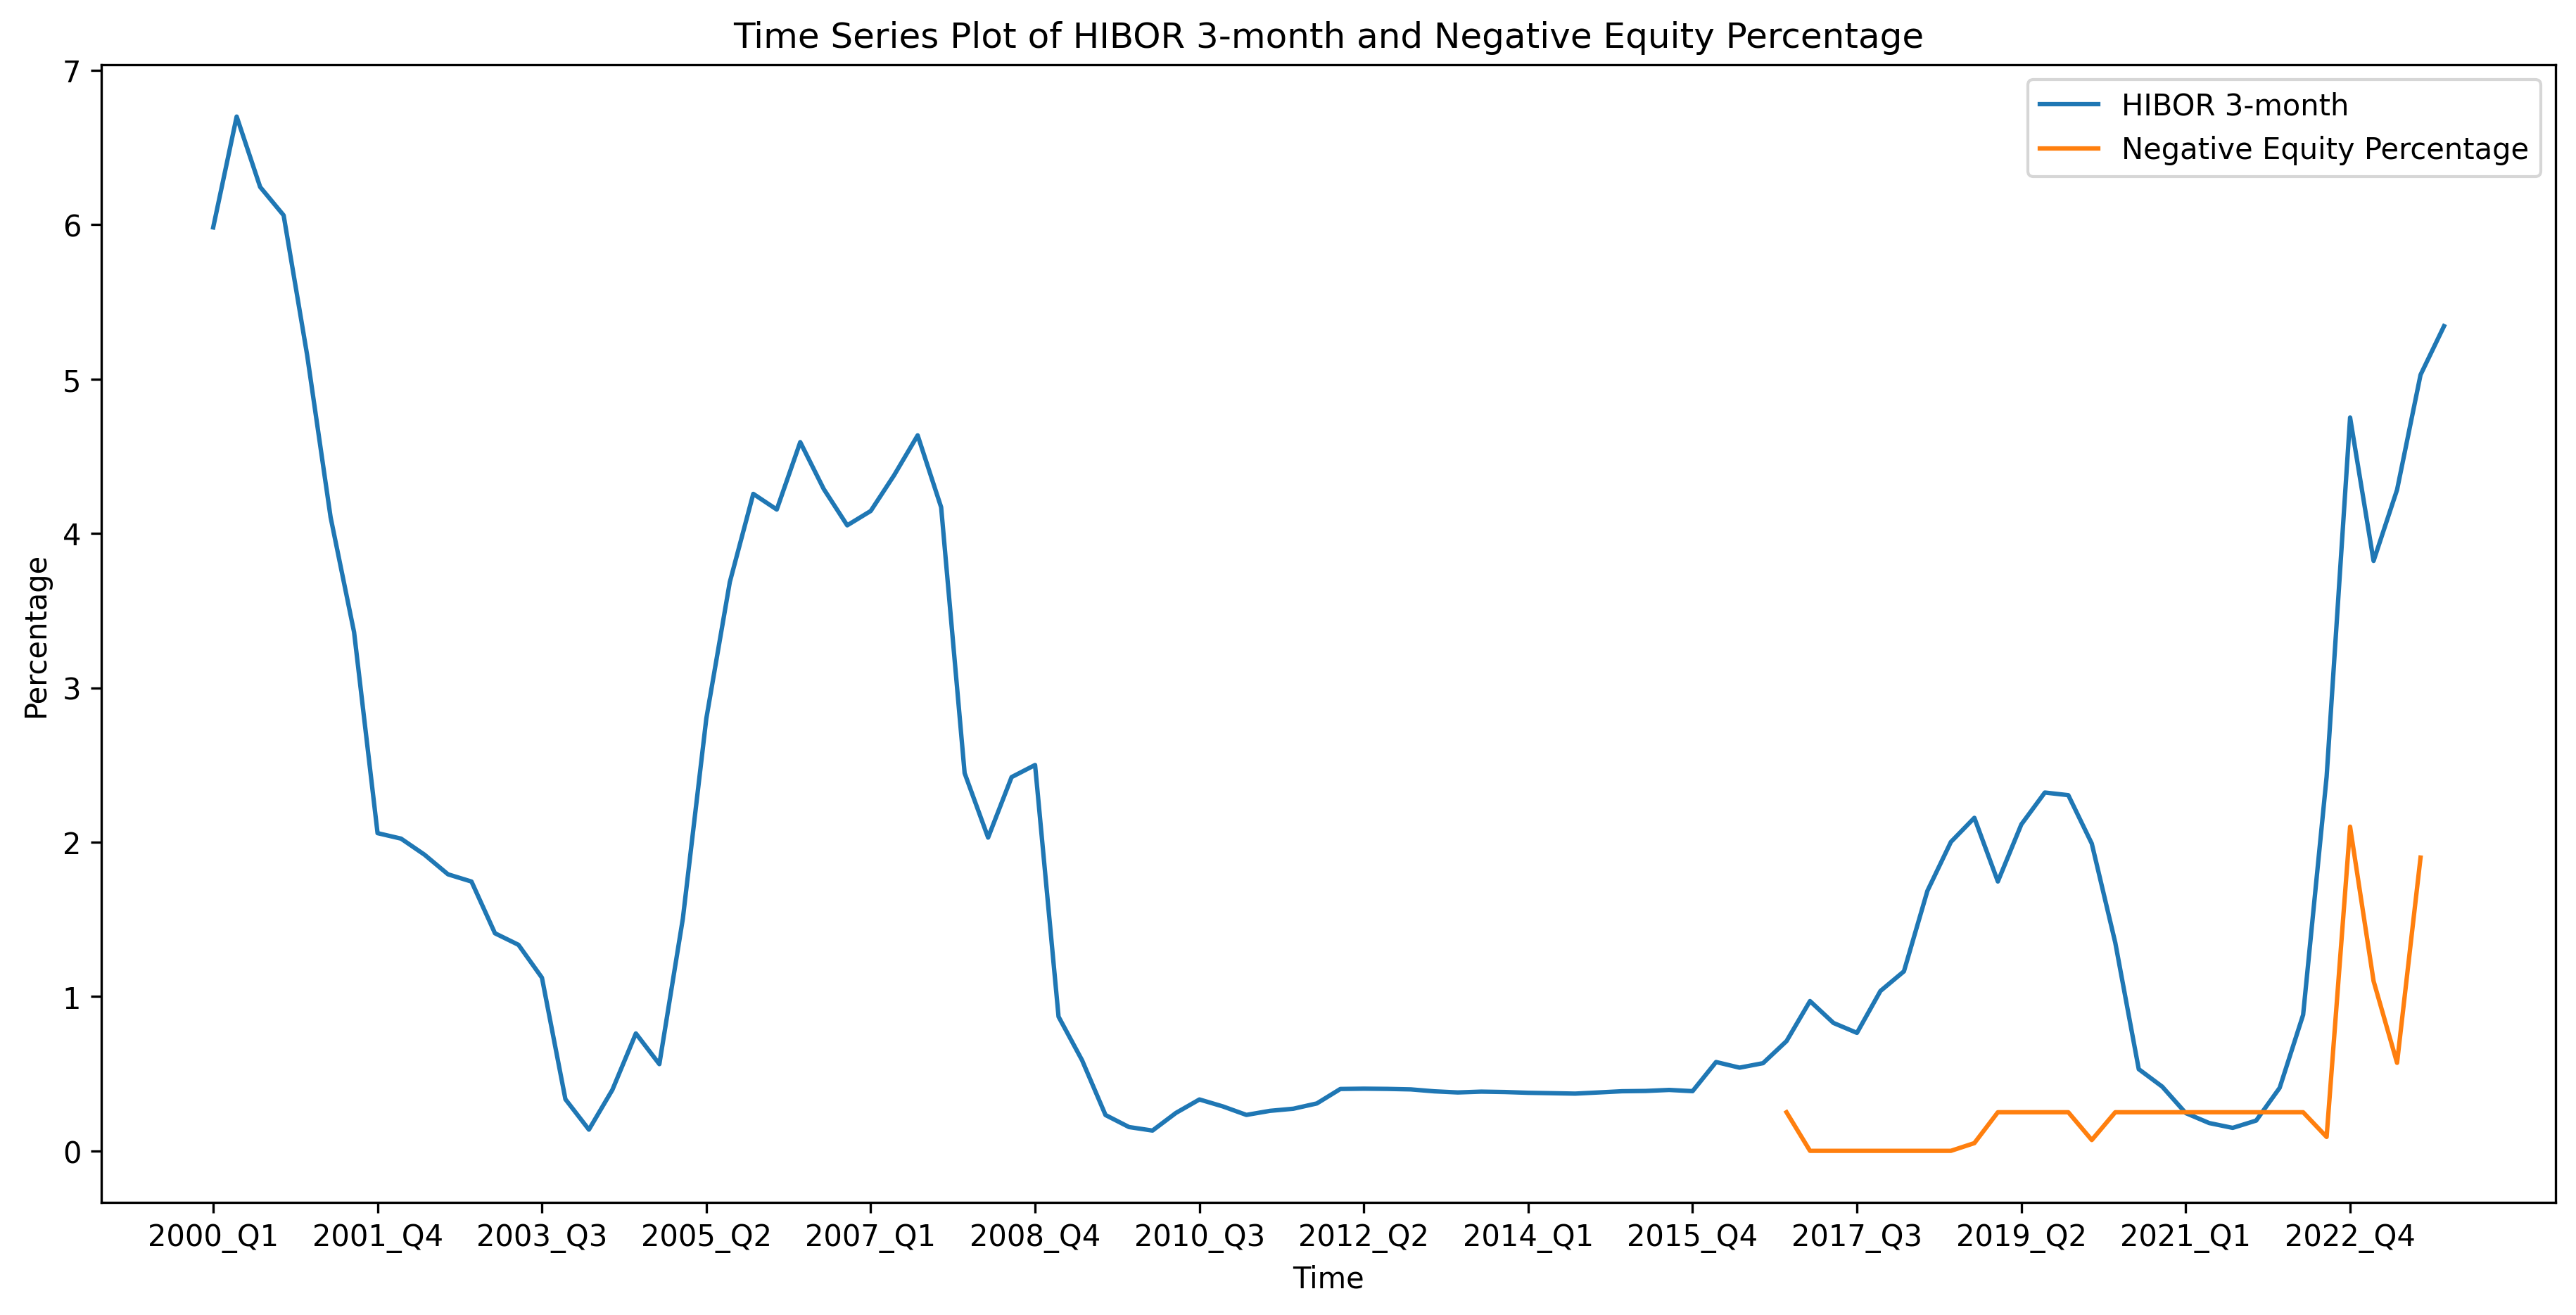

In [38]:
a = 'HIBOR 3-month'
b = 'Negative Equity Percentage'

fig = plt.figure(figsize=(15, 7), dpi=300)
plt.plot(df_grouped_quarterly[a], label=a)
plt.plot(df_grouped_quarterly[b], label=b)
plt.xlabel('Time')
plt.xticks(range(0, len(df_grouped_quarterly.index), 7))
plt.ylabel('Percentage')
plt.title(f'Time Series Plot of {a} and {b}')
plt.legend()
plt.show()